<div class="alert alert-block alert-info">
<center> <h1> BUSINESS CASES FOR DATA SCIENCE 2022/2023</h1> </center> <br>
<center> <h2> Case study 4 - Predict Hotel Booking Cancelations </h2> </center> <br>

</div>

<center> <b>Group C</b>
    
***


|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
| 1    |     Carolina Costa   |       20220715         | 
| 2    |     Martim Santos    |       20220540         |
| 3    |     Pedro Pereira    |       20220684         | 
| 4    |     Rodrigo Silva    |       20221360         | 
| 5    |     Rúben Serpa      |       20221284         |

### Table of Contents
* [1. Libraries, Functions,and Colors](#title1)
* [2. Data Importing](#title2)
* [3. Transform External Data ](#title3)
* [4. Data Understanding](#title4)
* [5. Data Preprocessing](#title5)
    * [5.1. Missing Values Treatment](#subtitle5.1)
    * [5.2. Duplicates Treatment](#subtitle5.2)
    * [5.3. Data Formating](#subtitle5.3)
    * [5.4. Inconsistencies ](#subtitle5.4)
    * [5.5. Outliers](#subtitle5.5)
    * [5.6. Merge Hotel Data with External Data ](#subtitle5.6)
    * [5.7. Feature Engineering](#subtitle5.7)
* [6. Business Understanding](#title6)   
    * [6.1. General Overview](#subtitle6.1)
        * [6.1.1. Occupancy Rate and Seasonality](#subtitle6.1.1)
        * [6.1.2. Hotel KPIs](#subtitle6.1.2)
        * [6.1.3. Customer demographics and room preferences](#subtitle6.1.3)
        * [6.1.4. Customer type and booking behavior](#subtitle6.1.4)
    * [6.2. Cancelled vs Not Cancelled Reservations](#subtitle6.2)        
* [7. Feature Selection](#subtitle7)
    * [7.1. Filter Methods](#subtitle7.1)    
    * [7.2. Wrapper Methods](#subtitle7.2)
* [8. Modelling](#subtitle8)
    * [8.1. Tree-based models](#subtitle8.1)
        * [8.1.1. Encoding Categorical Variables](#subtitle8.1.1)
        * [8.1.2. Default-parameterized models](#subtitle8.1.2)
    * [8.2. Other Models](#subtitle8.2)
        * [8.2.1. Encoding & Scaling](#subtitle8.2.1)
        * [8.2.2. Default-parameterized models](#subtitle8.2.2)
    * [8.3. Optimizing Best Models](#subtitle8.3)
    * [8.4. Final Model Evaluation](#subtitle8.4)

<hr>
<a class="anchor" id="title1">
    
# 1. Libraries, Functions,and Colors
    
</a>

In [1]:
# !pip install pycountry
#!pip install lightgbm
#!pip install catboost
#!pip install yellowbrick
#!pip install shap

In [2]:
#Import the necessary libraries
import calendar
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import math
import datetime
from sklearn.cluster import DBSCAN
import pycountry
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler, RobustScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from sklearn.model_selection import train_test_split
import xgboost as xgb
import sklearn.metrics as metrics
import collections
from yellowbrick.classifier import ROCAUC,PrecisionRecallCurve
from yellowbrick.contrib.wrapper import wrap, CLASSIFIER
import shap
from sklearn.inspection import PartialDependenceDisplay

from sklearn.linear_model import LinearRegression,LogisticRegression,LassoCV
pd.options.mode.use_inf_as_na = True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import statistics
import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE,mutual_info_classif

from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV

from sklearn.linear_model import LinearRegression,LogisticRegression,LassoCV
from sklearn.naive_bayes import CategoricalNB,GaussianNB

from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier,AdaBoostClassifier,StackingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF,DotProduct,Matern,RationalQuadratic,WhiteKernel

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, \
                    recall_score, f1_score, ConfusionMatrixDisplay,RocCurveDisplay,roc_curve,roc_auc_score,\
                    precision_recall_curve

import time
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [5]:
#Defining the colors for the project 
color_defined = '#7BCCC4'
color_palette= 'GnBu'
color_palette_list=['#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#08589E']
not_canceled_color= color_palette_list[4]
canceled_color=color_palette_list[1]

In [6]:
def plot_histograms(df, metric_features,figure_title):
    num_features = len(metric_features)
    num_cols = math.ceil(math.sqrt(num_features))
    num_rows = math.ceil(num_features/num_cols)
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*5, num_rows*5))
    
    for i, feature in enumerate(metric_features):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]
        df[feature].hist(bins=20,ax=ax,color=color_palette_list[3])
        ax.set_title(feature)
        
    plt.suptitle(figure_title, fontsize='20', y=1)
    plt.tight_layout()
    plt.show()

In [7]:
def groupCategorical(series, threshold=0.09):
    """
    Groups categorical values in a series based on their frequencies.

    Args:
        series (pandas.Series): The input series containing categorical values.
        threshold (float, optional): The frequency threshold for grouping. Values with frequencies below
            this threshold will be grouped into an "Others" category. Defaults to 0.15.

    Returns:
        pandas.Series: The modified series with grouped categorical values.
    """
    # Calculate value frequencies
    value_counts = series.value_counts(normalize=True)

    # Determine categories to group
    grouped_categories = value_counts[value_counts < threshold].index

    # Create a new series with grouped values
    grouped_series = series.copy()
    grouped_series[series.isin(grouped_categories)] = "Others"

    return grouped_series

In [8]:
def cor_heatmap(cor):
    plt.figure(figsize=(16, 13))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    mask = np.triu(np.ones_like(cor, dtype=bool))  # Create a mask for upper triangle
    heatmap = sns.heatmap(data=cor, vmin=-1, vmax=1, annot=True, cmap='GnBu', fmt='.1f', mask=mask)
    plt.xticks(rotation=60, ha='right')
    plt.setp(heatmap.get_xticklabels(), rotation=60, ha='right')
    plt.show()

In [9]:
def plot_mi_scores(scores):
    plt.figure(dpi=100, figsize=(9, 9))
    scores = scores.sort_values(by='Mutual Information', ascending=True)  # Specify the 'by' parameter
    width = np.arange(len(scores))
    ticks = list(scores['Feature'])  # Access the 'Feature' column
    plt.barh(width, scores['Mutual Information'], color='#7BCCC4')  # Access the 'Mutual Information' column
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [10]:
#Adapted from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

def correlation_matrix (df, metric_features):
    
    '''
    Pass a dataframe and the dataframe metric features,
    and plots the correlation matrix (all the correlations 
    between the correspondent metric features).

    Arguments:
        df (dataframe): dataframe
        metric_features (list): df metric features
        
    '''
    
    mask = np.triu(np.ones_like(df[metric_features].corr(method='kendall'), dtype=bool))


    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(9, 7))


    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)


    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df[metric_features].corr(method='kendall'), annot = True, mask=mask, cmap=color_palette, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},annot_kws={"fontsize": 10})

    plt.title('Correlation Between Variables', size=12)
    
    return

In [11]:
def hist_box_maker(df,titl, figx, figy):
    num_of_rows = len(df.columns)
    fig, axes = plt.subplots(num_of_rows, ceil((len(df.columns)*2)/num_of_rows), figsize=(figx, figy))
    fig.tight_layout(pad=0.20)
    temp = (list(df.columns)*2)
    temp.sort()
    # Iterate across axes objects and associate each histogram:
    i = 0 
    for ax, feat in zip(axes.flatten(), temp):
        if i%2 == 0:
            ax.hist(df[feat], bins = 50,color=color_defined)
            ax.set_title(feat,y=0.4,x=2.5)
            pltiswork=feat
        else:
            sns.boxplot(x=df[pltiswork], ax = ax,color=color_defined)
        i+=1    
    title = titl
    plt.suptitle(title,y=1.01)
    plt.show()

In [12]:
def separate_features(df):
    # Create empty lists to store metric and non-metric feature names
    metric_features = []
    non_metric_features = []
    
    # Define a list of non-metric data types
    non_metric_list = ['object','datetime64[ns]','bool']
    
    for col in df.columns:
        # If the data type of the column is in the non-metric list,
        # add it to the non_metric_features list
        if df[col].dtype in non_metric_list:
            non_metric_features.append(col)
        # Otherwise, add it to the metric_features list
        else:
            metric_features.append(col)
            
    return metric_features, non_metric_features

In [13]:
def Season(row,date_column):
    if row[date_column].month in [1, 2] \
    or (row[date_column].month == 12 and row[date_column].day >= 21) \
    or (row[date_column].month == 3 and row[date_column].day < 20):
        return '4' # Winter
    elif row[date_column].month in [4, 5] \
    or (row[date_column].month == 3 and row[date_column].day >= 20) \
    or (row[date_column].month == 6 and row[date_column].day < 21):
        return '1' # Spring
    elif row[date_column].month in [7, 8] \
    or (row[date_column].month == 6 and row[date_column].day >= 21) \
    or (row[date_column].month == 9 and row[date_column].day < 22):
        return '2' # Summer
    elif row[date_column].month in [10, 11] \
    or (row[date_column].month == 9 and row[date_column].day >= 22) \
    or (row[date_column].month == 12 and row[date_column].day < 21):
        return '3' # Fall

In [14]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(6,6))
    imp_coef.plot(kind = "barh",color=color_defined)
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [15]:
def avg_score(split_method,X,y,model):
    accuracy_score_train = []
    accuracy_score_test = []
    f1_score_train = []
    f1_score_test = []
    for train_index, test_index in split_method.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        #F1-score alculation
        f1_score_train.append(f1_score(y_train,train_predictions))
        f1_score_test.append(f1_score(y_test,test_predictions))
    
    train_average_f1_score = round(np.mean(f1_score_train),4)
    test_average_f1_score = round(np.mean(f1_score_test),4)
    return train_average_f1_score,test_average_f1_score;

In [314]:
def plot_scores(labels,training_scores,validation_scores):
    
    sns.set()
    x = np.arange(len(training_scores))  # the label locations
    width = 0.20  # the width of the bars
    ##cf7c68
    ax = plt.axes()
    ax.set_facecolor("white")
    plt.axhline(y=np.max(validation_scores),linestyle='dashed',color='grey')

    plt.bar(x - width/2, training_scores, width, label='Training Score',color="#08589E")
    plt.bar(x + width/2, validation_scores, width, label='Validation Score',color="#2B8CBE")
        
    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.ylabel('Scores')
    plt.title('Scores by Model',fontsize=16)
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(visible=False)
    plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
    plt.tight_layout()
    plt.show()

In [17]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
    measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
    train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                     metricsObj.precision_score(yTrain, yPredTrain),
                     metricsObj.recall_score(yTrain, yPredTrain),
                     metricsObj.f1_score(yTrain, yPredTrain),
                     metricsObj.roc_auc_score(yTrain, yPredTrain)
                    ]
    test_results = [metricsObj.accuracy_score(yTest, yPredTest),
                    metricsObj.precision_score(yTest, yPredTest),
                    metricsObj.recall_score(yTest, yPredTest),
                    metricsObj.f1_score(yTest, yPredTest),
                    metricsObj.roc_auc_score(yTest, yPredTest)
                   ]
    resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
    return(resultsDF)

In [18]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=color_palette,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

<hr>
<a class="anchor" id="title2">
    
# 2. Data Importing
    
</a>

In [19]:
#Import the dataset 
hotel_data = pd.read_csv('Case4_H2.csv',sep=",")

print('The dataset has', hotel_data.shape[0], 'rows, and', hotel_data.shape[1], 'columns.')

The dataset has 79330 rows, and 31 columns.


**External Data**

In [20]:
#Add weather information
#Source: Morozova, Anna L; Valente, Maria Antónia (2012): Homogenization of Portuguese 
#long-term temperature data series: Lisbon, Coimbra and Porto. https://doi.org/10.1594/PANGAEA.785377

weather_lisbon= pd.read_csv('Weather_Lisbon.csv',sep=';')

#Add economic indicators information (inflation and GDP per capita)
#Source: World Bank

inflation= pd.read_csv('Inflation, consumer prices (annual %).csv',sep=';')

gdp_per_capita= pd.read_csv('GDP per capita (current US$).csv',sep=';')

#Add calendar of large events happening in Lisbon 
events= pd.read_csv('Large Events Calendar.csv',sep=';')

#Add ADR information about hotels in Lisbon
#Source: Statista 
adr_lisbon= pd.read_csv('ADR_hotels.csv',sep=';')

<hr>
<a class="anchor" id="title3">
    
# 3. Transform External Data 
    
</a>

**Weather**

In [21]:
weather_lisbon.head()

Year  Month  Day  tmin  tmax
0  2015      7    1  17.6  25.4
1  2015      7    2  16.2  23.9
2  2015      7    3  16.0  25.8
3  2015      7    4  19.2  25.8
4  2015      7    5  17.8  28.5

In [22]:
#Check data types
weather_lisbon.dtypes

Year       int64
Month      int64
Day        int64
tmin     float64
tmax     float64
dtype: object

In [23]:
#removing side spaces and replacing empty cells by np.nan
weather_lisbon = weather_lisbon.applymap(lambda x: x.strip() if isinstance(x, str) else x)
weather_lisbon.replace("",np.nan,inplace=True)

# concatenate the columns into a single datetime column
weather_lisbon['Date'] = pd.to_datetime(weather_lisbon['Year'].astype(str) + '-' + \
                                        weather_lisbon['Month'].astype(str) + '-' + \
                                        weather_lisbon['Day'].astype(str),format="%Y-%m-%d")

#Drop the Year, Month, and Day column
weather_lisbon.drop(['Year','Month','Day'],axis=1, inplace=True)

In [24]:
weather_lisbon.head()

tmin  tmax       Date
0  17.6  25.4 2015-07-01
1  16.2  23.9 2015-07-02
2  16.0  25.8 2015-07-03
3  19.2  25.8 2015-07-04
4  17.8  28.5 2015-07-05

**Inflation**

In [25]:
inflation.head()

Country Name Country Code  Inflation 2015  Inflation 2016  Inflation 2017
0  Afghanistan          AFG       -0.661709        4.383892        4.975952
1      Albania          ALB        1.896174        1.275432        1.986661
2      Algeria          DZA        4.784447        6.397695        5.591116
3       Angola          AGO        9.353840       30.698958       29.842578
4     Anguilla          AIA       -1.800000        1.700000        0.700000

In [26]:
#Check datatypes
inflation.dtypes

#All correct 

Country Name       object
Country Code       object
Inflation 2015    float64
Inflation 2016    float64
Inflation 2017    float64
dtype: object

In [27]:
#removing side spaces and replacing empty cells by np.nan
inflation = inflation.applymap(lambda x: x.strip() if isinstance(x, str) else x)
inflation.replace("",np.nan,inplace=True)

**GDP per capita (current US$)**

In [28]:
gdp_per_capita.head()

Country Name Country Code  GDP per capita 2015  GDP per capita 2016  \
0     Afghanistan          AFG           592.476537           520.252064   
1         Albania          ALB          3952.802538          4124.055390   
2         Algeria          DZA          4197.421361          3967.199451   
3  American Samoa          ASM         13101.541820         13300.824610   
4         Andorra          AND         38885.376010         39932.164490   

   GDP per capita 2017  
0           530.149831  
1          4531.019374  
2          4134.936720  
3         12372.884780  
4         40632.484390

In [29]:
#check datatypes 
gdp_per_capita.dtypes

#All correct

Country Name            object
Country Code            object
GDP per capita 2015    float64
GDP per capita 2016    float64
GDP per capita 2017    float64
dtype: object

In [30]:
#removing side spaces and replacing empty cells by np.nan
gdp_per_capita = gdp_per_capita.applymap(lambda x: x.strip() if isinstance(x, str) else x)
gdp_per_capita.replace("",np.nan,inplace=True)

**Events**

In [31]:
events.head()

Event Name Beggining Date    End Date
0            Rock-in-Rio 2016     19/05/2016  29/05/2016
1  Portugal Fashion Week 2015     21/10/2015  24/10/2015
2  Portugal Fashion Week 2016     16/03/2016  19/03/2016
3  Super Bock Super Rock 2015     16/07/2015  18/07/2015
4  Super Bock Super Rock 2016     14/07/2016  17/07/2016

In [32]:
#Check datatypes
events.dtypes

#Change Beggining Date and End Date to date time

Event Name        object
Beggining Date    object
End Date          object
dtype: object

In [33]:
events['Beggining Date']=pd.to_datetime(events['Beggining Date'],format="%d/%m/%Y")
events['End Date']=pd.to_datetime(events['End Date'],format="%d/%m/%Y")

In [34]:
#removing side spaces and replacing empty cells by np.nan
events = events.applymap(lambda x: x.strip() if isinstance(x, str) else x)
events.replace("",np.nan,inplace=True)

**Average Daily Rate Hotels in Lisbon**

In [35]:
adr_lisbon.head()

Year  ADR Lisbon
0  2015          91
1  2016          98
2  2017         114

In [36]:
#Check datatypes
adr_lisbon.dtypes

#Change Year to string, and then object (for consistency with the main dataframe)
adr_lisbon['Year']=adr_lisbon['Year'].astype('object')

In [37]:
#removing side spaces and replacing empty cells by np.nan
adr_lisbon = adr_lisbon.applymap(lambda x: x.strip() if isinstance(x, str) else x)
adr_lisbon.replace("",np.nan,inplace=True)

<hr>
<a class="anchor" id="title4">
    
# 4. Data Understanding
    
</a>

In [38]:
# Before starting with the Data Understanding, all the text is trimmed and the empty cells are mapped to 'nan'.

hotel_data = hotel_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
hotel_data.replace("",np.nan,inplace=True)

In [39]:
#First analysis of how the dataframe looks like 
hotel_data.head()

#Each row represents a reservation 
#Each column gives information about the reservation itself 

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0         6             2015             July   
1           1        88             2015             July   
2           1        65             2015             July   
3           1        92             2015             July   
4           1       100             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                     0   
1                     27                      1                     0   
2                     27                      1                     0   
3                     27                      1                     2   
4                     27                      2                     0   

   StaysInWeekNights  Adults  Children  ...  DepositType Agent Company  \
0                  2       1       0.0  ...   No Deposit     6    NULL   
1                  4       2       0.0  ...   No Deposit     9    NULL   
2                  4       1       0.0  ...   No Deposit     9    NULL   
3                  4       2       0.0  ...   No Deposit     9    NULL   
4                  2       2       0.0  ...   No Deposit     9    NULL   

  DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  \
0                 0    Transient   0.0                         0   
1                 0    Transient  76.5                         0   
2                 0    Transient  68.0                         0   
3                 0    Transient  76.5                         0   
4                 0    Transient  76.5                         0   

   TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
0                       0         Check-Out            2015-07-03  
1                       1          Canceled            2015-07-01  
2                       1          Canceled            2015-04-30  
3                       2          Canceled            2015-06-23  
4                       1          Canceled            2015-04-02  

[5 rows x 31 columns]

**Check the dataset data types**

In [40]:
hotel_data.dtypes

#Children variable should be int, not float 
#ReservationStatusDate variable should be datetime, not object 
#IsCanceled, IsRepeatedGuest should be boolean 
#ArrivalDateYear,ArrivalDateMonth, and ArrivalDateDayofMonth should be only one datetime variable 

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

**Check for missing values**

In [41]:
hotel_data.isna().sum()[hotel_data.isna().sum()>0]

# The variables Children and Country have detected missing values, 
# however other types of missing values must be mapped to pandas nan ('NULL', 'NA','NaN', 'null','None','none',...)

Children     4
Country     24
dtype: int64

In [42]:
valuesToAnalyse=['NULL', 'NA','NAN', 'NONE'] 
# For the column Agent, 'NULL' is not considered strictly a missing value so we will fill the nans with 'Not Applicable', on 5.1.

# uppercase,lowercase and capitalized will be analysed in the loop

for value in valuesToAnalyse:
    hotel_data.replace(value,np.nan,inplace=True)
    hotel_data.replace(value.lower(),np.nan,inplace=True)
    hotel_data.replace(value.capitalize(),np.nan,inplace=True)

In [43]:
hotel_data.isna().sum()[hotel_data.isna().sum()>0]
# The variables Children, Country, Agent and Company have detected missing values, 

Children        4
Country        24
Agent        8131
Company     75641
dtype: int64

**Check for duplicated observations**

In [44]:
hotel_data.duplicated().sum() 

25902

In [45]:
hotel_data[hotel_data.duplicated(keep=False)].head()
# The duplicates seem to be repeated reservations, probably due to a database error. 
# However, different reservation can have exactly the same characteristics (example: a group of employees going on a business trip)

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
8            1        62             2015             July   
9            1        62             2015             July   
10           0        43             2015             July   
12           0        43             2015             July   
17           0        43             2015             July   

    ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
8                      27                      2                     2   
9                      27                      2                     2   
10                     27                      3                     0   
12                     27                      3                     0   
17                     27                      3                     0   

    StaysInWeekNights  Adults  Children  ...  DepositType Agent Company  \
8                   3       2       0.0  ...   No Deposit     8     NaN   
9                   3       2       0.0  ...   No Deposit     8     NaN   
10                  2       2       0.0  ...   No Deposit     1     NaN   
12                  2       2       0.0  ...   No Deposit     1     NaN   
17                  2       2       0.0  ...   No Deposit     1     NaN   

   DaysInWaitingList     CustomerType   ADR  RequiredCarParkingSpaces  \
8                  0        Transient  76.5                         0   
9                  0        Transient  76.5                         0   
10                 0  Transient-Party  86.0                         0   
12                 0  Transient-Party  86.0                         0   
17                 0  Transient-Party  86.0                         0   

    TotalOfSpecialRequests ReservationStatus ReservationStatusDate  
8                        1           No-Show            2015-07-02  
9                        1           No-Show            2015-07-02  
10                       0         Check-Out            2015-07-05  
12                       0         Check-Out            2015-07-05  
17                       0         Check-Out            2015-07-05  

[5 rows x 31 columns]

**Descriptive Statistics and Unique Values of Categorical Variables**

In [46]:
#Firstly, analyse the overall statistics for each numerical variable to detect apriori possible outliers, or inconsistencies 

In [47]:
hotel_data.describe().T

# From the descriptive statistics of the dataset, some insights can already be extracted: 

#1) More than half of the reservations were not canceled 
#2) Maximum LeadTime of 629 days considerable differs from the 75% of the remaining observations
#3) ArrivalDateYear is in the expected time range (between 2015 and 2017)
#4) ArrivalDateWeekNumber: 53 as the maximum is not possible, in the case of the years 2015, 2016, and 2017,
    #there were only 52 weeks
#5) StaysinWeekendNights/ StaysinWeekNights:Need to be verified the consistency between both
#6) Adults: a minimum of 0 is odd but parents can make reservations only for children.
#7) Babies: a maximum of 10 seems slightly irrealistic, so it should be analysed 
#8) PreviousCancelattions: 21 is much higher than the average of the dataset 
#9) PreviousBookingsNotCanceled: 72 also much higher than the average 
#10) DaysinWaitingList: maximum really high when compared to the average 
#11) ADR of 5400 differs considerable from the average amount. What can mean 0 ADR? only for cancelled bookings?

count         mean         std     min     25%  \
IsCanceled                   79330.0     0.417270    0.493111     0.0     0.0   
LeadTime                     79330.0   109.735724  110.948526     0.0    23.0   
ArrivalDateYear              79330.0  2016.174285    0.699181  2015.0  2016.0   
ArrivalDateWeekNumber        79330.0    27.177449   13.398523     1.0    17.0   
ArrivalDateDayOfMonth        79330.0    15.786625    8.728451     1.0     8.0   
StaysInWeekendNights         79330.0     0.795185    0.885026     0.0     0.0   
StaysInWeekNights            79330.0     2.182957    1.456416     0.0     1.0   
Adults                       79330.0     1.850977    0.509292     0.0     2.0   
Children                     79326.0     0.091370    0.372177     0.0     0.0   
Babies                       79330.0     0.004941    0.084323     0.0     0.0   
IsRepeatedGuest              79330.0     0.025615    0.157983     0.0     0.0   
PreviousCancellations        79330.0     0.079743    0.415472     0.0     0.0   
PreviousBookingsNotCanceled  79330.0     0.132371    1.693411     0.0     0.0   
BookingChanges               79330.0     0.187369    0.608620     0.0     0.0   
DaysInWaitingList            79330.0     3.226774   20.870890     0.0     0.0   
ADR                          79330.0   105.304465   43.602954     0.0    79.2   
RequiredCarParkingSpaces     79330.0     0.024367    0.154919     0.0     0.0   
TotalOfSpecialRequests       79330.0     0.546918    0.780776     0.0     0.0   

                                50%     75%     max  
IsCanceled                      0.0     1.0     1.0  
LeadTime                       74.0   163.0   629.0  
ArrivalDateYear              2016.0  2017.0  2017.0  
ArrivalDateWeekNumber          27.0    38.0    53.0  
ArrivalDateDayOfMonth          16.0    23.0    31.0  
StaysInWeekendNights            1.0     2.0    16.0  
StaysInWeekNights               2.0     3.0    41.0  
Adults                          2.0     2.0     4.0  
Children                        0.0     0.0     3.0  
Babies                          0.0     0.0    10.0  
IsRepeatedGuest                 0.0     0.0     1.0  
PreviousCancellations           0.0     0.0    21.0  
PreviousBookingsNotCanceled     0.0     0.0    72.0  
BookingChanges                  0.0     0.0    21.0  
DaysInWaitingList               0.0     0.0   391.0  
ADR                            99.9   126.0  5400.0  
RequiredCarParkingSpaces        0.0     0.0     3.0  
TotalOfSpecialRequests          0.0     1.0     5.0

In [48]:
# Secondly, understand if there are any wrong or strange values in the Categorical variables

In [49]:
hotel_data.describe(include="object").T

# From the descriptive statistics of the dataset, some insights can already be extracted, 
# like the number of different categories

count unique         top   freq
ArrivalDateMonth       79330     12      August   8983
Meal                   79330      4          BB  62305
Country                79306    166         PRT  30960
MarketSegment          79330      8   Online TA  38748
DistributionChannel    79330      5       TA/TO  68945
ReservedRoomType       79330      8           A  62595
AssignedRoomType       79330      9           A  57007
DepositType            79330      3  No Deposit  66442
Agent                  71199    223           9  31955
Company                 3689    207          40    924
CustomerType           79330      4   Transient  59404
ReservationStatus      79330      3   Check-Out  46228
ReservationStatusDate  79330    864  2015-10-21   1416

In [50]:
# Checking Categorical features of dataset and unique values in each of them
obj_cols =[print(col + ': ' + str(hotel_data[col].unique()) + '\n' + '-' * 50) for col in hotel_data.columns 
           if hotel_data[col].dtype == 'object']

ArrivalDateMonth: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
Meal: ['HB' 'BB' 'SC' 'FB']
--------------------------------------------------
Country: ['PRT' 'ITA' 'ESP' 'DEU' 'FRA' 'NLD' 'GBR' 'ROU' 'BRA' 'SWE' 'AUT' 'AGO'
 'BEL' 'CHE' 'NOR' 'RUS' 'ISR' 'IRL' 'POL' 'CHN' 'USA' 'MAR' 'AUS' 'MOZ'
 'TUN' 'DNK' 'MEX' 'GRC' 'DZA' 'COL' 'LUX' 'CN' 'LVA' 'FIN' 'HRV' 'STP'
 'BGR' 'UKR' 'VEN' 'TWN' 'IRN' 'KOR' 'TUR' 'BLR' 'JPN' 'CZE' 'HUN' 'AZE'
 'KAZ' 'IND' 'NZL' 'IDN' 'LTU' 'LBN' 'SRB' 'SVN' 'SVK' 'MYS' 'CMR' 'CHL'
 'ARG' nan 'SGP' 'SEN' 'PER' 'EGY' 'SAU' 'KNA' 'JOR' 'ZAF' 'THA' 'KWT'
 'LKA' 'ALB' 'ETH' 'PHL' 'ARE' 'ECU' 'OMN' 'IRQ' 'AND' 'CPV' 'MUS' 'HND'
 'NGA' 'RWA' 'EST' 'PAK' 'GEO' 'GIB' 'ZMB' 'QAT' 'KHM' 'HKG' 'MCO' 'BGD'
 'ISL' 'UZB' 'URY' 'IMN' 'TJK' 'ARM' 'MDV' 'NIC' 'GGY' 'BEN' 'MAC' 'CYP'
 'VGB' 'MLT' 'CRI' 'TZA' 'JEY' 'GAB' 'MKD' 'BIH' 'VNM' 'GHA' 'TMP' 'GLP'
 'K

**Data Distribution**

In [51]:
# Define metric, non-metric , boolean, and date time features
metric_features=['LeadTime','StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
                 'Babies','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges',
                'DaysInWaitingList','ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']

boolean_features = ['IsCanceled', 'IsRepeatedGuest']

date_time_features = ['ReservationStatusDate','ArrivalDateYear','ArrivalDateMonth',
                      'ArrivalDateWeekNumber','ArrivalDateDayOfMonth']

non_metric_features = ['ReservationStatus','CustomerType','Company','Agent','DepositType','AssignedRoomType','ReservedRoomType',
                      'Meal', 'Country', 'MarketSegment', 'DistributionChannel']

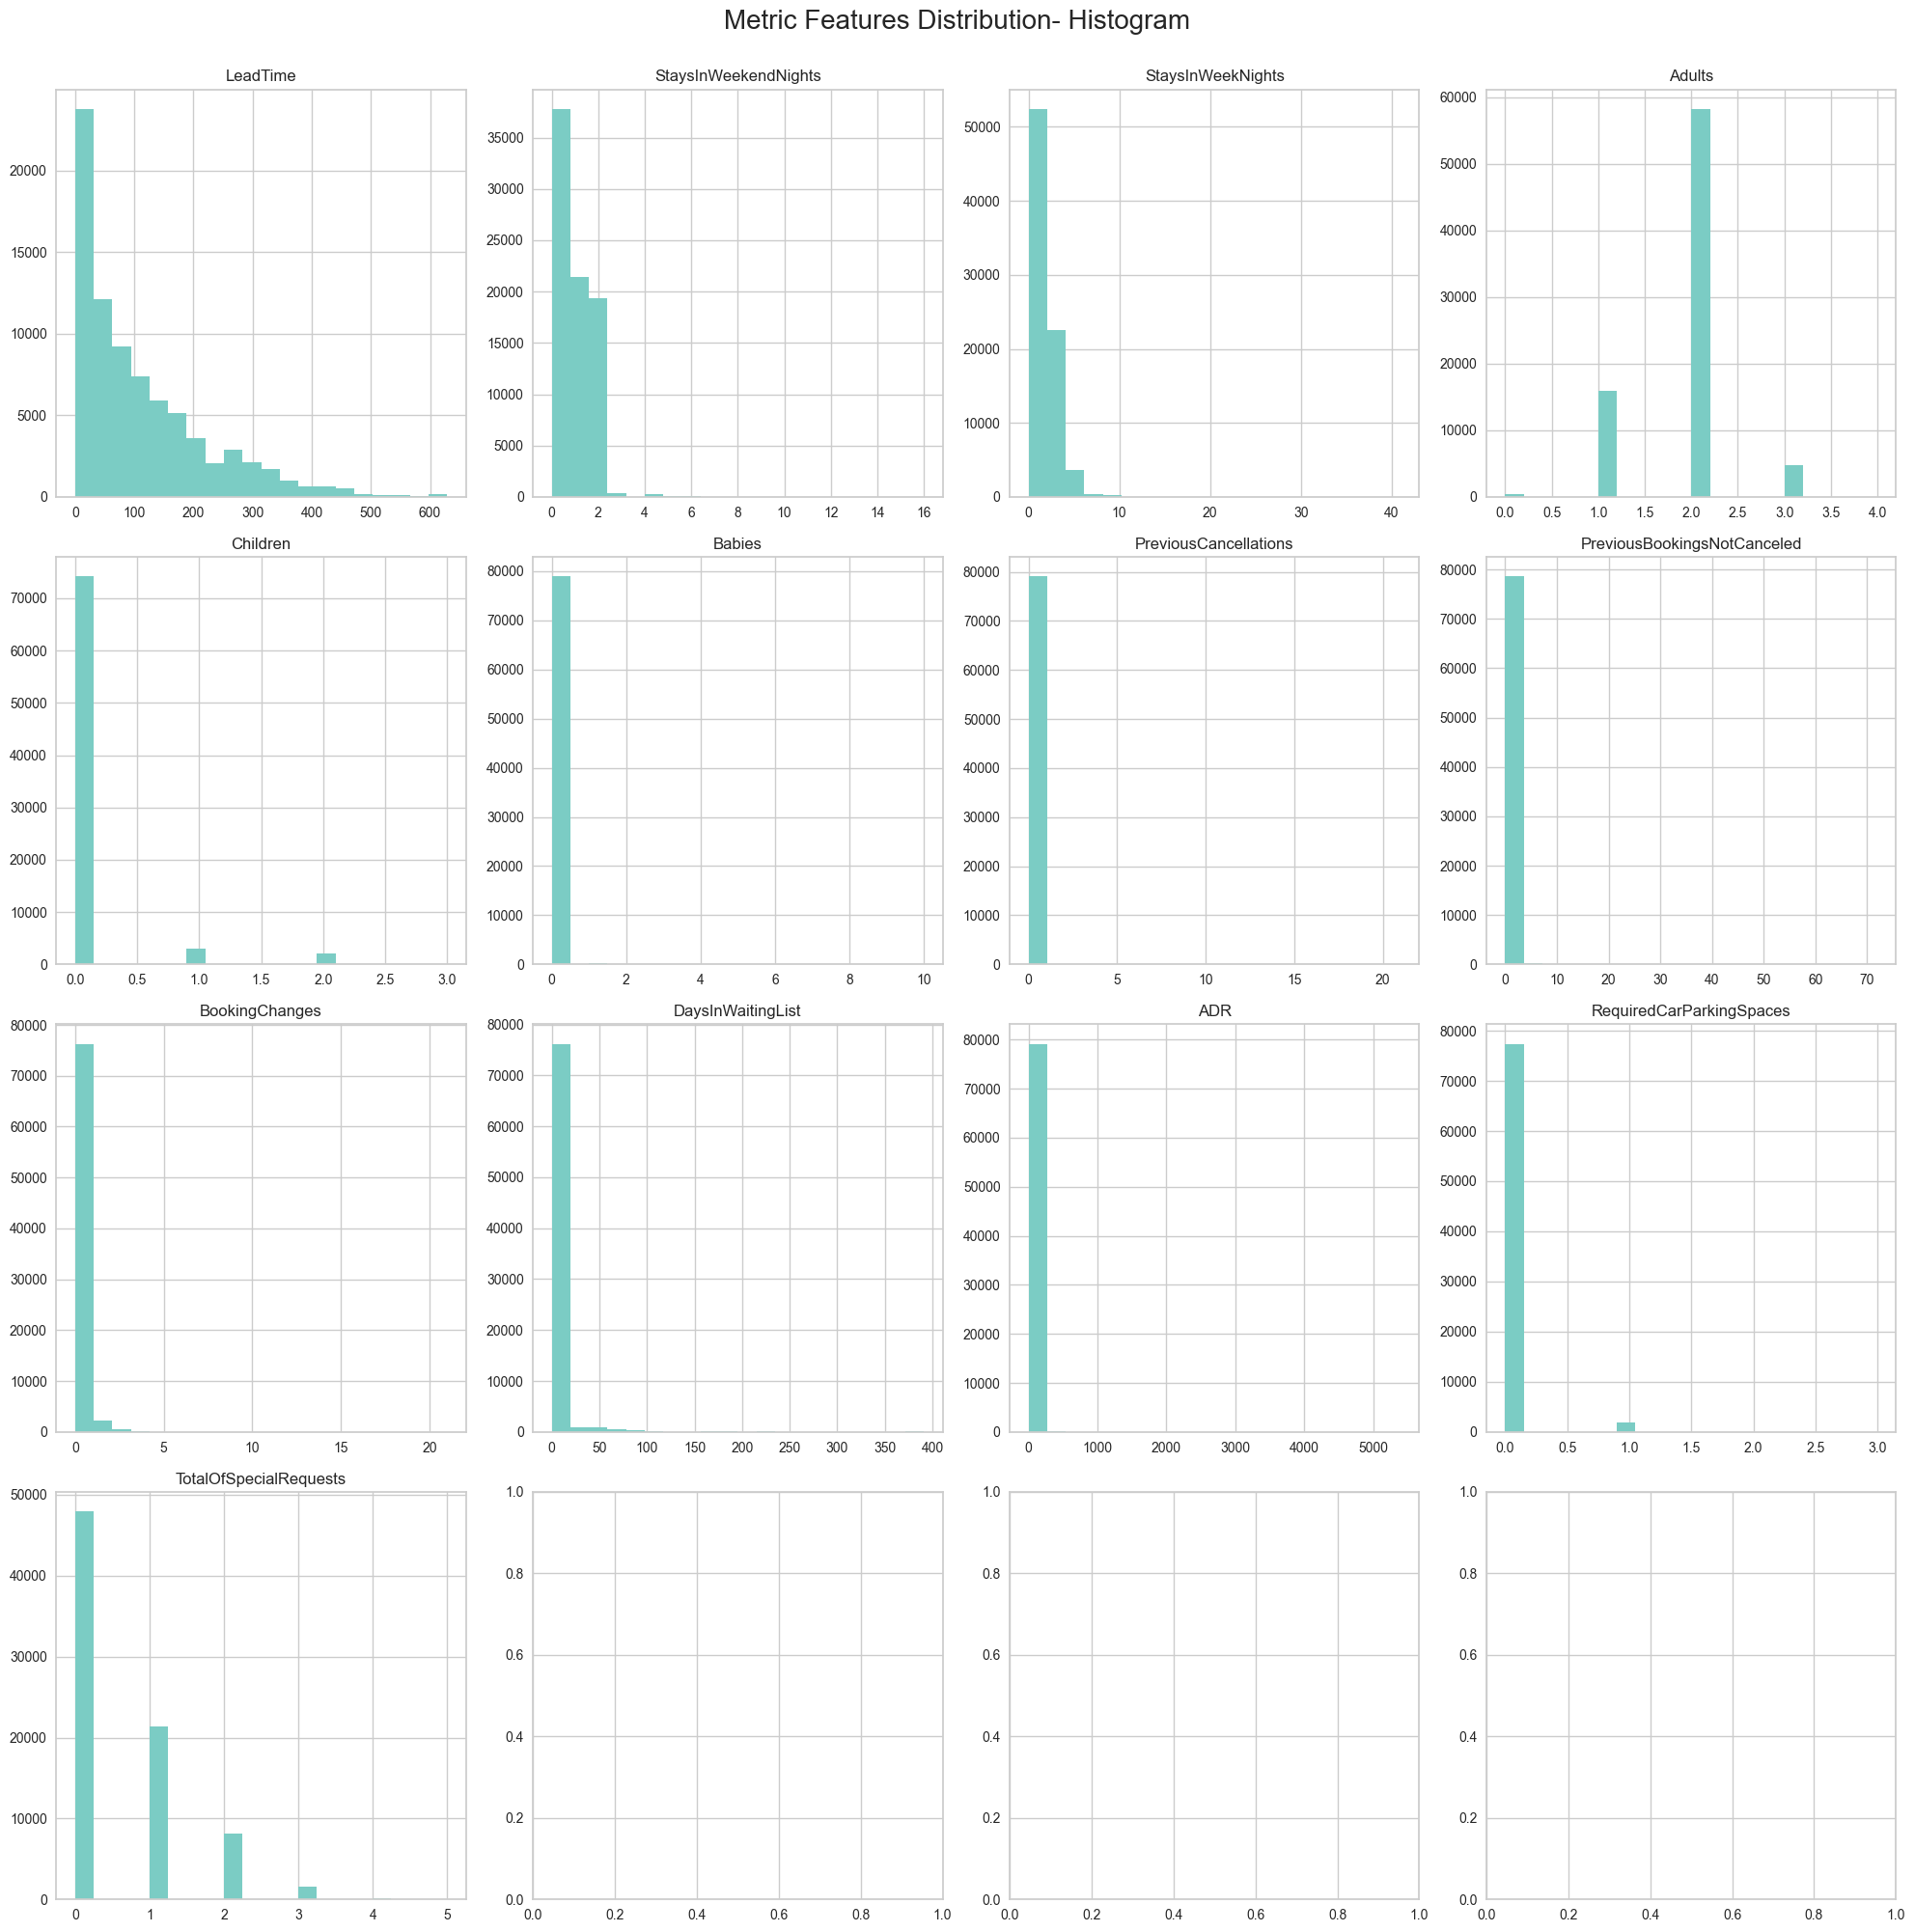

In [52]:
# Analyse metric features distribution through histograms 
plot_histograms(hotel_data, metric_features,'Metric Features Distribution- Histogram')

# LeadTime has a right skewed distribution, meaning that usually people make reservations with less than 100 days in advance
# Once again, it is possible to conclude that StaysinWeekendNights and StaysinWeekNIghts have outliers which are errors 
# In most cases, reservations consist of 2 adults 
# Usually, people do not make any booking changes 
# Almost all reservations do not have children 
# The remaining variables appear have outliers. Therefore, it is not possible to clearly understand its distribution 
# Special Requests are not that common

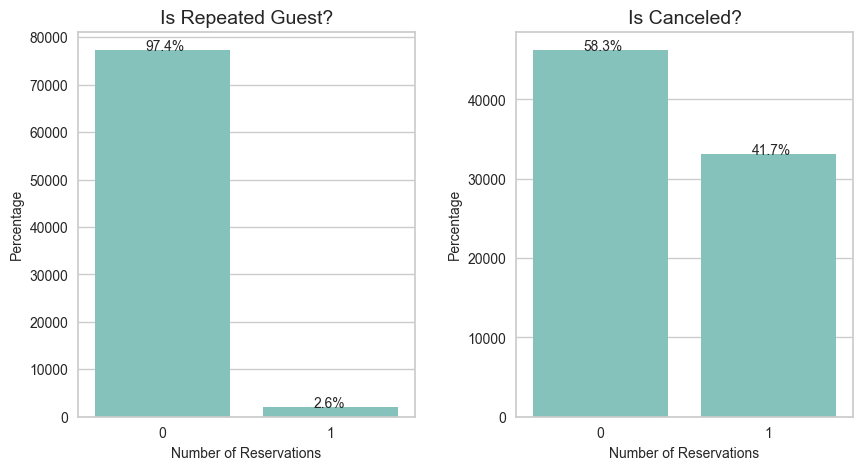

In [53]:
# Analyse class distribution in the boolean features

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the first countplot in the first subplot with percentages
total_1 = float(len(hotel_data['IsRepeatedGuest']))
sns.countplot(x=hotel_data['IsRepeatedGuest'].astype(object), color=color_palette_list[3], ax=ax1)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax1.annotate(percentage, (x, y), size=10)
ax1.set_title('Is Repeated Guest?', fontsize=14)
ax1.set_xlabel('Number of Reservations', fontsize=10)
ax1.set_ylabel('Percentage', fontsize=10)

# Plot the second countplot in the second subplot with percentages
total_2 = float(len(hotel_data['IsCanceled']))
sns.countplot(x=hotel_data['IsCanceled'].astype(object), color=color_palette_list[3], ax=ax2)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_2)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax2.annotate(percentage, (x, y), size=10)
ax2.set_title('Is Canceled?', fontsize=14)
ax2.set_xlabel('Number of Reservations', fontsize=10)
ax2.set_ylabel('Percentage', fontsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

# Only 2.6% of the reservations correspond to repeated guests 
# The % of reservations that were canceled is 16% lower than the percentage of reservations that were not canceled.

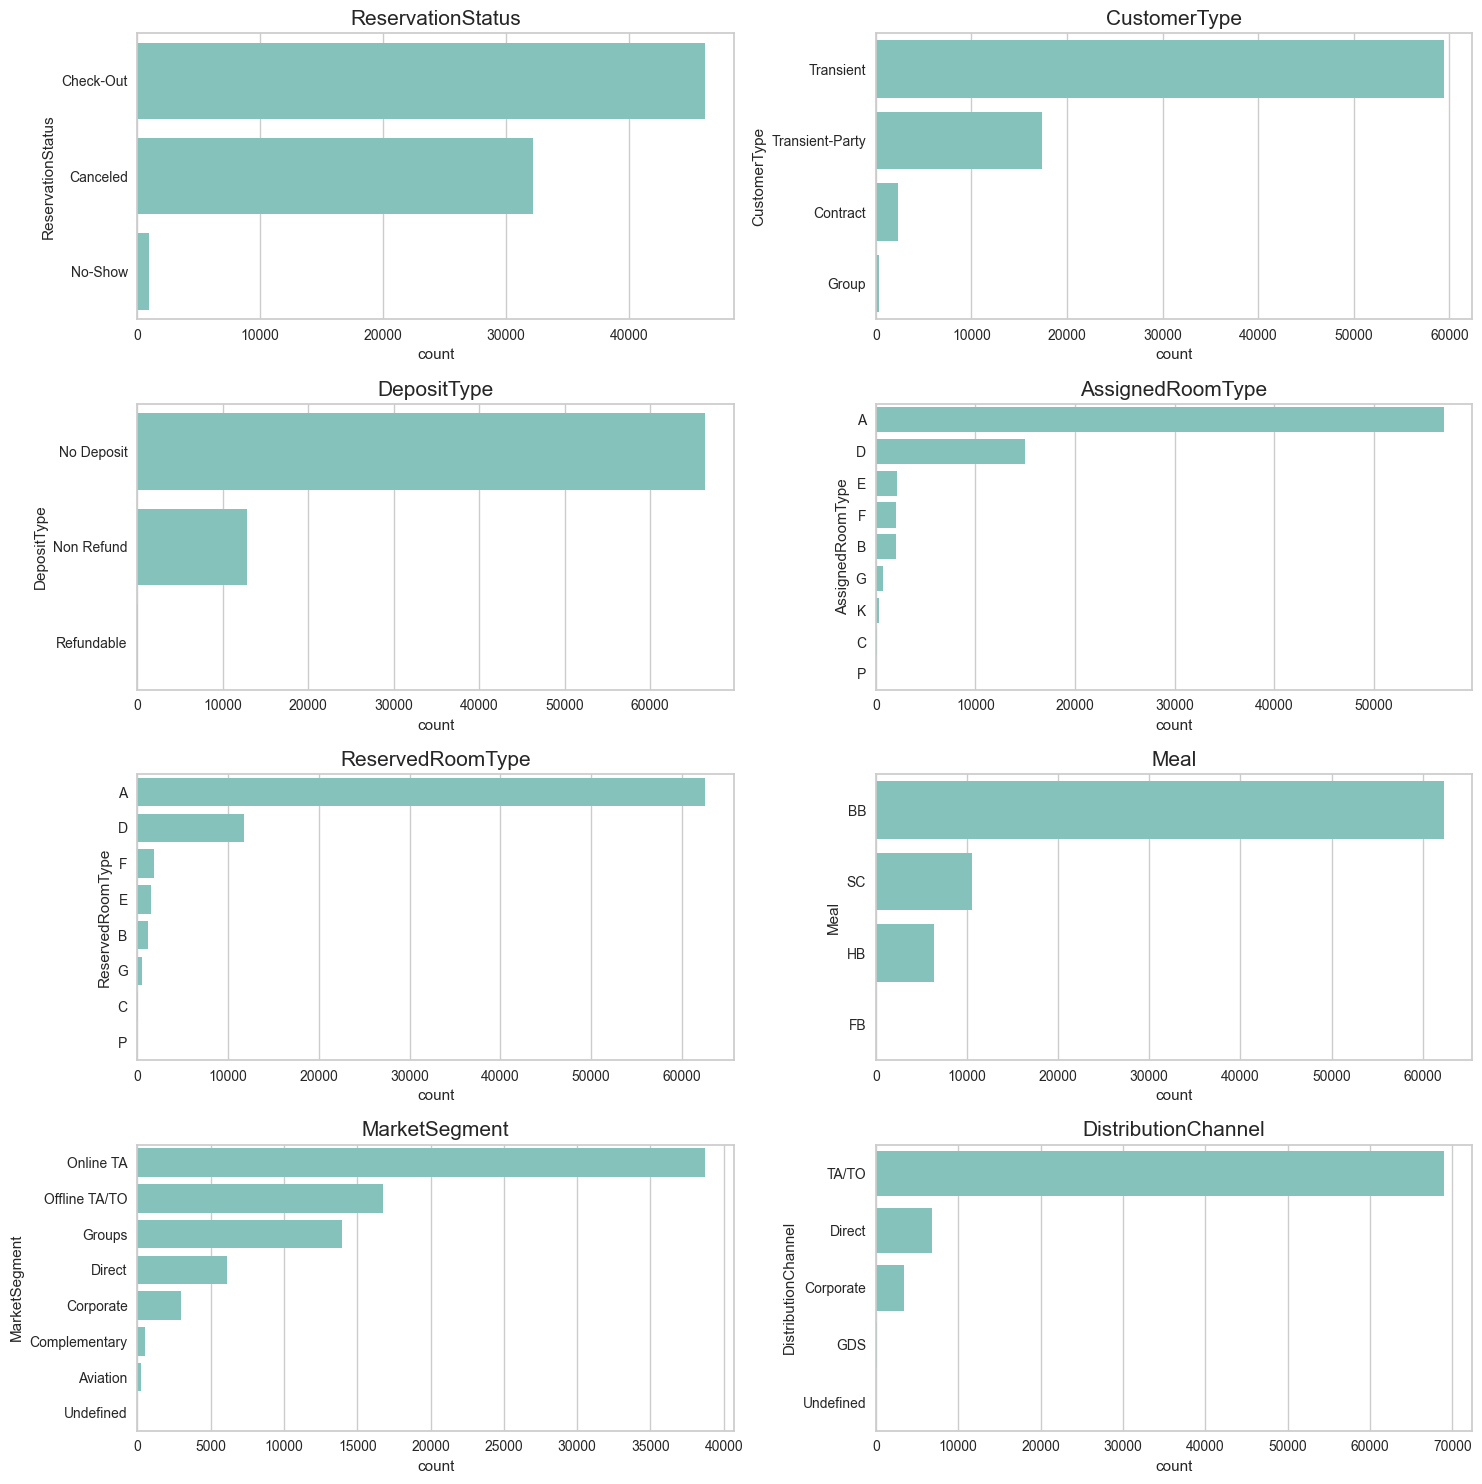

In [54]:
# Count for the metric_features with exception of 'Company','Agent', and 'Country', as they have many different categories
# which makes the visualization harder 

aux= non_metric_features.copy()
aux.remove('Company')
aux.remove('Agent')
aux.remove('Country')

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.ravel()

# Loop through the variables and create countplots for each
for i, var in enumerate(aux):
    graph = sns.countplot(y=hotel_data[var].astype(object), order=hotel_data[var].value_counts().index, 
                          color=color_palette_list[3], ax=axes[i])
    graph.set_title(var, fontsize=15)

plt.tight_layout()
plt.show()

# From this bars it is possible to gather some information about the hotel type of clients: 
# There are still a few people that did not show and they did not cancel the reservation
# Most customer are Transient or Transient-Party
# In most reservations, no deposit was made by the customer
# A and D are the most assigned and reserved room type
# Guest usually prefer no meal included in the package or just Bed&Breakfast
# A large percentage of the customers are from an Online TA. Offline TA/TO and Groups are also common segments. 
# Most reservations are made through a third party entity

In [55]:
# Check the top 10 countries 
hotel_data['Country'].value_counts().head(10)

# Most people come fom Portugal 

PRT    30960
FRA     8804
DEU     6084
GBR     5315
ESP     4611
ITA     3307
BEL     1894
BRA     1794
USA     1618
NLD     1590
Name: Country, dtype: int64

In [56]:
# Check the top 10 travel agencies 
hotel_data['Agent'].value_counts().head(10)

# Most people make a reservation through travel agency 9

9     31955
1      7137
14     3640
7      3539
6      2683
28     1666
3      1308
8      1236
37     1230
19     1061
Name: Agent, dtype: int64

In [57]:
# Check the top 10 companies
hotel_data['Company'].value_counts().head(10)

# Company 40 is the one with the highest number of reservations made/or paid

40     924
67     267
45     250
153    215
219    141
233    114
174    113
51      86
242     61
348     59
Name: Company, dtype: int64

**Correlation Analysis**

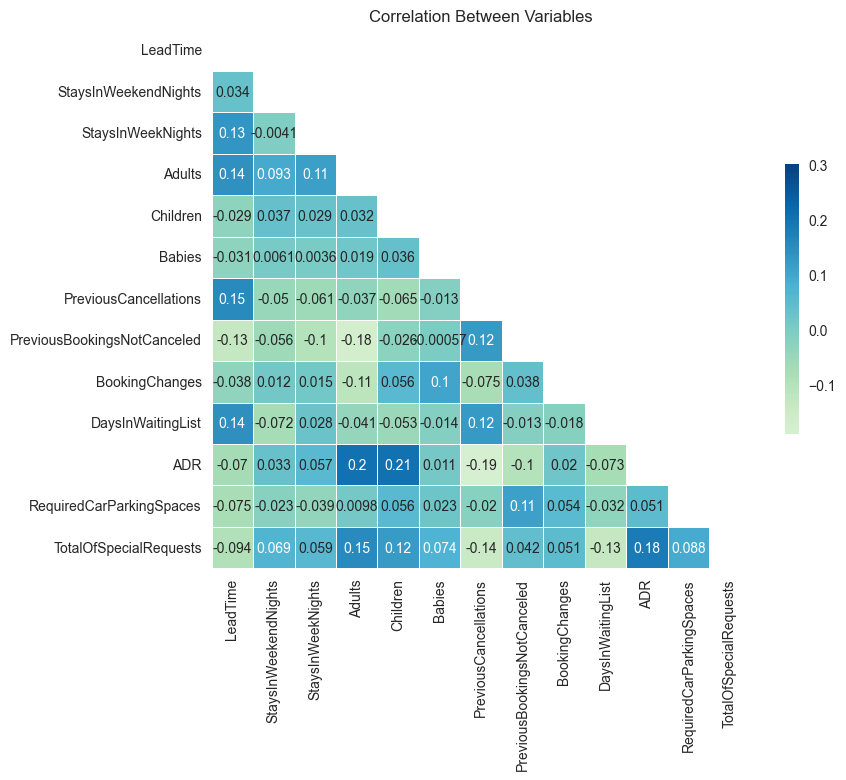

In [58]:
# Check correlation between metric features
correlation_matrix (hotel_data, metric_features)

# There are not highly correlated variables. All correlations are below 0.3 

<hr>
<a class="anchor" id="title5">
    
# 5. Data Preprocessing
    
</a>

In [59]:
# Create a copy of the original dataframe
df= hotel_data.copy()

<hr>
<a class="anchor" id="subtitle5.1">
    
## 5.1. Missing Values Treatment
    
</a>

In [60]:
# Create a copy of df
df_missing_values=df.copy()

In [61]:
# Percentage of null values
df_missing_values.isna().sum()[df_missing_values.isna().sum()>0]*100/df_missing_values.shape[0]
# The variables Children, Country, Agent and Company have missing values.

Children     0.005042
Country      0.030253
Agent       10.249590
Company     95.349805
dtype: float64

In [62]:
# For both Children and Country variables, the rows that have any null are removed, 
# since only represent 0.035% of the whole data
df_missing_values.dropna(subset=['Children','Country'],inplace = True)

In [63]:
# The column Company should be dropped due to lack of valuable data for analysis. (more than 95% of missing values).
df_missing_values.drop('Company', axis = 1, inplace = True)

In [64]:
# The 10% of the data in column Agent had category 'NULL'. However, these are not missing values but rather meaning
# that the booking does not have an agent ID assigned. Therefore these cases are going to be substituted by 'Not Applicable'.

df_missing_values['Agent'] = df_missing_values['Agent'].fillna('Not Applicable')

In [65]:
# Updating df
df=df_missing_values.copy()

<hr>
<a class="anchor" id="subtitle5.2">
    
## 5.2. Duplicates Treatment
    
</a>

In [66]:
# After careful consideration, the possible duplicates are going to be kept. 
# In the description of the data it said that each row is a different reservation.
# Therefore these are just normal reservations that happened to be on the same day and have the same charecteristics.

<hr>
<a class="anchor" id="subtitle5.3">
    
## 5.3. Data Formating
    
</a>

In [67]:
# Create a copy of df 
df_formatting=df.copy()

In [68]:
# Do the following datatype transformations:
# Children:  float to int
# IsCanceled, IsRepeatedGuest: int to bool
# ReservationStatusDate: object to datetime

In [69]:
datatypes_transformation= {
    'Children':'int64'
}

df_formatting= df_formatting.astype(datatypes_transformation)
df_formatting['ReservationStatusDate']=pd.to_datetime(df_formatting['ReservationStatusDate'],format="%Y-%m-%d")

In [70]:
# The variables ArrivalDateYear,ArrivalDateMonth, and ArrivalDateDayOfMonth will be joined in one single variable
# representing the Arrival Date, which will be of datetime type.

df_formatting['ArrivalDate'] = pd.to_datetime(df_formatting[['ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateDayOfMonth']].\
                                             astype(str).apply('-'.join, axis=1), format='%Y-%B-%d')

In [71]:
#Updating df
df=df_formatting

<hr>
<a class="anchor" id="subtitle5.4">
    
## 5.4. Inconsistencies 
    
</a>

In [72]:
# Create a copy of df
df_inc=df.copy()

**1) No adults in the reservation (Adults = 0)**

In [73]:
# All cases - Reservation of room where Adults = 0
len(df_inc[(df_inc['Adults'] == 0)].iloc[:,8:11])

382

In [74]:
# a) Reservation of room for Children only or Children and babies - Valid
filter_a=(df_inc['Adults'] == 0) & ~(df_inc['Children'] == 0)
len(df_inc[filter_a].iloc[:,8:11])

223

In [75]:
# b) Reservation of room for Babies only - Invalid
filter_b=(df_inc['Adults'] == 0)& (df_inc['Children'] == 0) & ~(df_inc['Babies'] == 0)
len(df_inc[filter_b].iloc[:,8:11])

0

In [76]:
# c) Reservation of room for nobody - Invalid
filter_c=(df_inc['Adults'] == 0)& (df_inc['Children'] == 0) & (df_inc['Babies'] == 0)
len(df_inc[filter_c].iloc[:,8:11])

159

In [77]:
# Remove these rows (159 rows)
df_inc=df_inc[~filter_c]

**2) No Average Daily Rate for bookings not cancelled/ no showed**

In [78]:
# Initial Assumption: ADR is null only when booking canceled. 

# According to the question: 'ADR includes the price paid for the accomodation right? 
#                             Therefore ADR = 0 would only apply for cases when customer cancelled the booking 
#                             and had free cancelation included, corret? Could a customer be entitled to free 
#                             nights and therefore had an ADR of zero?'
# Stakeholders answer:
# 'It is only the Accommodation price. It does not include food, spa, or other services.'
# 'It can be zero if the room is offered, house-use, or promotion.'

In [79]:
# ADR = 0
len(df_inc[(df_inc['ADR'] == 0)]) #1071 cases

1071

In [80]:
#ADR = 0 and booking NOT canceled
len(df_inc[(df_inc['ADR'] == 0) & (df_inc['IsCanceled'] == False)]) #

# These are going to be kept.

965

In [81]:
df_inc.loc[(df_inc['ADR'] != 0) &(df_inc['IsCanceled']==True) ,'ADR'].describe()

count    32955.000000
mean       105.123685
std         47.113816
min          0.500000
25%         76.930000
50%        100.000000
75%        125.800000
max       5400.000000
Name: ADR, dtype: float64

In [82]:
df_inc.loc[(df_inc['ADR'] != 0) &(df_inc['IsCanceled']==False) ,'ADR'].describe()

count    45117.000000
mean       108.304952
std         37.569547
min          1.000000
25%         80.750000
50%        100.300000
75%        126.900000
max        510.000000
Name: ADR, dtype: float64

**3) Unrealistic Lead Time**

<AxesSubplot:xlabel='booking_date'>

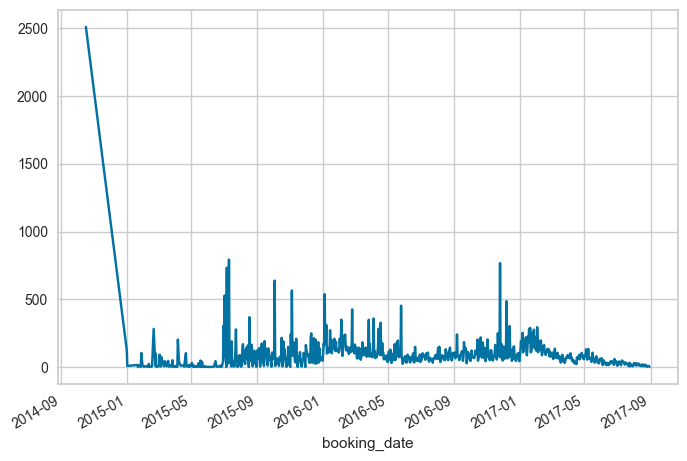

In [83]:
# Converting the 'days_to_subtract' column to a timedelta object
days_to_subtract = pd.to_timedelta(df_inc['LeadTime'], unit='d')

#subtracting days_to_subtract to ArrivalDate as booking_date
df_inc['booking_date']=df_inc['ArrivalDate'] - days_to_subtract
df_inc.groupby('booking_date')['IsCanceled'].count().plot()

# Seems that the first booking date has a peculiar spike and must be analysed.
# It can be related to the opening of the hotel.

In [84]:
df_inc['booking_date'].value_counts().head()

2014-10-17    2509
2015-07-10     793
2016-11-25     767
2015-07-06     733
2015-10-03     638
Name: booking_date, dtype: int64

In [85]:
df_inc[df_inc['booking_date']=='2014-10-17'].groupby('booking_date')['IsCanceled'].value_counts(normalize=True)
# Since these values are highly unbalanced, they can affect the accuracy and the model and will be removed.

booking_date  IsCanceled
2014-10-17    1             0.926664
              0             0.073336
Name: IsCanceled, dtype: float64

In [86]:
# The rows are dropped since they are outliers.
df_inc = df_inc.drop(df_inc[df_inc['booking_date']=='2014-10-17'].index)
df_inc.drop('booking_date',axis=1,inplace=True)

**4) Repetead Guests with PreviousBookingsNotCanceled/PreviousCancellations**

In [87]:
# According to the question: 'If a customer has had previous cancellations therefore can 
#                            it be considered to be a repeated guest? Since he booked a room 
#                            (registered in the PMS database) and only after he cancelled it?'
# Stakeholders answer:
# 'It can be considered a repeated guest, even though he/she never made a check-in.'

In [88]:
# PreviousBookingsNotCanceled and PreviousCancellations mean the guest is repeated, then IsRepeatedGuest should be 1
# a) PreviousBookingsNotCanceled
filter_a=(df_inc['PreviousBookingsNotCanceled'] > 0) & (df_inc['IsRepeatedGuest'] == 0)
len(df_inc[filter_a])

171

In [89]:
# Replacing values of IsRepeatedGuest by 1
df_inc.loc[filter_a, 'IsRepeatedGuest'] = 1

In [90]:
# b) PreviousCancellations
filter_b=((df_inc['PreviousCancellations'] > 0) & (df_inc['IsRepeatedGuest'] == 0))
len(df_inc[filter_b])

2489

In [91]:
# Replacing values of IsRepeatedGuest by 1
df_inc.loc[filter_b, 'IsRepeatedGuest'] = 1

**5) Reservation Status**

In [92]:
df_inc[['ReservationStatus','IsCanceled']].value_counts()

ReservationStatus  IsCanceled
Check-Out          0             45898
Canceled           1             29821
No-Show            1               915
dtype: int64

In [93]:
# a) When ReservationStatus = Check-Out
# ReservationStatusDate should be after or on the same day of Arrival
filter_a = (df_inc['ReservationStatus'] == 'Check-Out') & (df_inc['ReservationStatusDate'] < df_inc['ArrivalDate'])
len(df_inc[filter_a])

0

In [94]:
# b) When ReservationStatus = Canceled
# ReservationStatusDate should be before or in the same day of Arrival
filter_a = (df_inc['ReservationStatus'] == 'Canceled') & (df_inc['ReservationStatusDate'] > df_inc['ArrivalDate'])
len(df_inc[filter_a])

0

In [95]:
# c) When ReservationStatus = No-Show
# ReservationStatusDate should be on the same day of Arrival
filter_a = (df_inc['ReservationStatus'] == 'No-Show') & (df_inc['ReservationStatusDate'] != df_inc['ArrivalDate'])
len(df_inc[filter_a])

0

**6) Stay Nights**

In [96]:
# a)
# If StaysInWeekendNights > 2 that means the customer stayed for the full week following the first weekend 
# meaning StaysInWeekNights should be at least 5.

filter=(df_inc['StaysInWeekendNights'] > 2) & (df_inc['StaysInWeekNights'] < 5)
len(df_inc.loc[filter])
#There are 0 occurencies.

0

In [97]:
# b)
# Verify how many reservations that are checked-out, have no stayed nights
len(df_inc.loc[(df_inc['IsCanceled']==0) & 
          (df_inc['StaysInWeekendNights']==0) & 
          (df_inc['StaysInWeekNights']==0)])

#These are day-use cases, and therefore, valid.

251

In [98]:
# b)
# Verify how many reservations that are checked-out, have no stayed nights
len(df_inc.loc[(df_inc['IsCanceled']==1) & 
          (df_inc['StaysInWeekendNights']==0) & 
          (df_inc['StaysInWeekNights']==0)])

#These were canceled day-use cases, and therefore, valid.

13

**7) ArrivalDateWeekNumber**

In [99]:
# Extract the week number from 'ArrivalDate' dates
week_num_from_date = df_inc['ArrivalDate'].dt.week

# 'match' checks if all four columns match the 'arrival_date' column
match = (week_num_from_date == df_inc['ArrivalDateWeekNumber'])

print(len(df_inc[~match]))

42563


In [100]:
# Based on: https://www.epochconverter.com/weeks/2017
# The week_num_from_date created is going to be the new ArrivalDateWeekNumber column.

df_inc['ArrivalDateWeekNumber'] = week_num_from_date

**8) MarketSegment and Distribution Channel**

In [101]:
df_inc['DistributionChannel'].unique()

array(['TA/TO', 'Direct', 'Corporate', 'GDS'], dtype=object)

In [102]:
# a) 'Undefined' category. The reservation containing this also had other missing values removed during the proper stage, not appearing anymore.
# b) Discrepancies between the two
# According to the question: When analysing inconsistencies at Market Segment and 
#                            Distribution Channel if one has value 'Direct', the other should 
#                            also have the same value or is it not necessary to happen that?
# Stakeholders answer: 'Usually it should, but it can happen not to be.'

# Therefore these columns can assume different values and that is valid.

# Example: Cases where 'Direct' is on Market Segment but not on Distribution Channel (43)
len(df_inc.loc[(df_inc['MarketSegment'] == 'Direct') & ~(df_inc['DistributionChannel'] == 'Direct'),['MarketSegment','DistributionChannel']])

43

**9) Reservations with more than 8 babies**

In [103]:
df_inc = df_inc.drop(df_inc[df_inc['Babies'] > 8].index)

In [104]:
df_inc['Babies'].value_counts(normalize=True)

0    0.995211
1    0.004711
2    0.000078
Name: Babies, dtype: float64

In [105]:
# Since The Distribution of babies is very unbalanced the colun is dropped.
df_inc.drop('Babies',axis=1,inplace=True)

**10) Incorrect Iso Codes**

In [106]:
# Check if country ISO codes are in accordance with the updated format (ISO 31661-1, alpha-3 code), available in pycountry package
# Reference: https://pypi.org/project/pycountry/

# Create a set with all alpha3_codes
alpha3_codes = set([country.alpha_3 for country in pycountry.countries])
# Create a set with hotels country's iso codes
unique_countries = set(df_inc['Country'].unique())

# Saving non existing unique_countries in alpha3_codes to missing_countries
missing_countries = unique_countries - alpha3_codes

# Print missing countries
for country in missing_countries:
    print(country, "doesn't exist.")

CN doesn't exist.
TMP doesn't exist.


In [107]:
# From verified sources, East Timor no longer is represented as TMP but TLS. It will be updated to the newer alpha_3 code.
# "Name changed from East Timor (TP, TMP, 626) to Timor-Leste (TL, TLS, 626)."-https://www.iso.org/obp/ui/#iso:code:3166:TP

df_inc['Country'] = df_inc['Country'].replace('TMP', 'TLS')

# CN is the alpha-2 code of China, not alpha-3. So it will be replaced by the alpha-3
df_inc['Country'] = df_inc['Country'].replace('CN', 'CHN')

# Based on: https://www.countryfaq.com/iso-country-codes/

# ATA is the alpha-3 code of Antarctica. These bookings are going to be dropped (2)
df_inc = df_inc.drop(df_inc[df_inc['Country'] == 'ATA'].index)

# ATF is the alpha-3 code of French Southern Territories. This booking is going to be dropped (1)
df_inc = df_inc.drop(df_inc[df_inc['Country'] == 'ATF'].index)

**11) Misspecified Countries**

In [108]:
# Antarctica and French Southern Territories are locations with low probabily of being customers.

# ATA is the alpha-3 code of Antarctica. These bookings are going to be dropped (1)
df_inc = df_inc.drop(df_inc[df_inc['Country'] == 'ATA'].index)

# ATF is the alpha-3 code of French Southern Territories. This booking is going to be dropped (2)
df_inc = df_inc.drop(df_inc[df_inc['Country'] == 'ATF'].index)

In [109]:
# In the case of reservations where clients have no previous stays and the reservation is cancelled, 
# the country is not trustful and is replaced by 'Not Applicable'. 
# Otherwise, the customer has already arrived in the hotel and the country is confirmed.

filter = ((df_inc['PreviousBookingsNotCanceled']==0)& (df_inc['IsCanceled']==1) )
df_inc.loc[filter,'Country']='Not Applicable'

In [110]:
print(df_inc['Country'].value_counts(normalize=True).head())

Not Applicable    0.399522
PRT               0.139777
FRA               0.092302
DEU               0.065380
GBR               0.048885
Name: Country, dtype: float64


In [111]:
#Updating df
df=df_inc

<hr>
<a class="anchor" id="subtitle5.5">
    
## 5.5. Outlier Analysis  
    
</a>

In [112]:
# To determine the best approach for treating outliers, throughout this section we will verify the distribution 
#before and after treatment and compare it to the various methods used in order to select the most appropriate 
#method to use. Therefore, we will use Manual Detection; IQR; a combination of both; and DBSCAN

In [113]:
# Create a copy of df
df_out = df.copy()

In [114]:
metric_features=['LeadTime','StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 
                 'PreviousCancellations', 'PreviousBookingsNotCanceled','BookingChanges',
                 'DaysInWaitingList','ADR','TotalOfSpecialRequests','RequiredCarParkingSpaces']

non_metric_features = [column for column in df_out.columns if column not in metric_features]

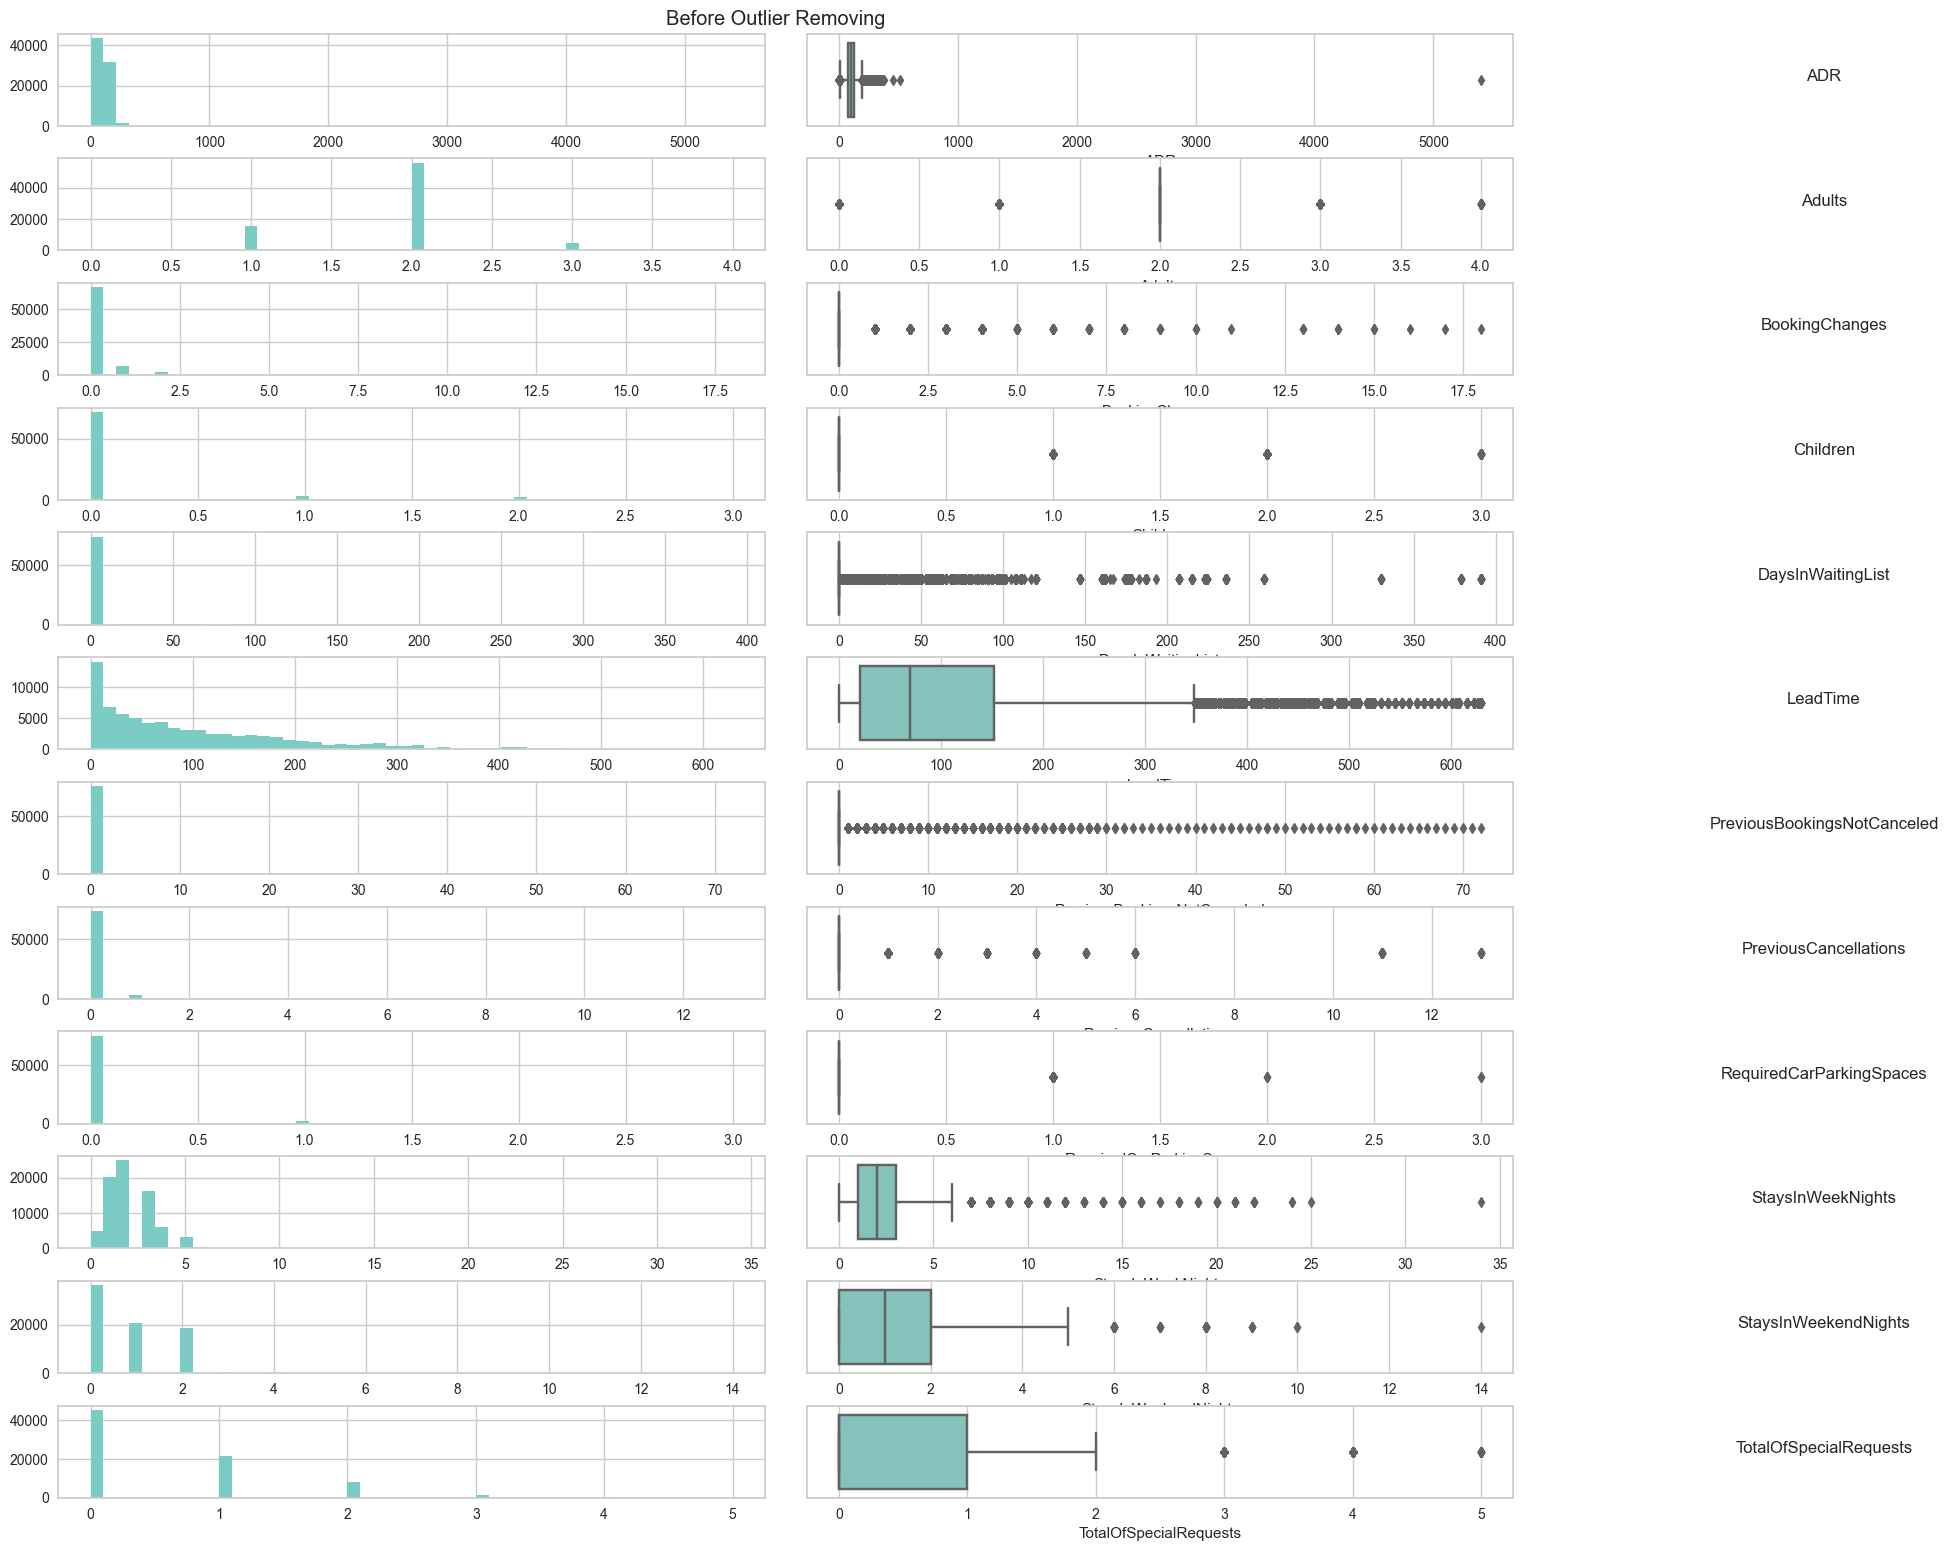

In [115]:
hist_box_maker(df_out[metric_features],"Before Outlier Removing",15,15)

**Manual Detection**

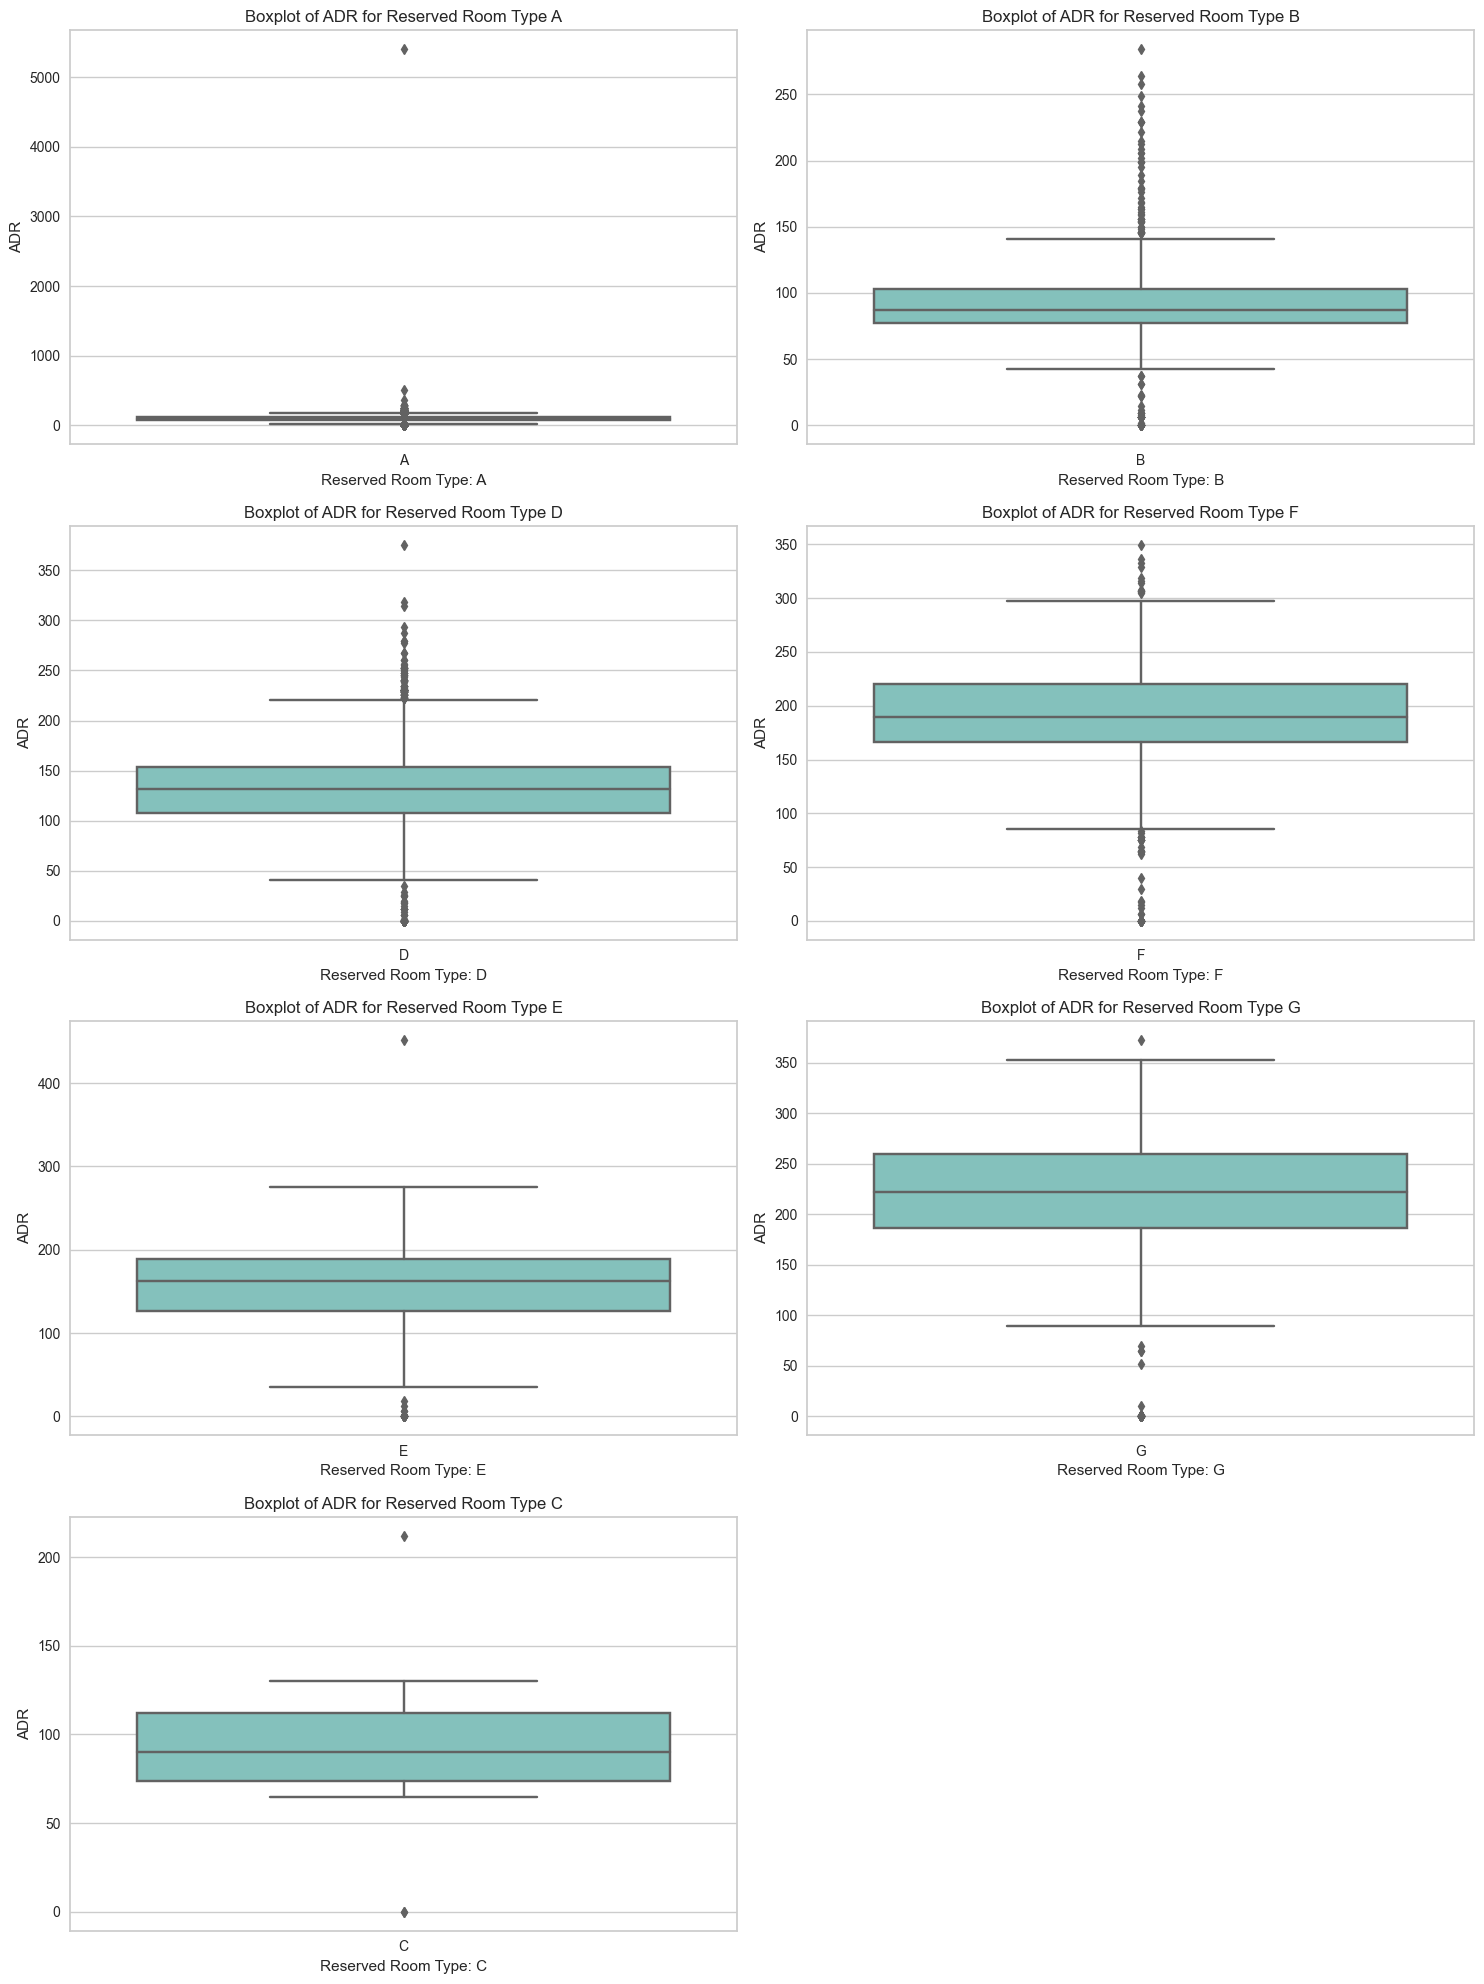

In [116]:
room_types = df_out["ReservedRoomType"].unique().tolist()
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i, room_type in enumerate(room_types):
    row = i // num_cols
    col = i % num_cols
    
    # Filter the dataframe by AssignedRoomType
    df_filtered = df_out[df_out["ReservedRoomType"] == room_type]
    
    sns.boxplot(x=df_filtered["ReservedRoomType"], y=df_filtered['ADR'], ax=axes[row, col], palette=color_palette)
    axes[row, col].set_xlabel("Reserved Room Type: " + room_type)
    axes[row, col].set_ylabel("ADR")
    axes[row, col].set_title("Boxplot of ADR for Reserved Room Type " + room_type)

# Remove empty subplots if necessary
if len(room_types) < num_rows * num_cols:
    for i in range(len(room_types), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [117]:
filter_md = (
    ((
        (df_out['ReservedRoomType'] == 'A') & (df_out['ADR'] < 230)
    ) |
    (
        (df_out['ReservedRoomType'] == 'D') & (df_out['ADR'] <= 217) & (df_out['ADR'] >= 55)
    ) |
    (
        (df_out['ReservedRoomType'] == 'E') & (df_out['ADR'] <= 280) & (df_out['ADR'] >= 50)
    ) |
    (
        (df_out['ReservedRoomType'] == 'F') & (df_out['ADR'] <= 290) & (df_out['ADR'] >= 50)
    ) |
    (
        (df_out['ReservedRoomType'] == 'B') & (df_out['ADR'] <= 130) & (df_out['ADR'] > 45)
    ) |
    (
        (df_out['ReservedRoomType'] == 'G') & (df_out['ADR'] <= 350) & (df_out['ADR'] > 120)
    ) |
    (
        (df_out['ReservedRoomType'] == 'C') & (df_out['ADR'] < 150) & (df_out['ADR'] > 50)
    )) &
    (
        (df_out['Adults'] > 0) & (df_out['Adults'] < 4) &
        (df_out['BookingChanges'] <= 2) &
        (df_out['Children'] <= 2) &
        (df_out['DaysInWaitingList'] < 105) &
        (df_out['LeadTime'] < 338) &
        (df_out['PreviousBookingsNotCanceled'] <= 4) &
        (df_out['PreviousCancellations'] < 2) &
        (df_out['RequiredCarParkingSpaces'] < 2) & 
        (df_out['StaysInWeekNights'] < 6) &
        (df_out['StaysInWeekendNights'] < 4) &
        (df_out['TotalOfSpecialRequests'] < 3)
    )
)

filtered_data = df_out[filter_md]

In [118]:
print('Percentage of data kept after removing outliers:', np.round(df_out[filter_md].shape[0] / df_out.shape[0]* 100, 2), '%')

Percentage of data kept after removing outliers: 89.04 %


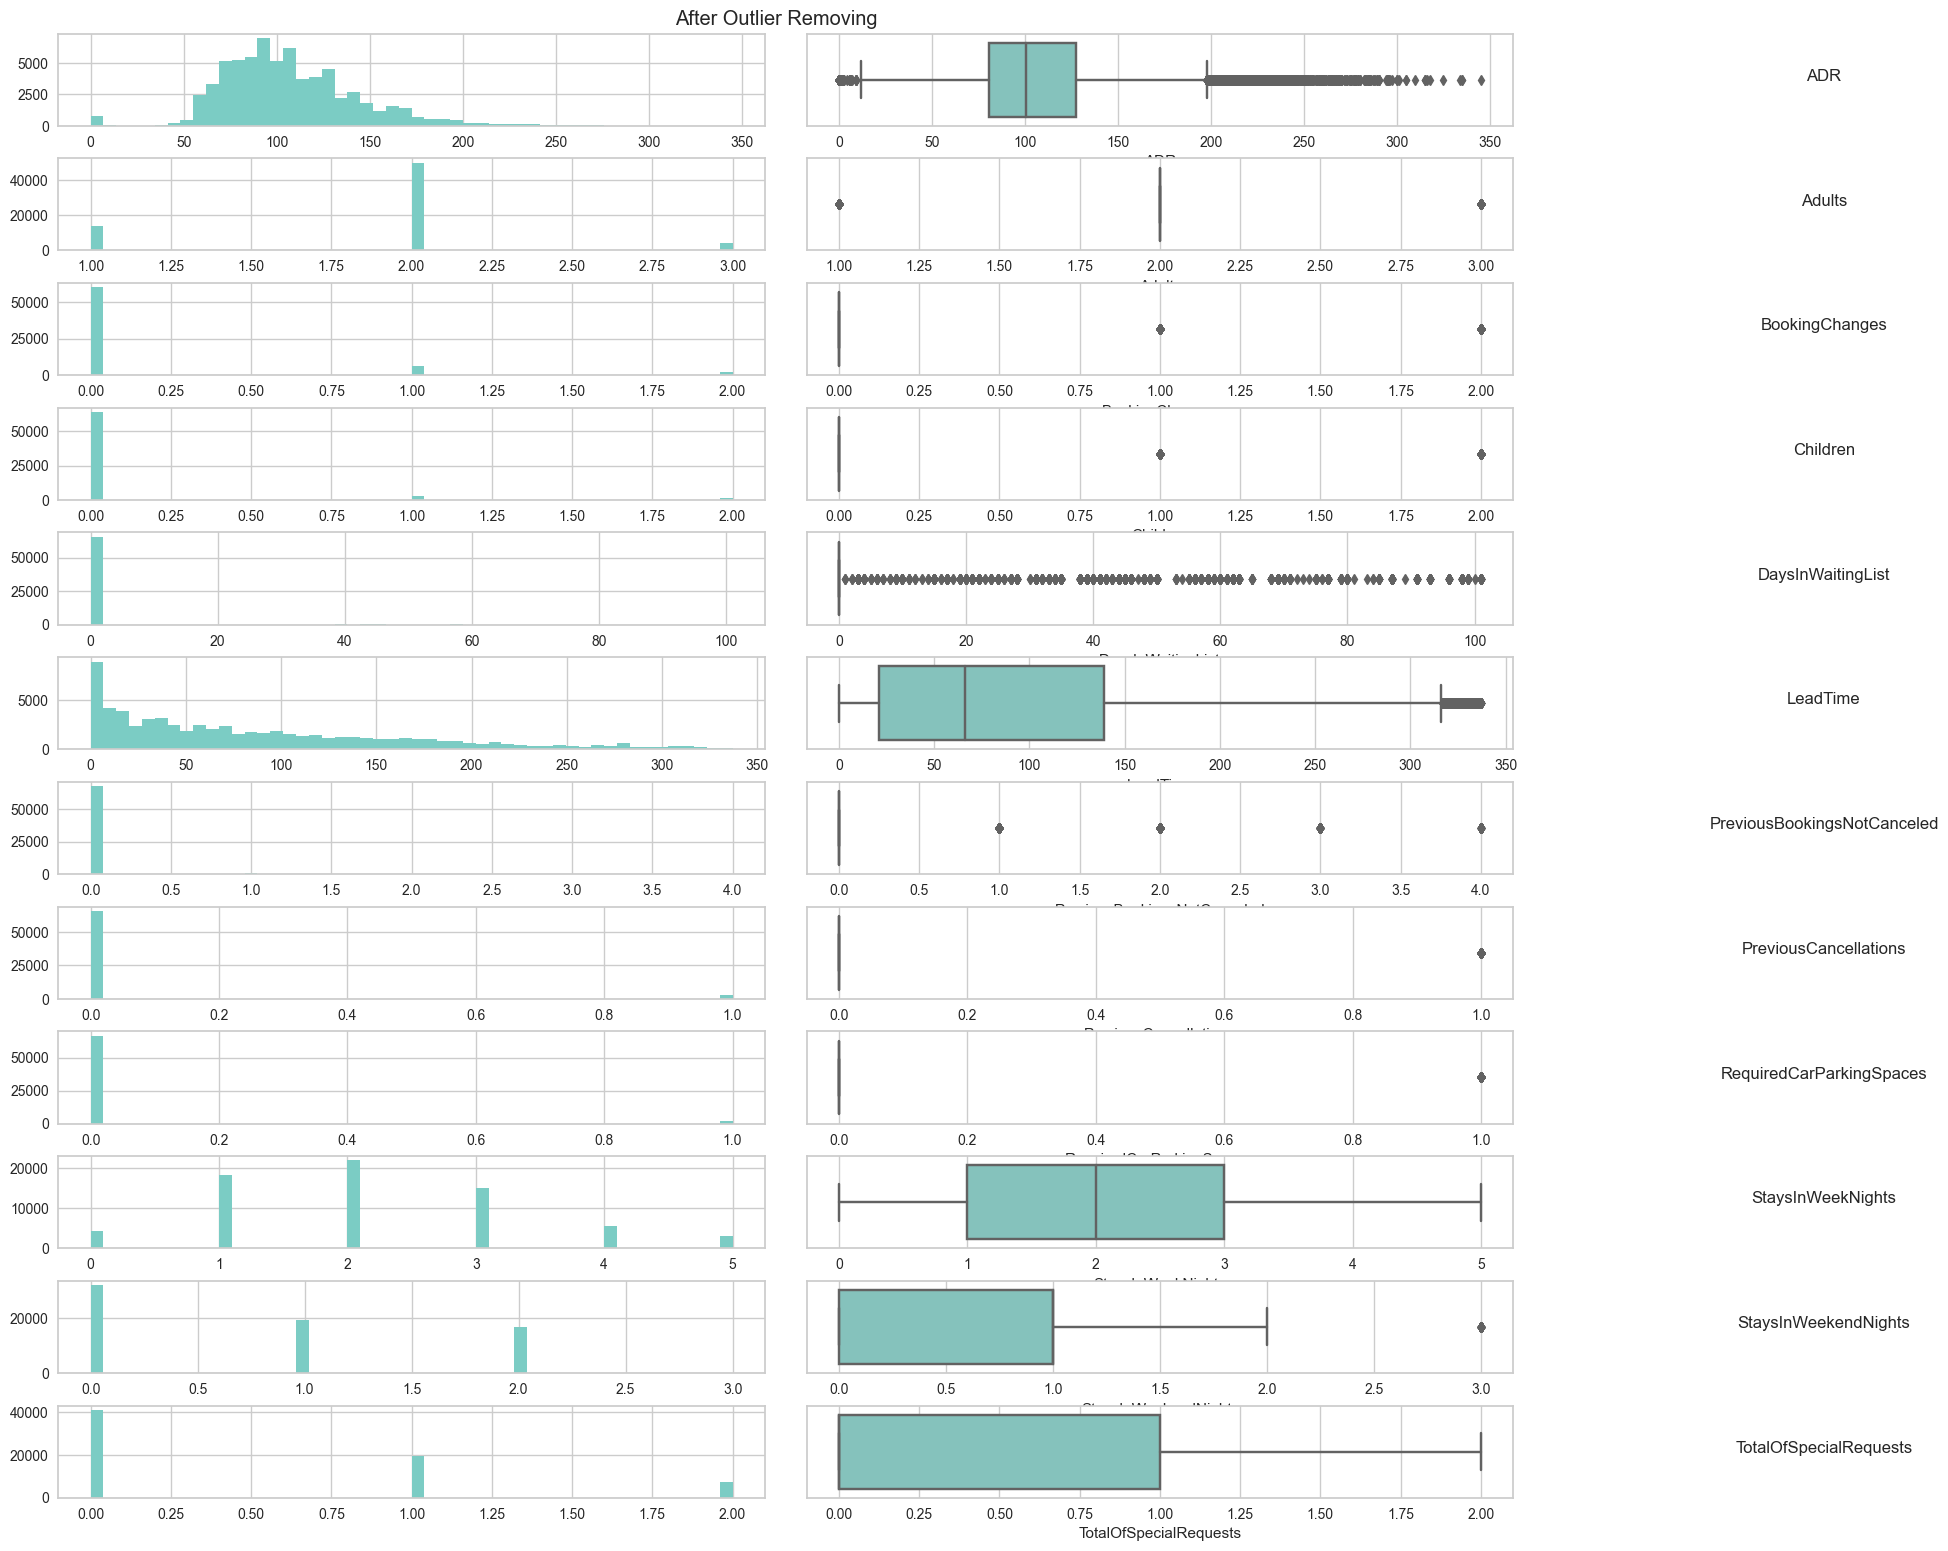

In [119]:
hist_box_maker((df_out[filter_md])[metric_features],"After Outlier Removing",15,15)

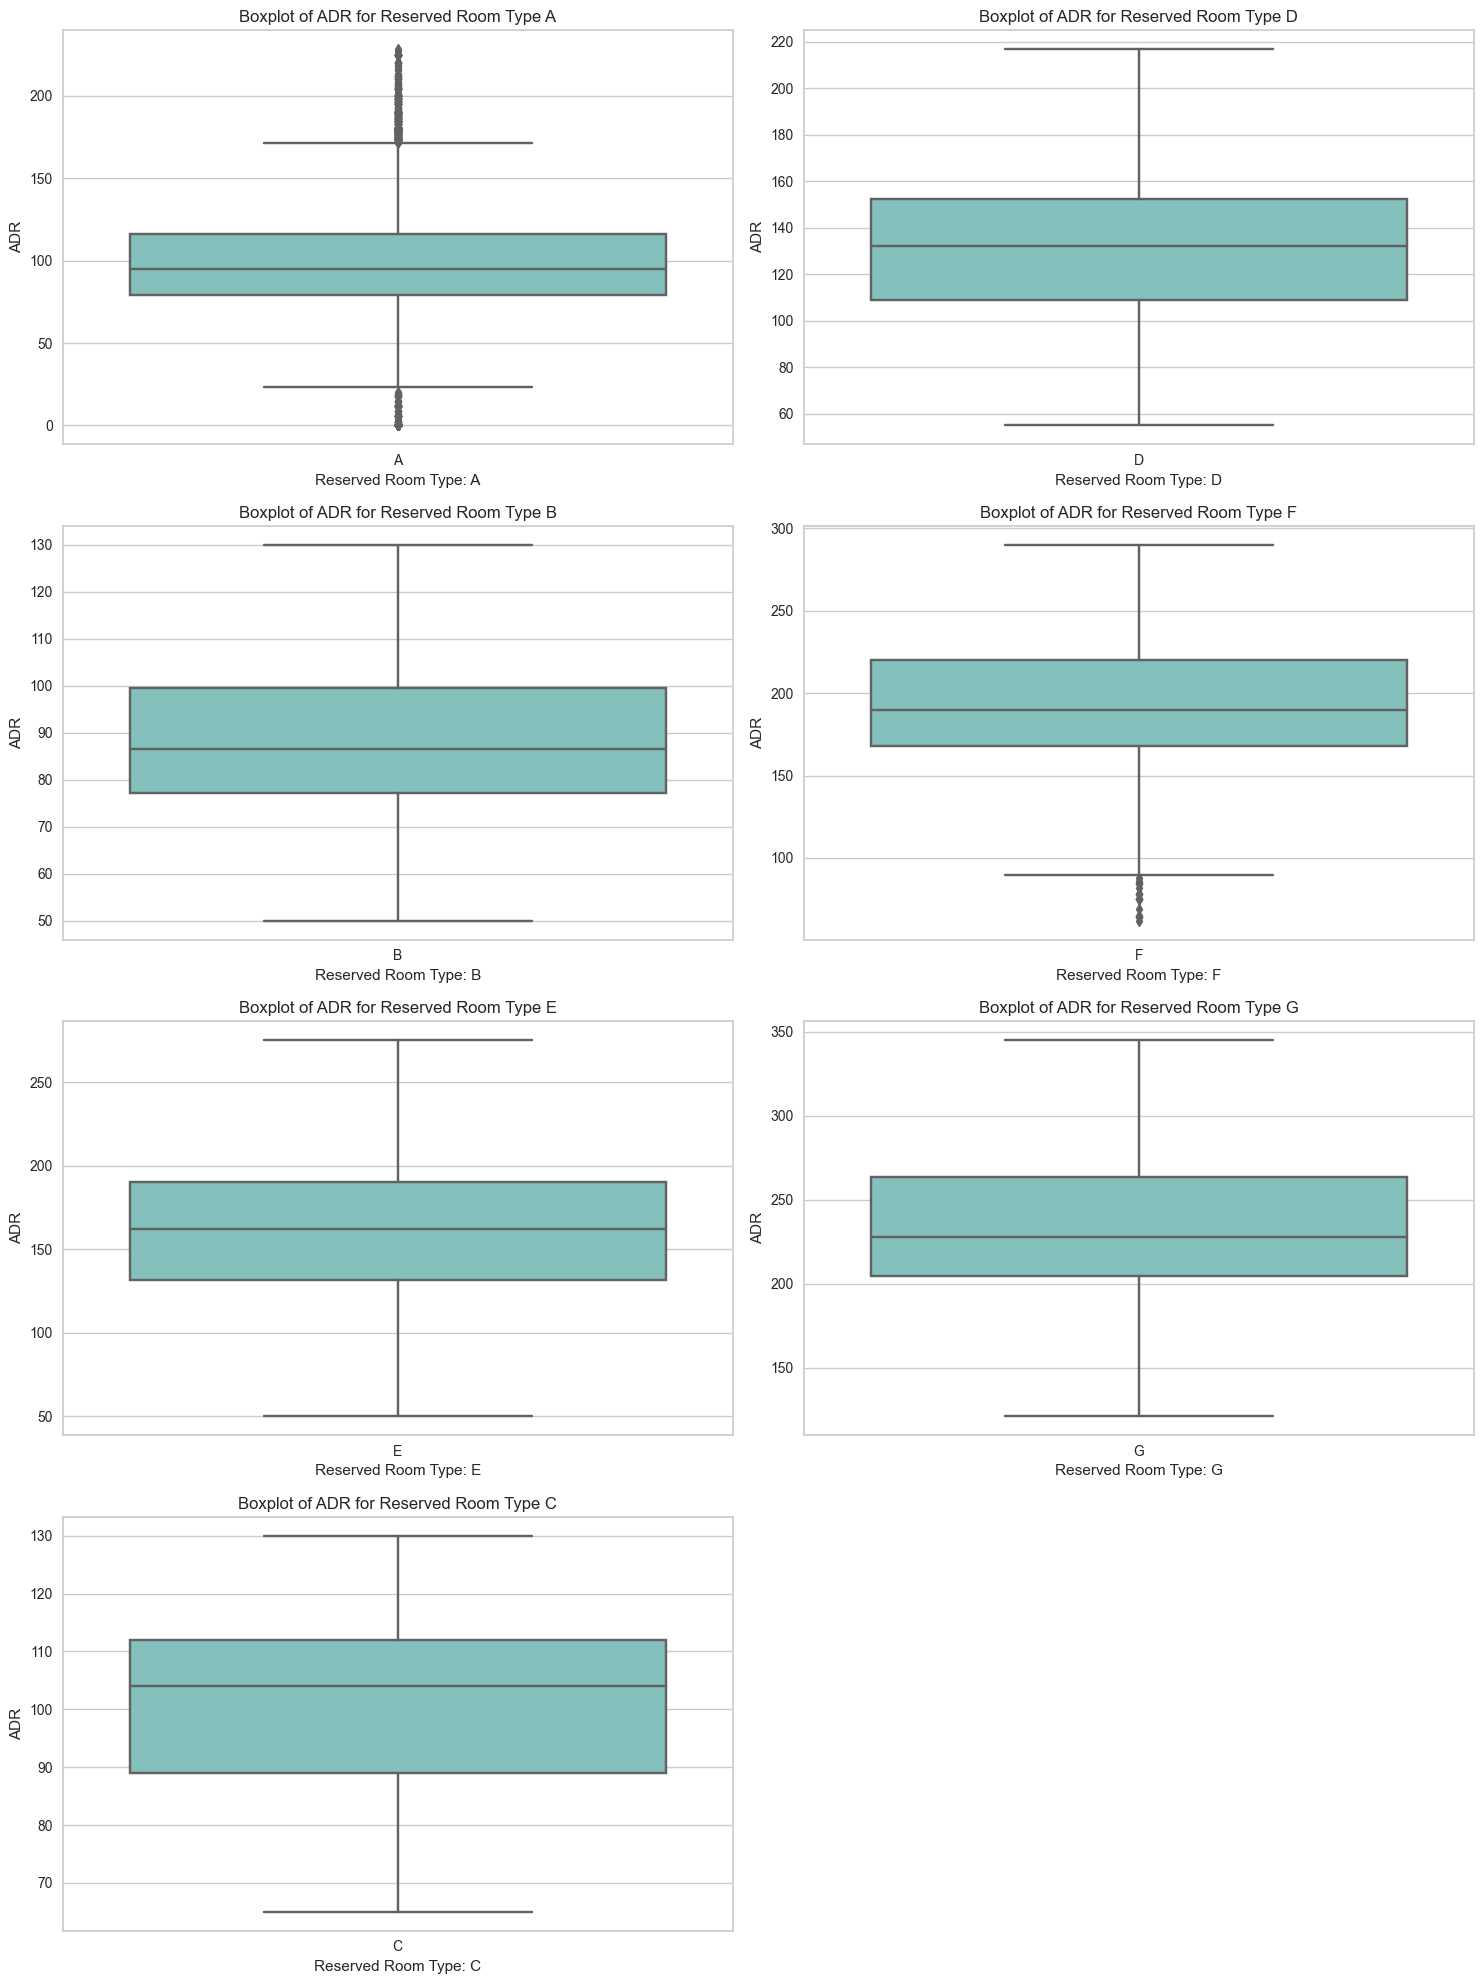

In [120]:
df_out_filtered= df_out[filter_md]

room_types = df_out_filtered["ReservedRoomType"].unique().tolist()
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

for i, room_type in enumerate(room_types):
    row = i // num_cols
    col = i % num_cols
    
    # Filter the dataframe by AssignedRoomType
    df_filtered = df_out_filtered[df_out_filtered["ReservedRoomType"] == room_type]
    
    sns.boxplot(x=df_filtered["ReservedRoomType"], y=df_filtered['ADR'], ax=axes[row, col], palette=color_palette)
    axes[row, col].set_xlabel("Reserved Room Type: " + room_type)
    axes[row, col].set_ylabel("ADR")
    axes[row, col].set_title("Boxplot of ADR for Reserved Room Type " + room_type)

# Remove empty subplots if necessary
if len(room_types) < num_rows * num_cols:
    for i in range(len(room_types), num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

**IQR Method**

In [121]:
q25 = df_out[metric_features].quantile(.25)
q75 = df_out[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filter_iqr = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filter_iqr.append(df_out[metric].between(llim, ulim, inclusive='both'))

filter_iqr = pd.Series(np.all(filter_iqr, 0),index=df.index)

df_filter_iqr = df_out[filter_iqr]
print('Percentage of data kept after removing outliers:', np.round(df_filter_iqr.shape[0] / df_out.shape[0] * 100, 2), '%')

Percentage of data kept after removing outliers: 49.66 %


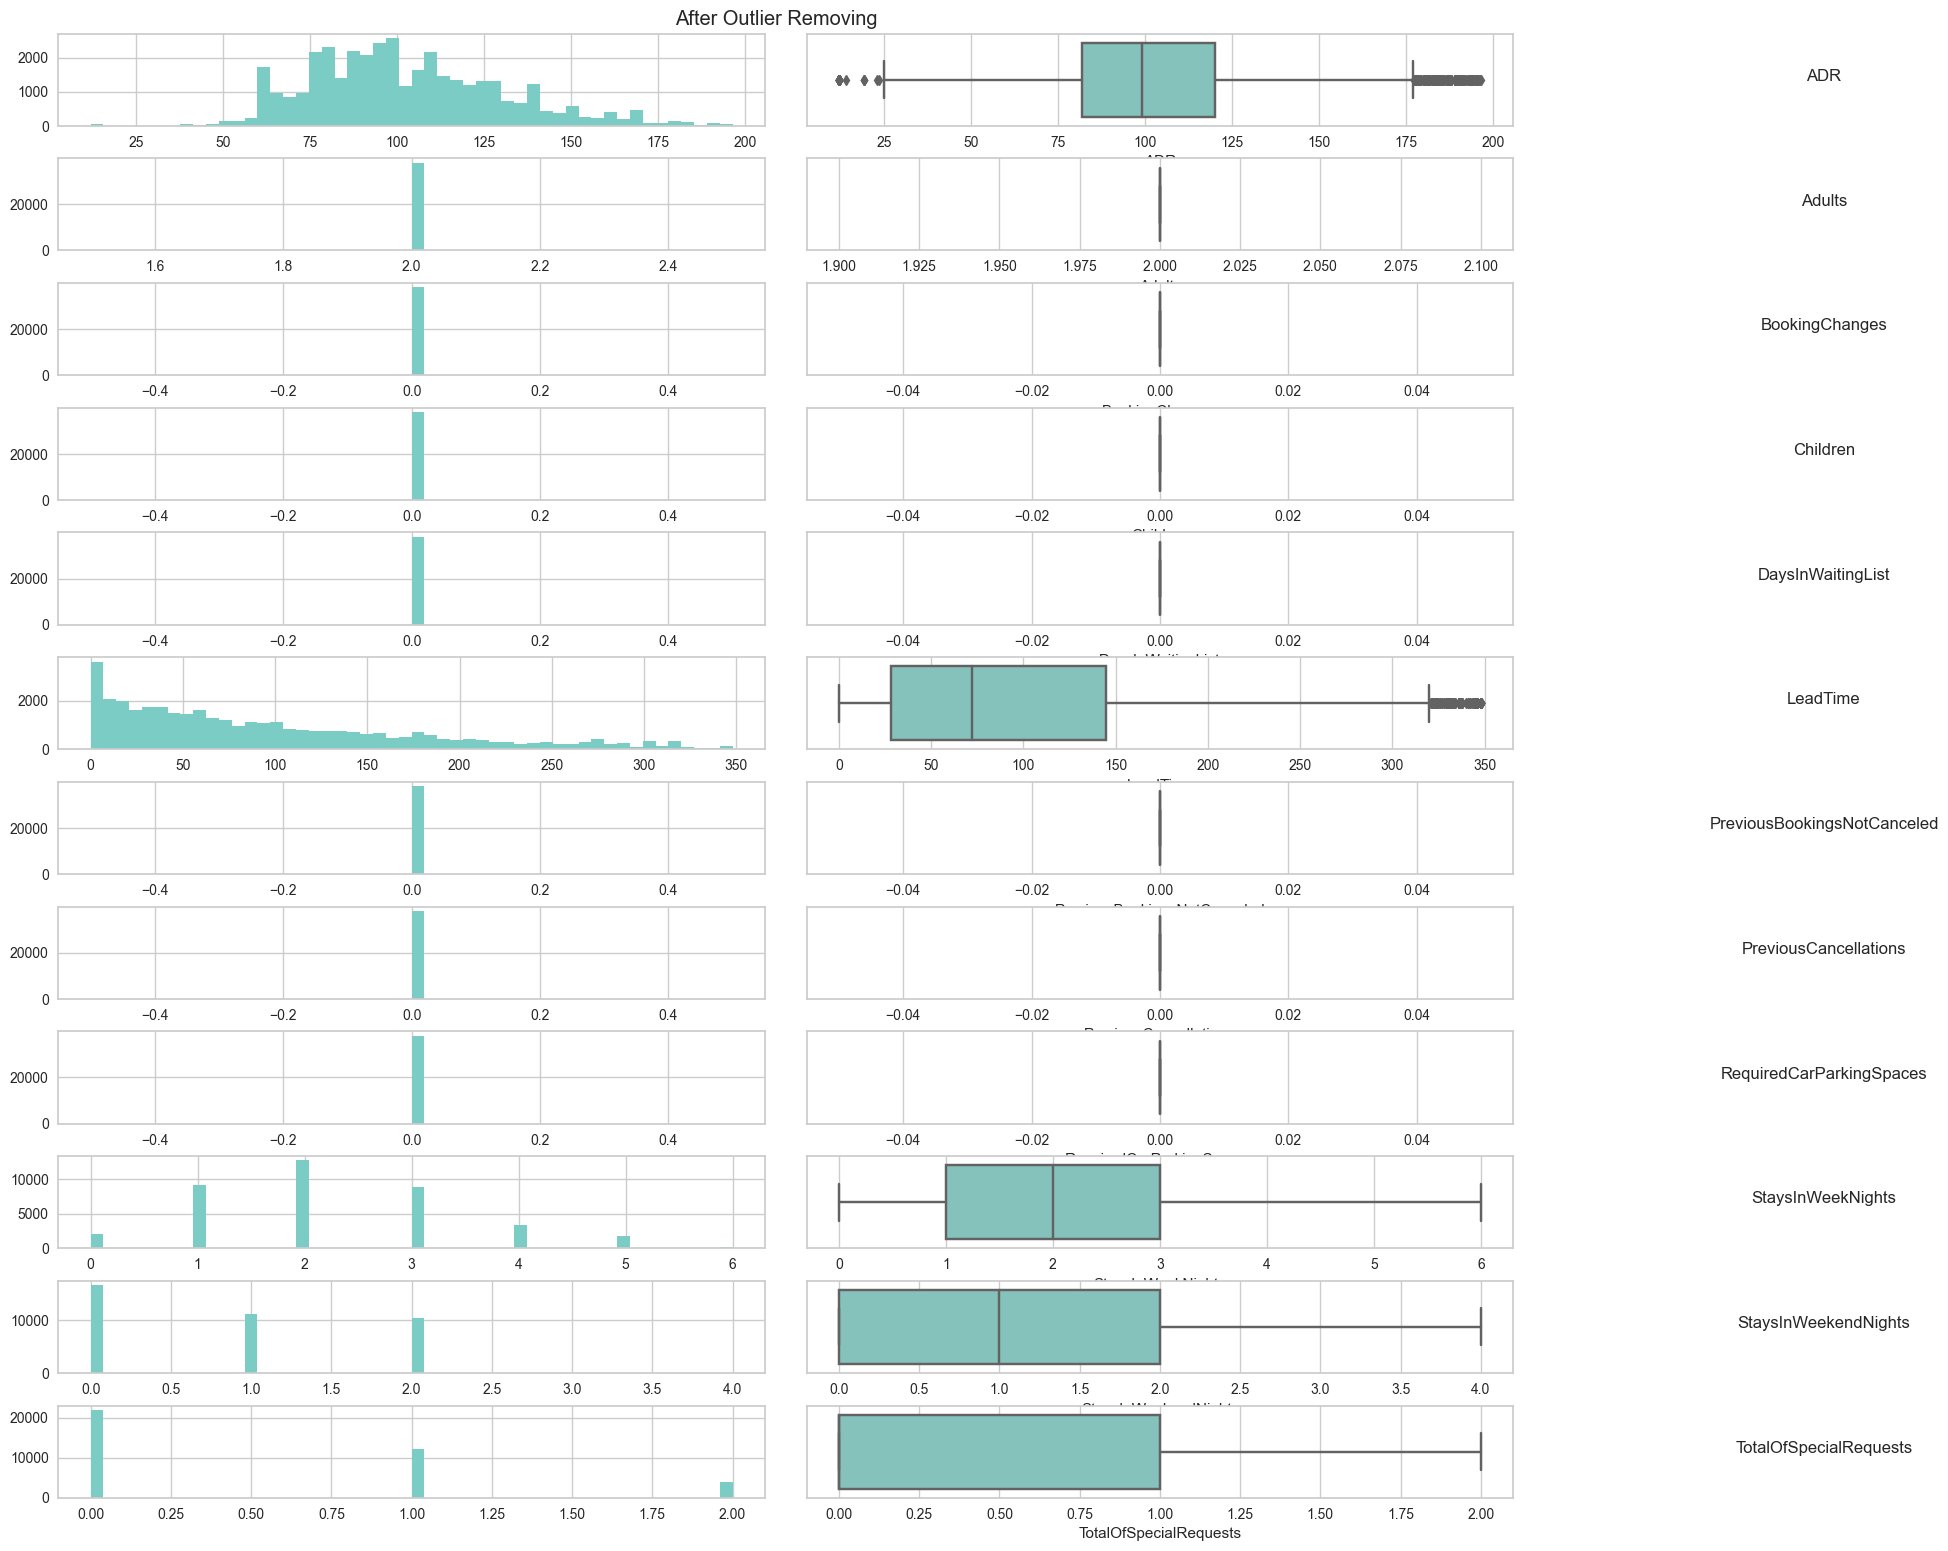

In [122]:
hist_box_maker((df_out[filter_iqr])[metric_features],"After Outlier Removing",15,15)

**Combination of Manual Detection and IQR**

In [123]:
#Checking if the combination of both Manual Detection and IQR method provide a more robust outlier detection 
#technique
filter_combo = (filter_md | filter_iqr)
df_filter_combo = df_out[filter_combo]
print('Percentage of data kept after removing outliers:',np.round(df_filter_combo.shape[0] /df_out.shape[0] * 100, 2), '%')

Percentage of data kept after removing outliers: 89.54 %


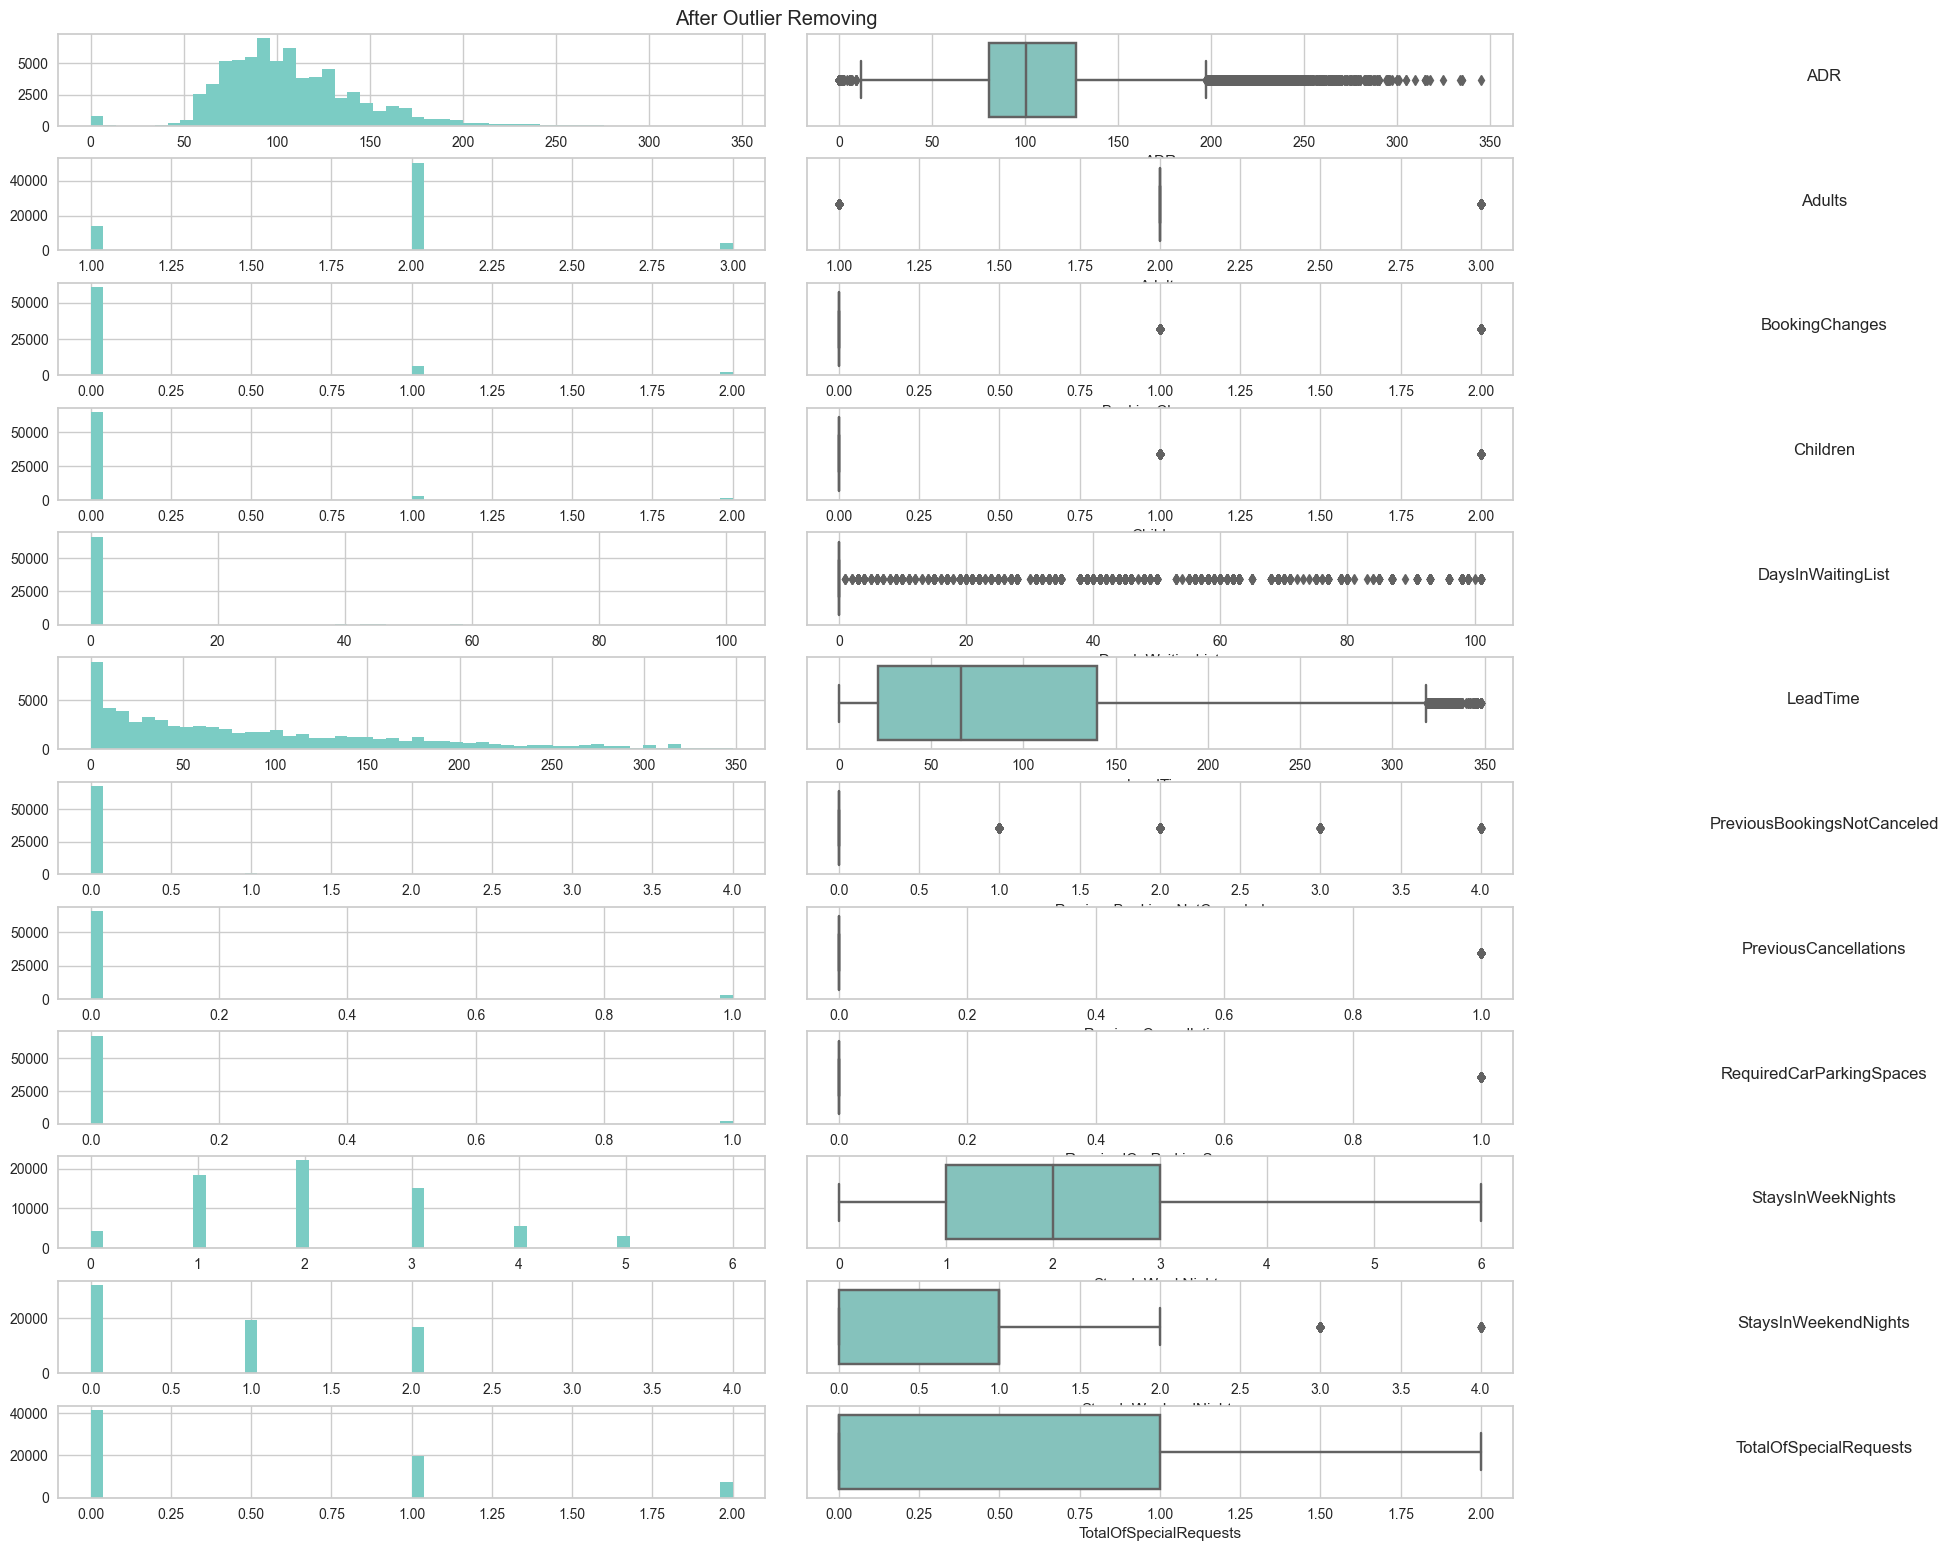

In [124]:
hist_box_maker((df_out[filter_combo])[metric_features],"After Outlier Removing",15,15)

**DBSCAN**

In [125]:
df_db = df_out.copy()

In [126]:
# Using MinMaxScaler to scale the data
scaler_db = MinMaxScaler()
scaled_feat_db = scaler_db.fit_transform(df_db[metric_features])
df_db[metric_features] = scaled_feat_db

In [127]:
NN = NearestNeighbors(n_neighbors = (2*len(metric_features)) - 1)
near_neigh = NN.fit(df_db[metric_features])
distances, indices = near_neigh.kneighbors(df_db[metric_features])

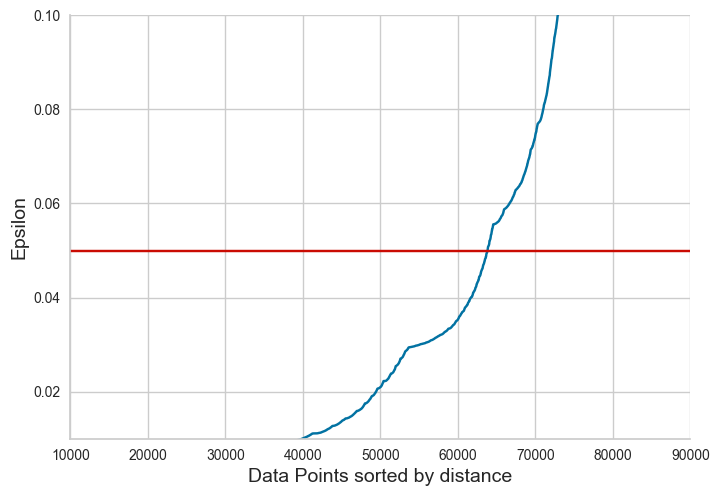

In [128]:
# Searching for the value of epsilon
distances = np.sort(distances, axis = 0)
distances = distances[:,-1]
plt.plot(distances)
plt.ylabel('Epsilon',fontsize=14)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.xlim([10000, 90000])
plt.ylim([0.01, 0.1])
plt.axhline(y=0.05, color='r', linestyle='-')
sns.set_style('white')
sns.despine()
plt.show()

In [129]:
dbscan = DBSCAN(eps = 0.045, min_samples = 2*len(metric_features))
pred = dbscan.fit_predict(df_db[metric_features])
anom_index = np.where(pred == -1)
df_db.reset_index(inplace=True,drop=True)
df_db.drop(anom_index[0], inplace=True)
df_db[metric_features] = scaler_db.inverse_transform(df_db[metric_features])
print('Percentage of data kept after removing outliers:', np.round(df_db.shape[0] / df_out.shape[0] * 100, 2), '%')

Percentage of data kept after removing outliers: 85.49 %


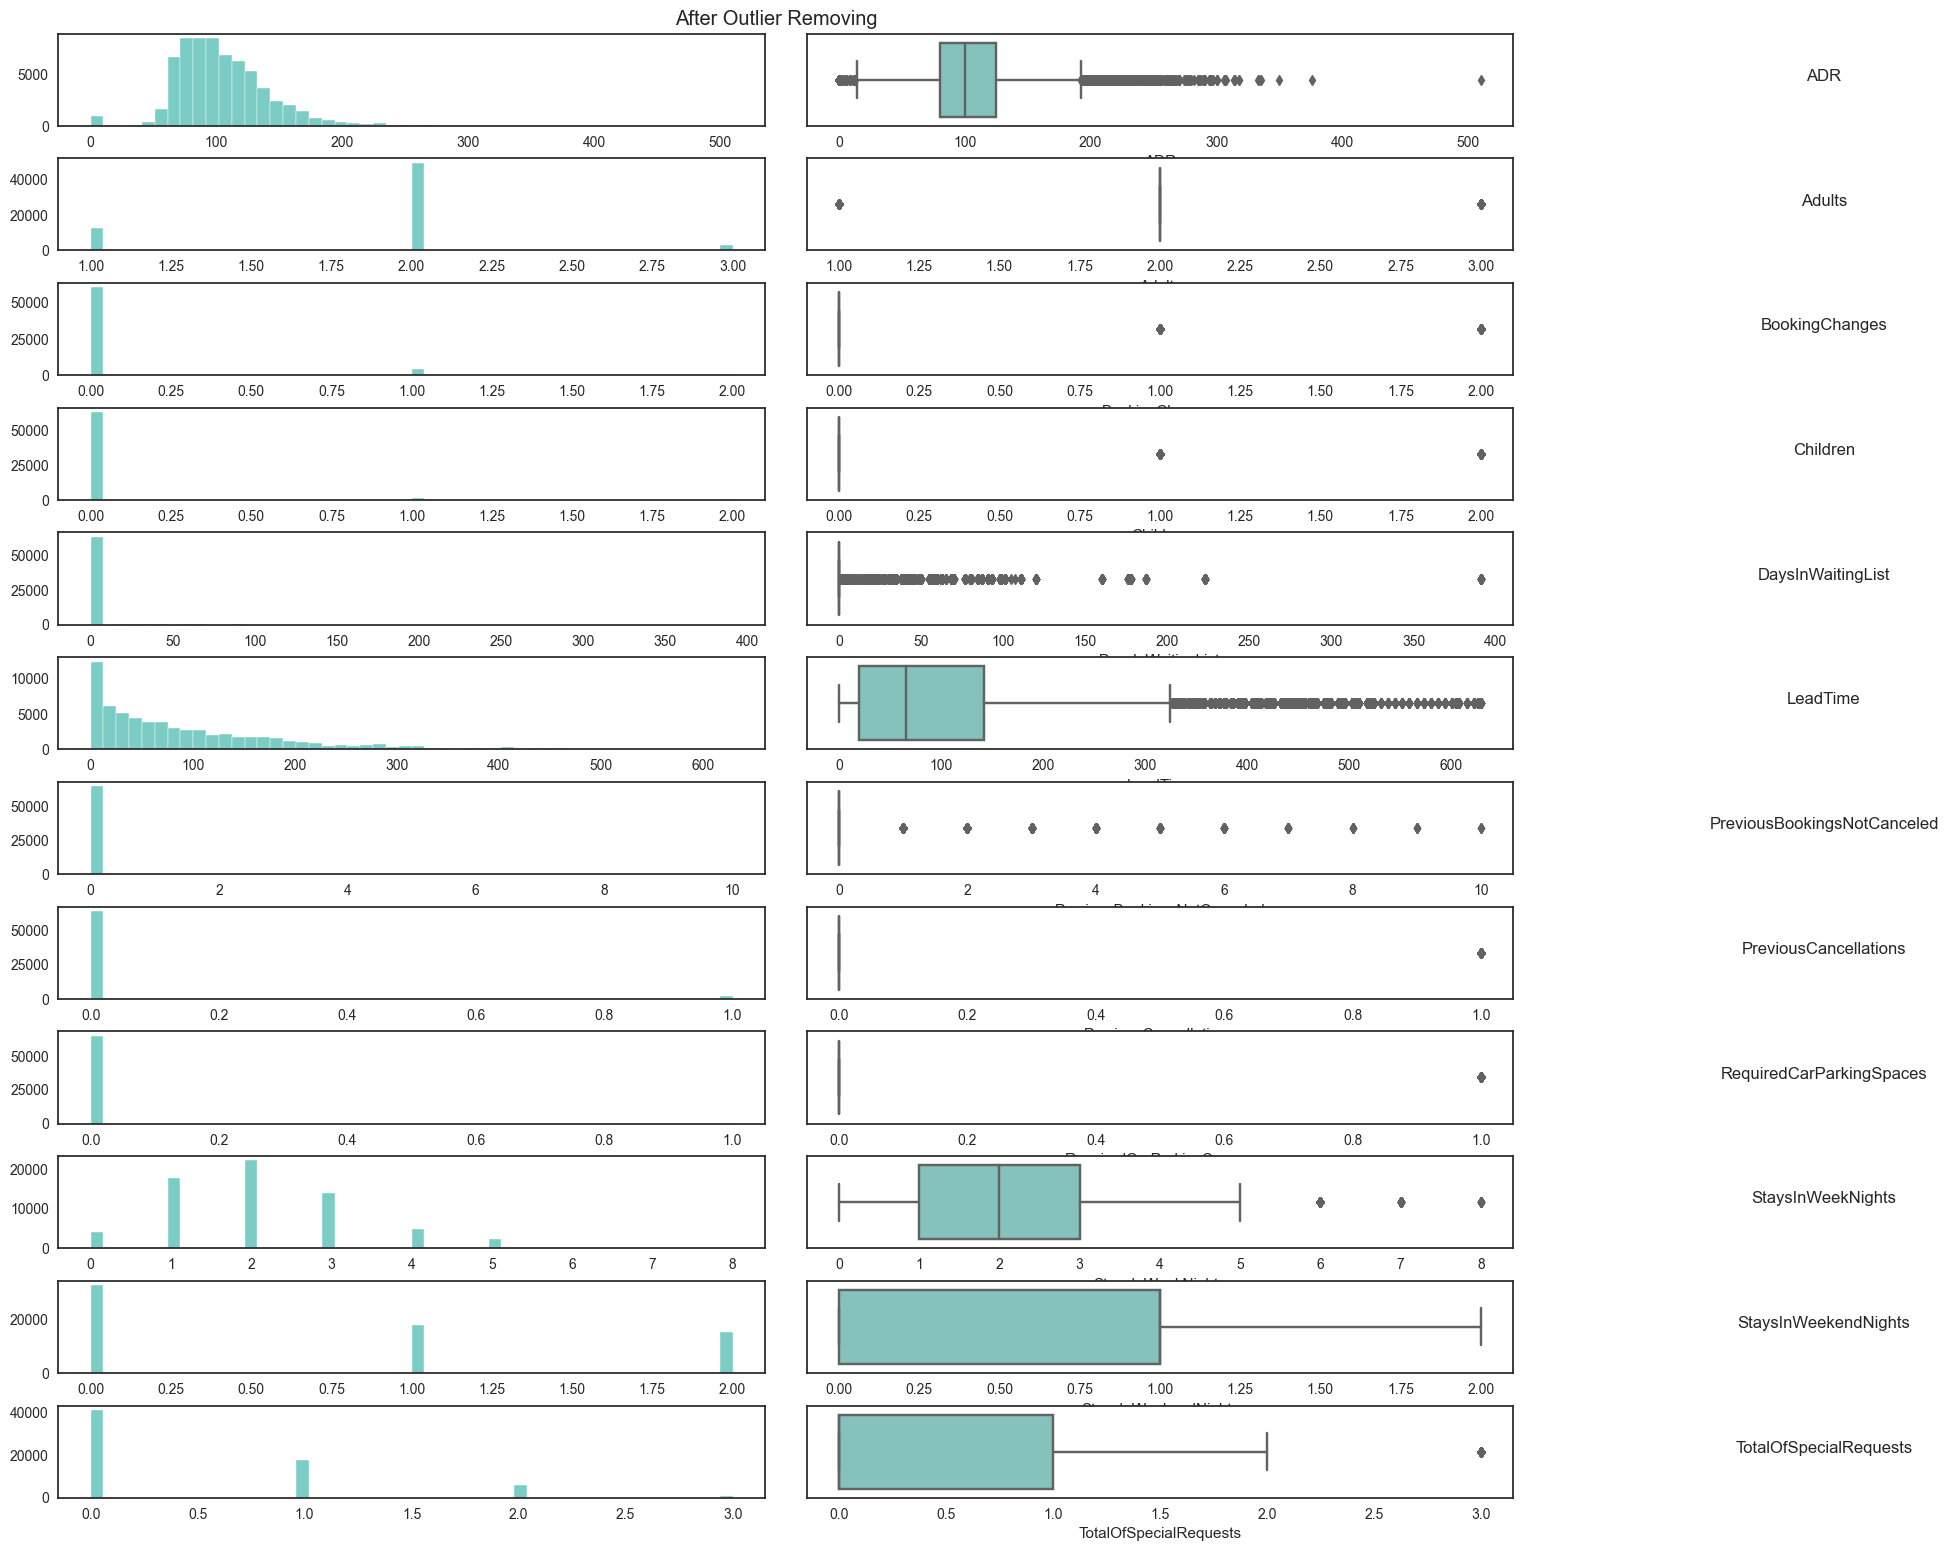

In [130]:
hist_box_maker(df_db[metric_features],"After Outlier Removing",15,15)

**Isolation Forest**

In [131]:
def detect_outliers_iso(df):
    iso = IsolationForest(random_state=1, contamination='auto')
    preds = iso.fit_predict(df.values)
    data = pd.DataFrame()
    data['cluster'] = preds
    print(data['cluster'].value_counts().sort_values(ascending=False))
    return preds

In [132]:
filter_iso = detect_outliers_iso(df_out[metric_features])

print('Percentage of data kept after removing outliers:', np.round((df_out[filter_iso == 1].shape[0]/ df_out.shape[0] * 100), 2), '%')

 1    71653
-1     4976
Name: cluster, dtype: int64
Percentage of data kept after removing outliers: 93.51 %


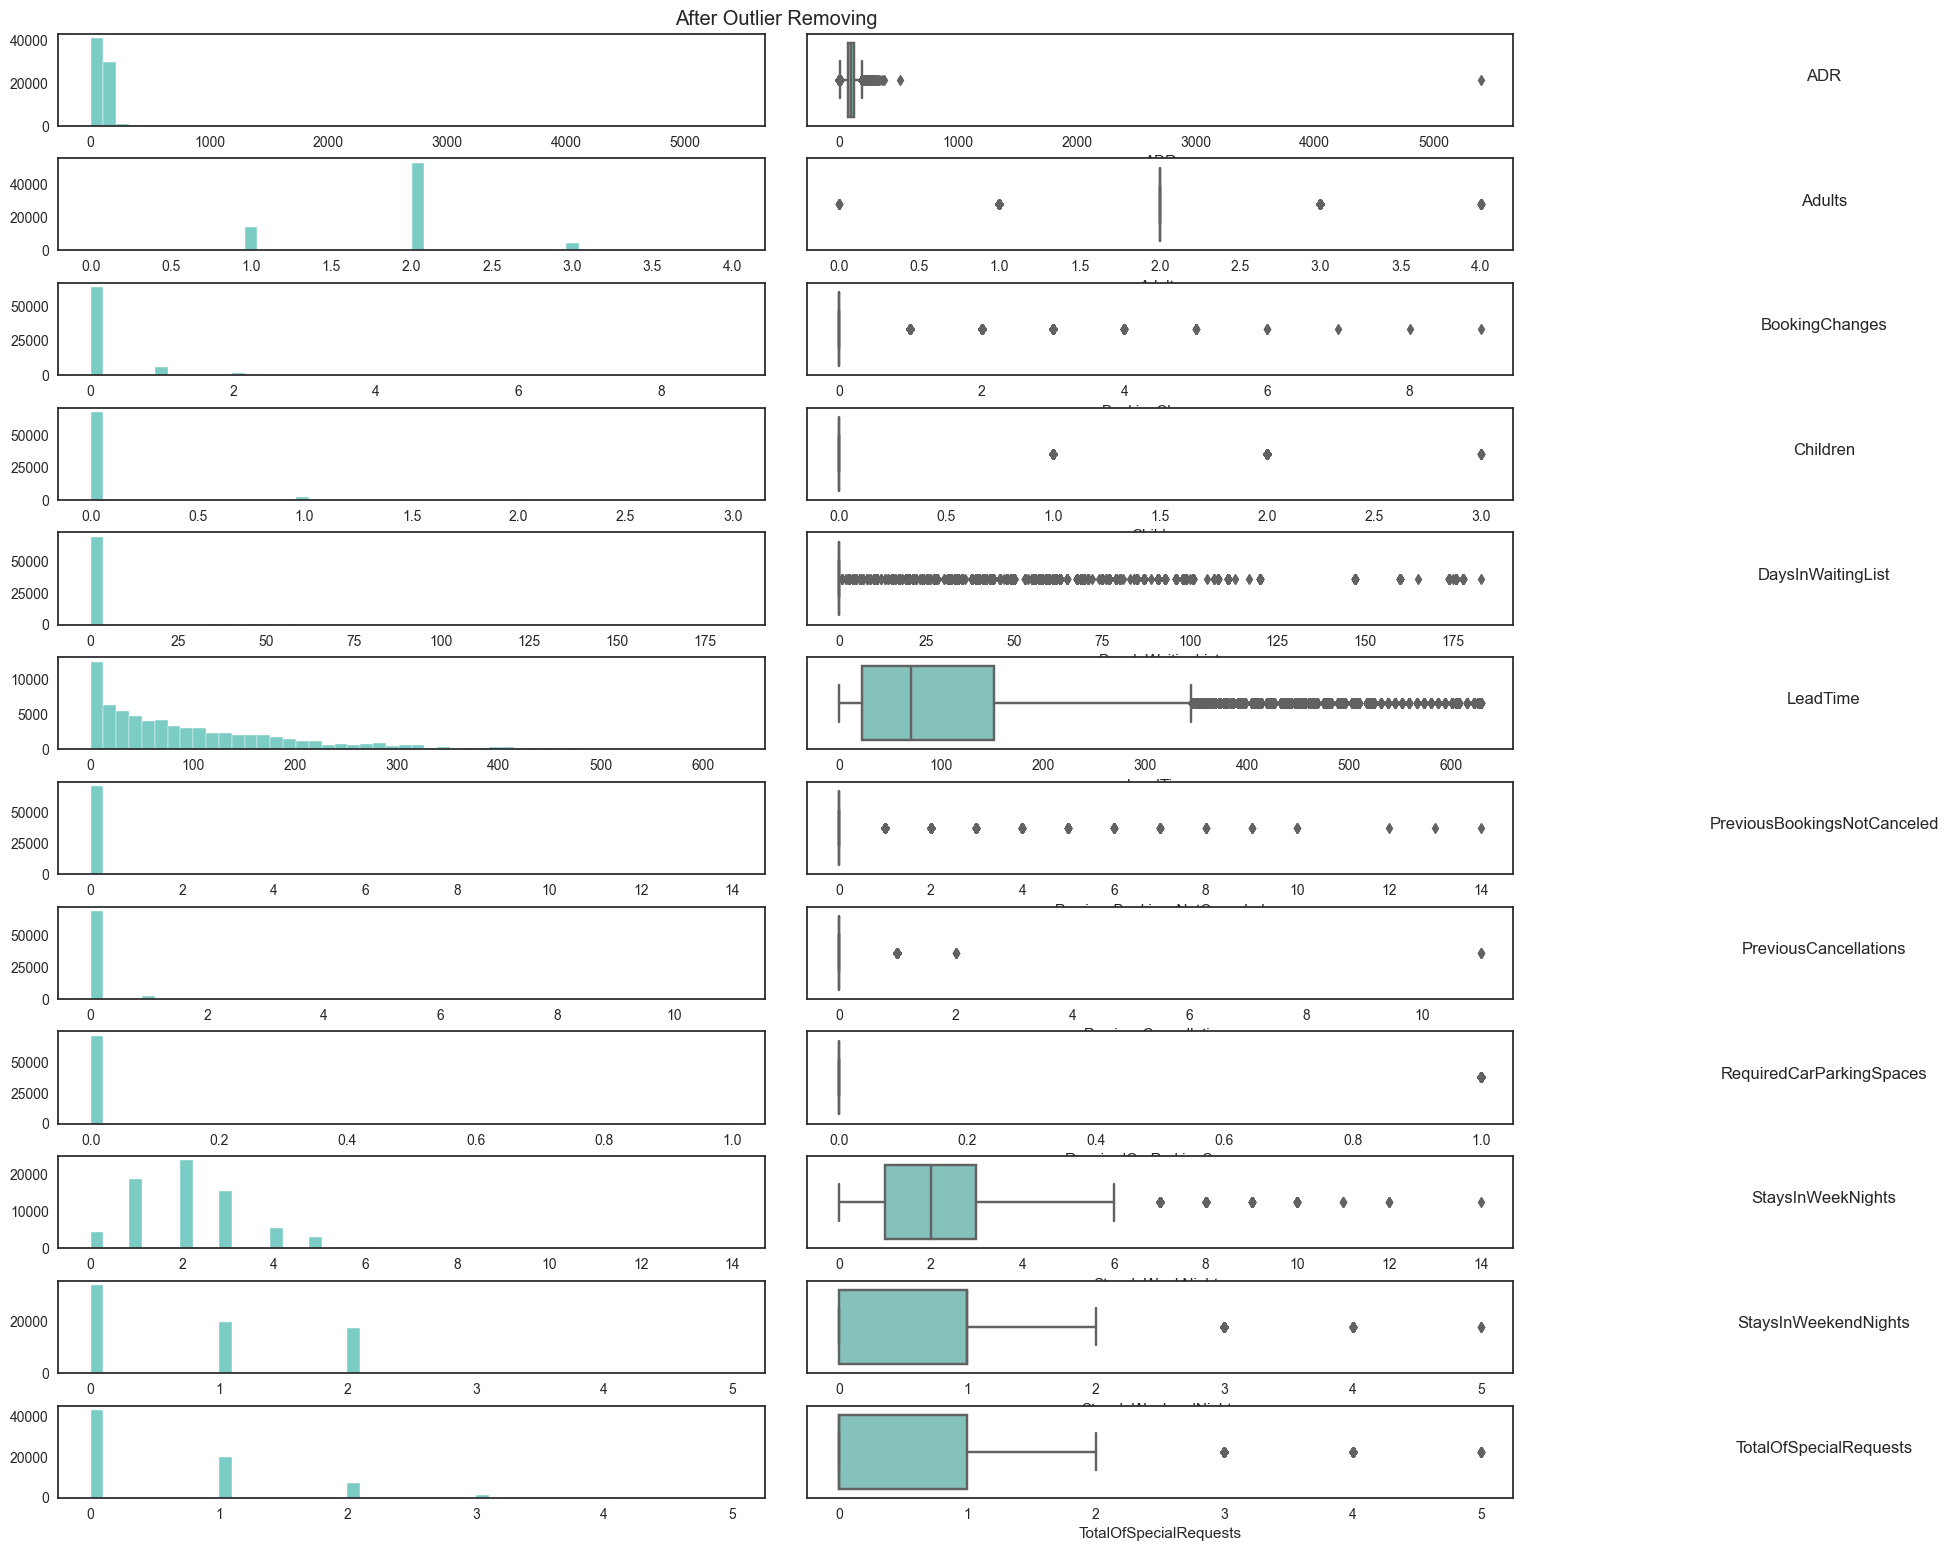

In [133]:
hist_box_maker((df_out[filter_iso==1])[metric_features],"After Outlier Removing",15,15)

In [134]:
#After using various outlier treatment methods based on the percentage of data retained and observation of 
#histograms and box plots, Manual Detection will be the first method applied to the models

#However, it will still be tested with all other methods to see if any benefit the final score

In [135]:
#Updating df

# This section was tested with and without in modelling and the use of it decreased the model's 
# accuracy by 2% do the inconsistency will not be filtered
#df_out=df_out[filter_md]

#df_out= df_out[filter_iso==1]

df_out= df_db.copy()
df=df_out

<a class="anchor" id="subtitle5.6">
    
## 5.6 Merge Hotel Data with External Data 
    
</a>

In [136]:
metric_features_merge=metric_features.copy()
non_metric_features_merge = non_metric_features.copy()

**Weather in Lisbon**

In [137]:
#Merge the hotel data with the weather 
merged_df = pd.merge(df, weather_lisbon, how='left', left_on='ArrivalDate', right_on='Date')

#Drop the Date column 
merged_df.drop('Date',axis=1,inplace=True)
metric_features_merge.extend(['tmin','tmax'])

**Inflation**

In [138]:
#Merge the hotel data with inflation
merged_df=pd.merge(merged_df, inflation, how='left',left_on='Country',right_on='Country Code')

#Drop the column Country Code 
merged_df.drop('Country Code', axis=1, inplace=True)

#Create a column called 'Inflation'
gdp_columns = {
    2015: 'Inflation 2015',
    2016: 'Inflation 2016',
    2017: 'Inflation 2017'
}

# use loc to set the value of 'GDP' based on the value of 'ArrivalDateYear'
merged_df.loc[:, 'Inflation'] = merged_df.apply(
    lambda x: x[gdp_columns[x['ArrivalDateYear']]] if x['ArrivalDateYear'] in gdp_columns else None, axis=1)

#Drop the columns 'GDP per capita 2015', 'GDP per capita 2016', 'GDP per capita 2017'

merged_df.drop(['Inflation 2015', 'Inflation 2016', 'Inflation 2017'],axis=1, inplace=True)
#Appending inflation to the previous merged dataset
metric_features_merge.append('Inflation')

**GDP per Capita**

In [139]:
#Merge the hotel data with gdp_per_capita  
merged_df=pd.merge(merged_df, gdp_per_capita, how='left',left_on='Country',right_on='Country Code')

#Drop the column Country Code 
merged_df.drop('Country Code', axis=1, inplace=True)

#Create a column called 'GDP per capita '
gdp_columns = {
    2015: 'GDP per capita 2015',
    2016: 'GDP per capita 2016',
    2017: 'GDP per capita 2017'
}

# use loc to set the value of 'GDP' based on the value of 'ArrivalDateYear'
merged_df.loc[:, 'GDP per capita'] = merged_df.apply(
    lambda x: x[gdp_columns[x['ArrivalDateYear']]] if x['ArrivalDateYear'] in gdp_columns else None, axis=1)

#Drop the columns 'GDP per capita 2015', 'GDP per capita 2016', 'GDP per capita 2017'

merged_df.drop(['GDP per capita 2015', 'GDP per capita 2016', 'GDP per capita 2017'],axis=1, inplace=True)
#Appending GDP per capita to the previous merged dataset
metric_features_merge.append('GDP per capita')

**ADR in Lisbon**

In [140]:
#Merge the hotel data with ADR
merged_df=pd.merge(merged_df, adr_lisbon, how='left',left_on='ArrivalDateYear',right_on='Year')
#Drop the Date column 
merged_df.drop('Year',axis=1,inplace=True)

**Events**

In [141]:
# mapping holidays that are not weekends to days
days_of_events=[]
events_names=[]

# For each event create a list days_of_events with dates between Beggining Date and End Date, 
# and add to events names list event name.
for index,row in events.iterrows():
    dates= pd.date_range(start=row['Beggining Date'], end=row['End Date']).date
    days_of_events.extend(pd.to_datetime(dates))
    events_names.extend([row['Event Name']]*len(dates))
    
#Create a dataframe with the days_of_events, isEvent with 1 as values and Event Name with events_names
events_to_merge= pd.DataFrame(data={
    "Date":days_of_events,
    "IsEvent":[1]*len(days_of_events),
    "Event Name":events_names
}).sort_values('Date',ascending=True)
events_to_merge.head()

Date  IsEvent                  Event Name
77 2015-03-22        1   2015 Half Marathin Lisbon
60 2015-07-09        1              Nos Alive 2015
61 2015-07-10        1              Nos Alive 2015
62 2015-07-11        1              Nos Alive 2015
19 2015-07-16        1  Super Bock Super Rock 2015

In [142]:
#Merge the hotel data with Events and fill the non corresponding rows with 0 on isEvent and 'No Event' in Event Name.

merged_df=pd.merge(merged_df, events_to_merge, how='left',left_on='ArrivalDate',right_on='Date')
merged_df['IsEvent'].fillna(0,inplace=True)
merged_df['Event Name'].fillna("No Event",inplace=True)
merged_df.drop('Date',axis=1,inplace=True)
non_metric_features_merge.extend(['IsEvent','Event Name'])

In [143]:
#Check the merged_df columns
merged_df.columns

#Delete one of the Country Name columns
merged_df.drop('Country Name_x',axis=1, inplace=True)

#Rename the column Country Name_y to Country Name 
merged_df.rename(columns={"Country Name_y": "Country Name"},inplace=True)

In [144]:
merged_df.head(5)

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
0           0       6.0             2015             July   
1           1      88.0             2015             July   
2           1      65.0             2015             July   
3           1      92.0             2015             July   
4           1     100.0             2015             July   

   ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
0                     27                      1                   0.0   
1                     27                      1                   0.0   
2                     27                      1                   0.0   
3                     27                      1                   2.0   
4                     27                      2                   0.0   

   StaysInWeekNights  Adults  Children  ... ReservationStatusDate ArrivalDate  \
0                2.0     1.0       0.0  ...            2015-07-03  2015-07-01   
1                4.0     2.0       0.0  ...            2015-07-01  2015-07-01   
2                4.0     1.0       0.0  ...            2015-04-30  2015-07-01   
3                4.0     2.0       0.0  ...            2015-06-23  2015-07-01   
4                2.0     2.0       0.0  ...            2015-04-02  2015-07-02   

   tmin  tmax  Inflation  Country Name  GDP per capita ADR Lisbon IsEvent  \
0  17.6  25.4   0.487939      Portugal     19250.10654         91     0.0   
1  17.6  25.4        NaN           NaN             NaN         91     0.0   
2  17.6  25.4        NaN           NaN             NaN         91     0.0   
3  17.6  25.4        NaN           NaN             NaN         91     0.0   
4  16.2  23.9        NaN           NaN             NaN         91     0.0   

   Event Name  
0    No Event  
1    No Event  
2    No Event  
3    No Event  
4    No Event  

[5 rows x 38 columns]

In [145]:
df= merged_df.copy()
metric_features=metric_features_merge.copy()
non_metric_features=non_metric_features_merge.copy()

<hr>
<a class="anchor" id="subtitle5.7">
    
## 5.7. Feature Engineering
    
</a>

In [146]:
# Create a copy of df
df_fe = df.copy()

In [147]:
metric_features_fe=metric_features.copy()
non_metric_features_fe = non_metric_features.copy()

**Total Guests**

Sum of the number of adults and any additional guests included in the reservation

In [148]:
df_fe["TotalGuests"] = df_fe["Adults"] + df_fe["Children"]
metric_features_fe.append('TotalGuests')

**ADR Normalized**

In [149]:
# Calculate the third quartile ADR for each combination of distribution channel, reserved room type, and expected week/year of arrival
third_quartile_ADR = df_fe.groupby(['DistributionChannel', 'ReservedRoomType', 
                                    'ArrivalDateWeekNumber', 'ArrivalDateYear'])['ADR'].quantile(0.75)

# Merge the third quartile ADR values back into the original DataFrame
df_fe = df_fe.merge(third_quartile_ADR, on=['DistributionChannel', 'ReservedRoomType', 
                                                  'ArrivalDateWeekNumber','ArrivalDateYear'], suffixes=['', '_normalized'])

# Calculate the ADRThirdQuartileDeviation by dividing the ADR of each booking by the third quartile ADR
df_fe['ADR_normalized'] = df_fe['ADR'] / df_fe['ADR_normalized']
df_fe['ADR_normalized'].fillna(0,inplace=True)
metric_features_fe.append('ADR_normalized')

**Total Nights**

Sum of the number of nights the guest stayed at the hotel

In [150]:
df_fe['TotalNights'] = df_fe['StaysInWeekendNights'] + df_fe['StaysInWeekNights']
metric_features_fe.append('TotalNights')

**Total Revenue**

Total price paid for accommodation

In [151]:
df_fe['TotalRevenue'] = df_fe['ADR']*df_fe['TotalNights']
metric_features_fe.append('TotalRevenue')

**Total Revenue Normalized**

Total price paid for accommodation normalized.

In [152]:
df_fe['TotalRevenue_normalized'] = df_fe['ADR_normalized']*df_fe['TotalNights']
metric_features_fe.append('TotalRevenue_normalized')

**SpecialRequestRatio**

Average number of special requests made by the customer per night of stay

In [153]:
# Talvez faça sentido fazer por night e por guest???

df_fe['DailySpecialRequest'] = df_fe['TotalOfSpecialRequests'] / df_fe['TotalNights']
# For rows with no total nights, the ratio is replaced by the original number of special requests
df_fe.loc[df_fe['DailySpecialRequest'].isna(),'DailySpecialRequest']=df_fe['TotalOfSpecialRequests']
metric_features_fe.append('DailySpecialRequest')

**RoomTypeDiscrepancy**

Comparing the values of AssignedRoomType and ReservedRoomType to identify if there are any discrepancies between the room type reserved and the room type assigned

In [154]:
df_fe['RoomTypeDiscrepancy'] = (df_fe['AssignedRoomType'] != df_fe['ReservedRoomType']).astype(int)
non_metric_features_fe.append('RoomTypeDiscrepancy')

**HasPreviousStays**

Binary Variable that is 1 if client has already stayed in the hotel.

In [155]:
df_fe['HasPreviousStays'] = (df_fe['PreviousBookingsNotCanceled']>0).astype(int)
non_metric_features_fe.append('HasPreviousStays')

**PreviousCancellationsRatio**

Ratio of previous bookings that were cancelled by the customer

In [156]:
df_fe['TotalPreviousBookings'] = df_fe['PreviousBookingsNotCanceled']+df_fe['PreviousCancellations']
df_fe['PreviousCancellationsRatio'] = df_fe['PreviousCancellations'] / df_fe['TotalPreviousBookings']
# When 0/0 it returns NaN, so it will be replaced by 0
df_fe['PreviousCancellationsRatio'].fillna(0,inplace=True)
metric_features_fe.append('TotalPreviousBookings')
metric_features_fe.append('PreviousCancellationsRatio')

**Customer Segment**

Creating Customer Segment based on the people in reservation

In [157]:
df_fe.loc[(df_fe['Adults'] == 0) & (df_fe['Children'] > 0), 'CustomerSegment'] = 'Underaged'
df_fe.loc[(df_fe['Adults'] == 1) & (df_fe['Children'] == 0), 'CustomerSegment'] = 'Solo'
df_fe.loc[(df_fe['Adults'] == 2) & (df_fe['Children'] == 0) , 'CustomerSegment'] = 'Couple'
df_fe.loc[(df_fe['Adults'] >= 2) & (df_fe['Children'] > 0), 'CustomerSegment'] = 'Family'
df_fe.loc[df_fe['Adults'] > 2, 'CustomerSegment'] = 'Groups'
df_fe['CustomerSegment'].fillna('Others', inplace=True)
non_metric_features_fe.append('CustomerSegment')

In [158]:
# Grouped DistributionChannel distribution
df_fe['CustomerSegment'].value_counts(normalize=True)

Couple    0.720272
Solo      0.195671
Groups    0.049537
Family    0.034519
Name: CustomerSegment, dtype: float64

**Customer Segment Grouped**

Grouping related segments and segments with few reservations

In [159]:
# Checking the category's balance in order to evaluate categories
df_fe['CustomerSegment'].value_counts(normalize=True)

#The categories with less than 9% of values in the dataset are grouped.

Couple    0.720272
Solo      0.195671
Groups    0.049537
Family    0.034519
Name: CustomerSegment, dtype: float64

In [160]:
df_fe['CustomerSegment_grouped']=groupCategorical(df_fe['CustomerSegment'])
non_metric_features_fe.append('CustomerSegment_grouped')

In [161]:
# Grouped Market Segment distribution
df_fe['CustomerSegment_grouped'].value_counts(normalize=True)

Couple    0.720272
Solo      0.195671
Others    0.084057
Name: CustomerSegment_grouped, dtype: float64

**Market Segment Grouped**

Grouping related segments and segments with few reservations

In [162]:
# Checking the category's balance in order to evaluate categories
df_fe['MarketSegment'].value_counts(normalize=True)

#The categories with less than 9% of values in the dataset are grouped.

Online TA        0.489976
Offline TA/TO    0.224430
Groups           0.167080
Direct           0.073325
Corporate        0.036663
Complementary    0.005533
Aviation         0.002994
Name: MarketSegment, dtype: float64

In [163]:
df_fe['MarketSegment_grouped']=groupCategorical(df_fe['MarketSegment'])
non_metric_features_fe.append('MarketSegment_grouped')

In [164]:
# Grouped Market Segment distribution
df_fe['MarketSegment_grouped'].value_counts(normalize=True)

Online TA        0.489976
Offline TA/TO    0.224430
Groups           0.167080
Others           0.118515
Name: MarketSegment_grouped, dtype: float64

**Distribution Channel Grouped**

Grouping the distribution channel to balance the distribution

In [165]:
# Checking the category's balance in order to evaluate categories
df_fe['DistributionChannel'].value_counts(normalize=True)
#The categories with less than 9% of values in the dataset are grouped.

TA/TO        0.874310
Direct       0.081564
Corporate    0.041268
GDS          0.002858
Name: DistributionChannel, dtype: float64

In [166]:
df_fe['DistributionChannel_grouped']=groupCategorical(df_fe['DistributionChannel'])
non_metric_features_fe.append('DistributionChannel_grouped')

In [167]:
# Grouped DistributionChannel distribution
df_fe['DistributionChannel_grouped'].value_counts(normalize=True)

TA/TO     0.87431
Others    0.12569
Name: DistributionChannel_grouped, dtype: float64

**Customer Type Grouped**

Grouping the customer type to balance the distribution

In [168]:
# Checking the category's balance in order to evaluate categories
df_fe['CustomerType'].value_counts(normalize=True)
#The categories with less than 21% of values in the dataset are grouped.

Transient          0.771193
Transient-Party    0.206296
Contract           0.019000
Group              0.003511
Name: CustomerType, dtype: float64

In [169]:
df_fe['CustomerType_grouped']=groupCategorical(df_fe['CustomerType'],threshold=0.21)
non_metric_features_fe.append('CustomerType_grouped')

In [170]:
# Grouped DistributionChannel distribution
df_fe['CustomerType_grouped'].value_counts(normalize=True)

Transient    0.771193
Others       0.228807
Name: CustomerType_grouped, dtype: float64

**Agent Grouped**

Grouping the agents to balance the distribution

In [171]:
# Checking the category's balance in order to evaluate categories
df_fe['Agent'].value_counts(normalize=True)
#The categories with less than 9% of values in the dataset are grouped.

9                 0.400796
Not Applicable    0.103270
1                 0.070392
7                 0.046619
14                0.042652
                    ...   
267               0.000015
242               0.000015
216               0.000015
416               0.000015
397               0.000015
Name: Agent, Length: 215, dtype: float64

In [172]:
#Checking percentage of canceled in the top 3 categories
df_fe.groupby('Agent')['IsCanceled'].mean()[['9','Not Applicable','1']]
# The category 1 has many cancellation. With that, it's possible to conclude that it is an OTA

Agent
9                 0.423999
Not Applicable    0.355902
1                 0.652343
Name: IsCanceled, dtype: float64

In [173]:
df_fe['Agent_grouped']=groupCategorical(df_fe['Agent'])
non_metric_features_fe.append('Agent_grouped')

In [174]:
# Grouped Agent distribution
df_fe['Agent_grouped'].value_counts(normalize=True)

Others            0.495934
9                 0.400796
Not Applicable    0.103270
Name: Agent_grouped, dtype: float64

**ReservedRoomType Grouped**

Grouping ReservedRoomType to balance the distribution

In [175]:
# Checking the category's balance in order to evaluate categories
df_fe['ReservedRoomType'].value_counts(normalize=True)*100
#The categories with less than 9% of values in the dataset are grouped.

A    80.870662
D    14.853547
E     1.684172
F     1.305689
B     0.930247
G     0.342002
C     0.013680
Name: ReservedRoomType, dtype: float64

In [176]:
df_fe['ReservedRoomType_grouped']=groupCategorical(df_fe['ReservedRoomType'])
non_metric_features_fe.append('ReservedRoomType_grouped')

In [177]:
# Grouped Agent distribution
df_fe['ReservedRoomType_grouped'].value_counts(normalize=True)

A         0.808707
D         0.148535
Others    0.042758
Name: ReservedRoomType_grouped, dtype: float64

**DepositType Grouped**

Grouping DepositType to balance the distribution

In [178]:
df_fe['DepositType'].value_counts(normalize=True)*100

No Deposit    83.565642
Non Refund    16.411558
Refundable     0.022800
Name: DepositType, dtype: float64

In [179]:
df_fe['DepositType_grouped'] = df_fe['DepositType'].copy()
df_fe['DepositType_grouped'].replace('Refundable','Non Refund',inplace=True)
non_metric_features_fe.append('DepositType_grouped')

In [180]:
# Grouped Agent distribution
df_fe['DepositType_grouped'].value_counts(normalize=True)

No Deposit    0.835656
Non Refund    0.164344
Name: DepositType_grouped, dtype: float64

**Booking Date**

From Arrival Date and LeadTime, the date of the booking can be extracted

In [181]:
# Converting the 'days_to_subtract' column to a timedelta object
days_to_subtract = pd.to_timedelta(df_fe['LeadTime'], unit='d')

#subtracting days_to_subtract to ArrivalDate
df_fe['BookingDate']=df_fe['ArrivalDate'] - days_to_subtract

non_metric_features_fe.append('BookingDate')

<AxesSubplot:xlabel='BookingDate'>

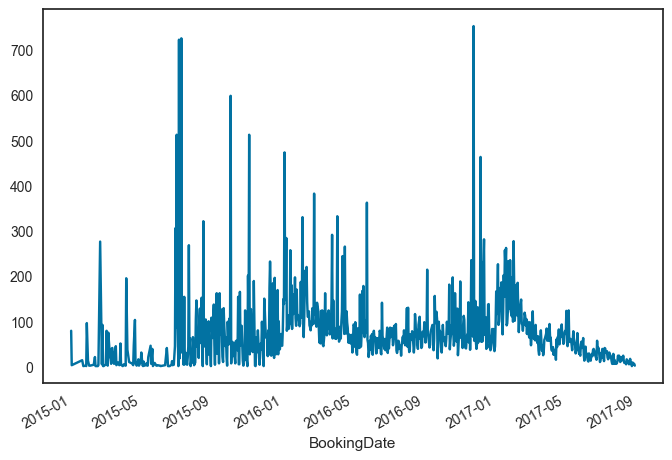

In [182]:
df_fe.groupby('BookingDate')['IsCanceled'].count().plot()

**CancelLeadTime**

In [183]:
df_fe['CancelLeadTime']=(df_fe['ArrivalDate'] - df_fe['ReservationStatusDate']).dt.days
df_fe.loc[df_fe['IsCanceled']==0,'CancelLeadTime']=0
metric_features_fe.append('CancelLeadTime')

**ArrivalDate features (DayOfWeek, DayOfMonth, Month, WeekNumber and Season) with cyclicity**

In [184]:
# https://towardsdatascience.com/make-your-machine-learning-model-work-better-with-datetime-features-eb21de397fe8

# According to the article, ciclicity can be created with date features. 
# This conversion can help the models detect patterns easily.

# Since np.pi is not exactly π, being that it is a finite binary floating point number that is close 
# to the true irrational real number π, it is off by ~1e-16. With that, to simplify the sine and cosine results,
# all the values are rounded by 15 decimal points.

In [185]:
# Creating necessary features for engineering features with cyclicity

# ArrivalDate_dayofweek
df_fe['ArrivalDate_dayofweek']=df_fe['ArrivalDate'].dt.dayofweek
non_metric_features_fe.append('ArrivalDate_dayofweek')
# ArrivalDate_season
# 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter
df_fe['ArrivalDate_season'] = df_fe.apply(lambda row: Season(row,'ArrivalDate'), axis = 1).astype(int)
non_metric_features_fe.append('ArrivalDate_season')

#Converting month values to number
df_fe['ArrivalDateMonth']= df_fe['ArrivalDate'].dt.month

# Changing Date column names to match with previous names
df_fe.rename(columns={'ArrivalDateDayOfMonth':'ArrivalDate_dayofmonth',
                      'ArrivalDateMonth':'ArrivalDate_month',
                      'ArrivalDateWeekNumber':'ArrivalDate_weeknumber',
                      'ArrivalDateYear':'ArrivalDate_year'
                     },inplace=True)
non_metric_features_fe[non_metric_features_fe.index('ArrivalDateDayOfMonth')]='ArrivalDate_dayofmonth'
non_metric_features_fe[non_metric_features_fe.index('ArrivalDateMonth')]='ArrivalDate_month'
non_metric_features_fe[non_metric_features_fe.index('ArrivalDateWeekNumber')]='ArrivalDate_weeknumber'
non_metric_features_fe[non_metric_features_fe.index('ArrivalDateYear')]='ArrivalDate_year'

In [186]:
# Day of week in which the guest is scheduled to arrive at the hotel
# extracting sine and cosine from day of week values
df_fe['ArrivalDate_dayofweek_sin'] = np.round(np.sin(2 * np.pi * df_fe['ArrivalDate_dayofweek']/7),15)
df_fe['ArrivalDate_dayofweek_cos'] = np.round(np.cos(2 * np.pi * df_fe['ArrivalDate_dayofweek']/7),15)
non_metric_features_fe.extend(['ArrivalDate_dayofweek_sin', 'ArrivalDate_dayofweek_cos'])

In [187]:
# Day of month in which the guest is scheduled to arrive at the hotel
# extracting sine and cosine from Day of month values
df_fe['ArrivalDate_dayofmonth_sin'] = np.round(np.sin(2 * np.pi * df_fe['ArrivalDate_dayofmonth']/df_fe['ArrivalDate'].dt.daysinmonth),15)
df_fe['ArrivalDate_dayofmonth_cos'] = np.round(np.cos(2 * np.pi * df_fe['ArrivalDate_dayofmonth']/df_fe['ArrivalDate'].dt.daysinmonth),15)
non_metric_features_fe.extend(['ArrivalDate_dayofmonth_sin', 'ArrivalDate_dayofmonth_cos'])

In [188]:
# Month in which the guest is scheduled to arrive at the hotel
# extracting sine and cosine from month values
df_fe['ArrivalDate_month_sin'] = np.round(np.sin(2 * np.pi * df_fe['ArrivalDate_month']/12.0),15)
df_fe['ArrivalDate_month_cos'] = np.round(np.cos(2 * np.pi * df_fe['ArrivalDate_month']/12.0),15)
non_metric_features_fe.extend(['ArrivalDate_month_sin', 'ArrivalDate_month_cos'])

In [189]:
# Week out of year in which the guest is scheduled to arrive at the hotel
# extracting sine and cosine from Week number values
df_fe['ArrivalDate_weeknumber_sin'] = np.round(np.sin(2 * np.pi * df_fe['ArrivalDate_weeknumber']/52),15)
df_fe['ArrivalDate_weeknumber_cos'] = np.round(np.cos(2 * np.pi * df_fe['ArrivalDate_weeknumber']/52),15)
non_metric_features_fe.extend(['ArrivalDate_weeknumber_sin', 'ArrivalDate_weeknumber_cos'])

In [190]:
# Season in which the guest is scheduled to arrive at the hotel
# extracting sine and cosine from day of Season values
df_fe['ArrivalDate_season_sin'] = np.round(np.sin(2 * np.pi * df_fe['ArrivalDate_season']/ 4),15)
df_fe['ArrivalDate_season_cos'] = np.round(np.cos(2 * np.pi * df_fe['ArrivalDate_season'] / 4),15)
non_metric_features_fe.extend(['ArrivalDate_season_sin', 'ArrivalDate_season_cos'])

**BookingDate features (DayOfWeek, DayOfMonth, Month and WeekNumber) with cyclicity**

In [191]:
# Season is not added as a feature since probably is not relevant for booking date

In [192]:
# Creating necessary features for engineering features with cyclicity

# BookingDate_dayofweek
df_fe['BookingDate_dayofweek']=df_fe['BookingDate'].dt.dayofweek
# BookingDate_dayofmonth
df_fe['BookingDate_dayofmonth']=df_fe['BookingDate'].dt.day
# BookingDate_month
df_fe['BookingDate_month']=df_fe['BookingDate'].dt.month
# BookingDate_weeknumber
df_fe['BookingDate_weeknumber'] = df_fe['BookingDate'].dt.week
non_metric_features_fe.extend(['BookingDate_dayofweek', 'BookingDate_dayofmonth', 'BookingDate_month', 'BookingDate_weeknumber'])

In [193]:
# Day of week in which the guest is scheduled to arrive at the hotel
# extracting sine and cosine from day of week values
df_fe['BookingDate_dayofweek_sin'] = np.round(np.sin(2 * np.pi * df_fe['BookingDate_dayofweek']/7),15)
df_fe['BookingDate_dayofweek_cos'] = np.round(np.cos(2 * np.pi * df_fe['BookingDate_dayofweek']/7),15)
non_metric_features_fe.extend(['BookingDate_dayofweek_sin', 'BookingDate_dayofweek_cos'])

In [194]:
# Day of month in which the guest is scheduled to arrive at the hotel
# extracting sine and cosine from Day of month values
df_fe['BookingDate_dayofmonth_sin'] = np.round(np.sin(2 * np.pi * df_fe['BookingDate_dayofmonth']/df_fe['BookingDate'].dt.daysinmonth),15)
df_fe['BookingDate_dayofmonth_cos'] = np.round(np.cos(2 * np.pi * df_fe['BookingDate_dayofmonth']/df_fe['BookingDate'].dt.daysinmonth),15)
non_metric_features_fe.extend(['BookingDate_dayofmonth_sin', 'BookingDate_dayofmonth_cos'])

In [195]:
# Month in which the guest is scheduled to arrive at the hotel
# extracting sine and cosine from month values
df_fe['BookingDate_month_sin'] = np.round(np.sin(2 * np.pi * df_fe['BookingDate_month']/12.0),15)
df_fe['BookingDate_month_cos'] = np.round(np.cos(2 * np.pi * df_fe['BookingDate_month']/12.0),15)
non_metric_features_fe.extend(['BookingDate_month_sin', 'BookingDate_month_cos'])

In [196]:
# Week out of year in which the guest is scheduled to arrive at the hotel
# extracting sine and cosine from Week number values
df_fe['BookingDate_weeknumber_sin'] = np.round(np.sin(2 * np.pi * df_fe['BookingDate_weeknumber']/52),15)
df_fe['BookingDate_weeknumber_cos'] = np.round(np.cos(2 * np.pi * df_fe['BookingDate_weeknumber']/52),15)
non_metric_features_fe.extend(['BookingDate_weeknumber_sin', 'BookingDate_weeknumber_cos'])

In [197]:
df=df_fe
metric_features=metric_features_fe.copy()
non_metric_features=non_metric_features_fe.copy()

<hr>
<a class="anchor" id="title6">
    
# 6. Business Understanding
    
</a>

In [198]:
df_bus=df_fe.copy()

In [199]:
# Define a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

#Define a list of Season names
season_names= ['Spring','Summer','Fall','Winter']

In [200]:
#Define a color dicitonary for the years
color_dict = {'2015': color_palette_list[1], '2016': color_palette_list[4], '2017': color_palette_list[3]}

<hr>
<a class="anchor" id="subtitle6.1">
    
## 6.1. General Overview
    
</a>

<a class="anchor" id="subtitle6.1.1">
    
### 6.1.1. Occupancy Rate and Seasonality 
    
</a>

In [201]:
#Define a dataframe which includes only reservations that had already made a Check-Out
df_check_out= df_bus[df_bus['ReservationStatus']=='Check-Out']
df_check_out['ArrivalDate_year']= df_check_out['ArrivalDate_year'].astype(str)

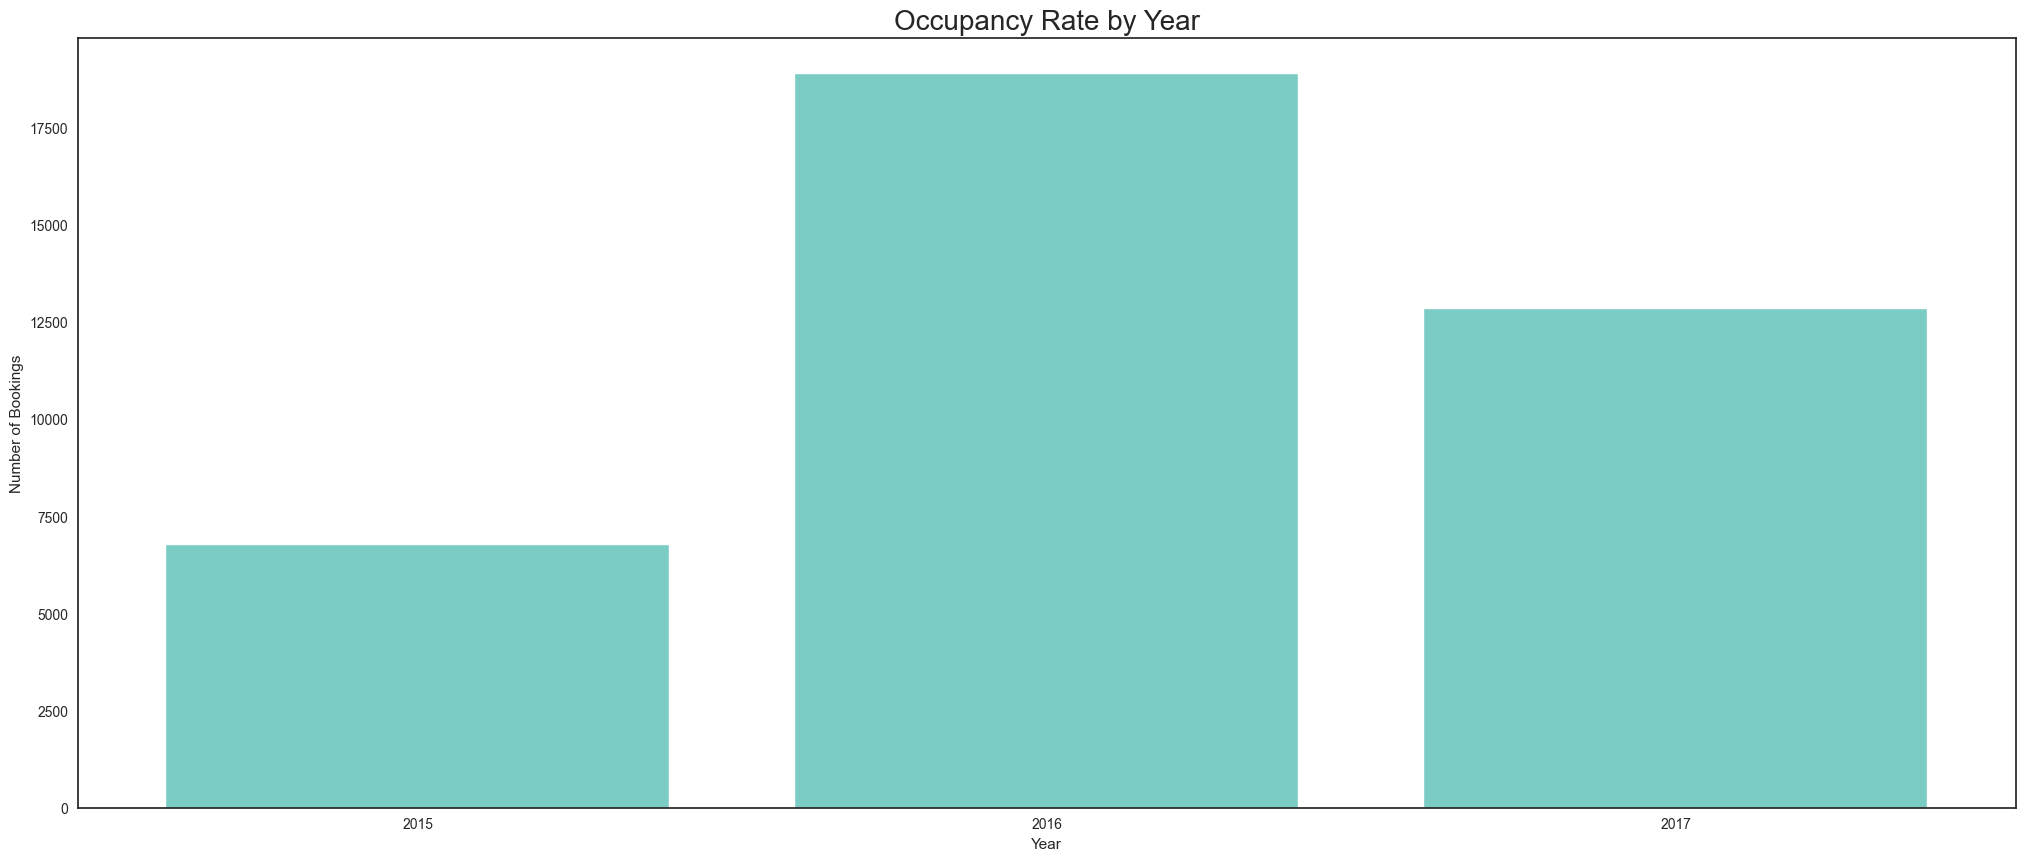

In [202]:
#Group the data by Year and count the number of reservations 
df_bus['ArrivalDate_year']= df_bus['ArrivalDate_year'].astype(str)
yearly_occupancy= df_check_out.groupby('ArrivalDate_year')['IsCanceled'].count()

#Plot the data for bookings by Year
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 10))
bars=axs.bar(yearly_occupancy.index, yearly_occupancy.values,color=color_palette_list[3])
axs.set_title('Occupancy Rate by Year', fontdict={'fontsize': 20})
axs.set_xlabel('Year')
axs.set_ylabel('Number of Bookings')

plt.show()


#2016 was the year with the highest number of reservations, which makes sense as there lack of information about some months 
#in both 2015 and 2017

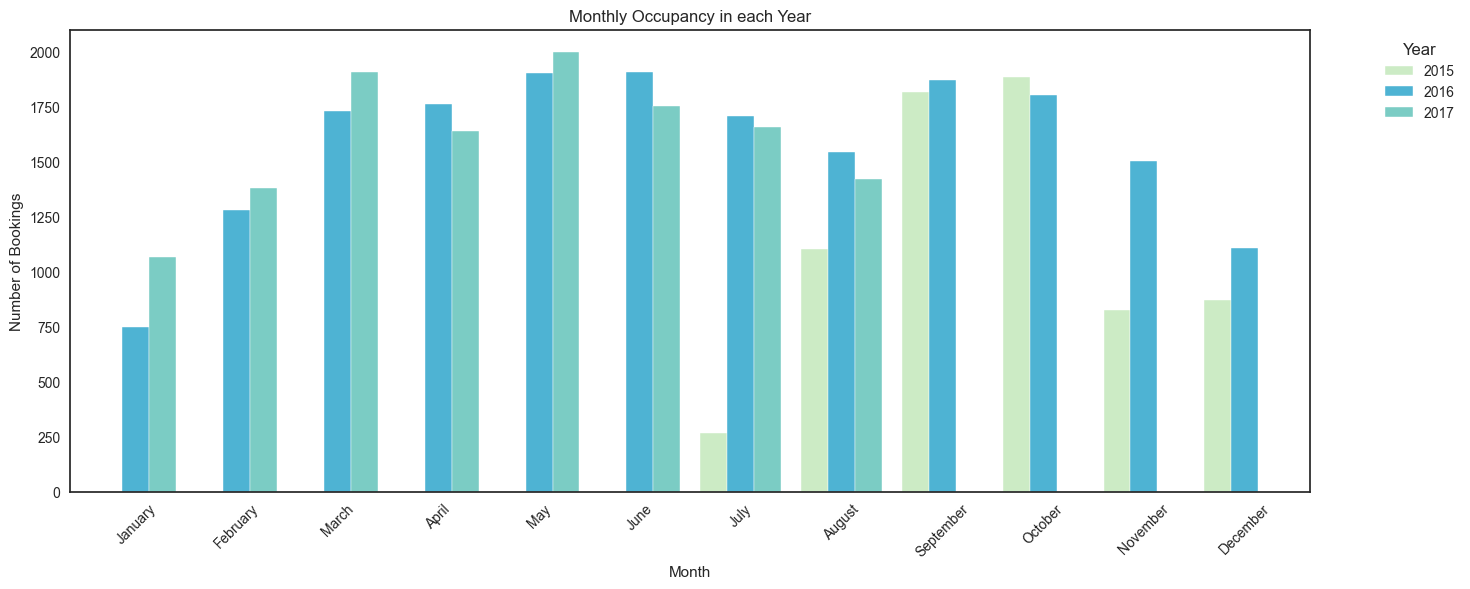

In [203]:
#Group the data by Month and Year and count the number of bookings 
monthly_occupancy= df_check_out.groupby(['ArrivalDate_month','ArrivalDate_year'])['IsCanceled'].count()
pivoted = monthly_occupancy.unstack()

# Plot the data 
ax = pivoted.plot(kind='bar', width=0.8, figsize=(16, 6),color=color_dict)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bookings')
ax.set_title('Monthly Occupancy in each Year')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(month_names, rotation=45)
plt.show()

#In 2015, the best two months were September and October. In opposition, November was the number with the
#lowest nr of reservations

#In 2016, October was the best month once again. Additionally, from April to October the number of bookings
#remained relatively high. January was the month with the lowest number of bookings

#In 2017, July and November had the lowest number of reservations, while September and October were good months for the hotel.

#Overall, the number of bookings in each month in the three different years was not considerably different. However, 
#it is important to highlight that July 2015 had a monthly occupancy mcuh lower than in the other months. And the same in
#November and December 

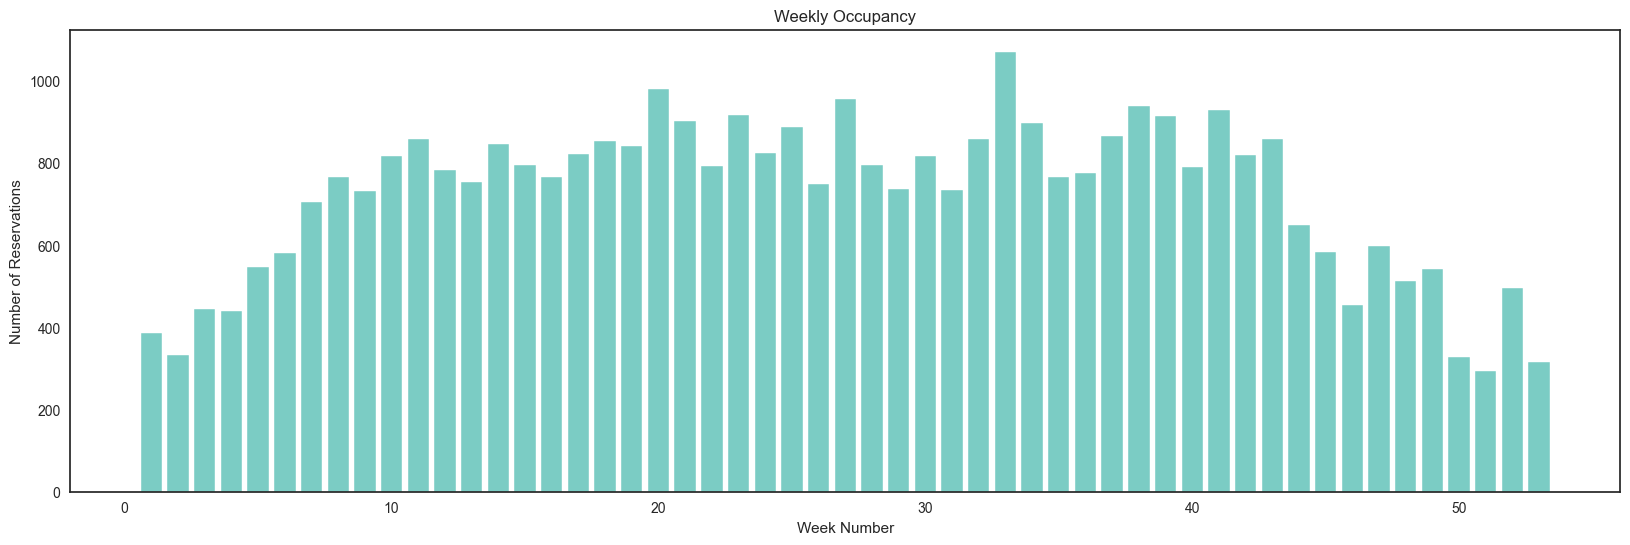

In [204]:
#Group the data by WeekNumber and count the number of bookings 
weekly_occupancy=  df_check_out.groupby('ArrivalDate_weeknumber')['IsCanceled'].count()
weekly_occupancy= weekly_occupancy.sort_values(ascending=False)

#Plot the data
plt.figure(figsize=(20, 6))
plt.bar(weekly_occupancy.index, weekly_occupancy.values,color=color_palette_list[3])
plt.title('Weekly Occupancy')
plt.xlabel('Week Number')
plt.ylabel('Number of Reservations')
plt.show()

#There is not any relevant aspect to hightlight regarding weekly occupancy 

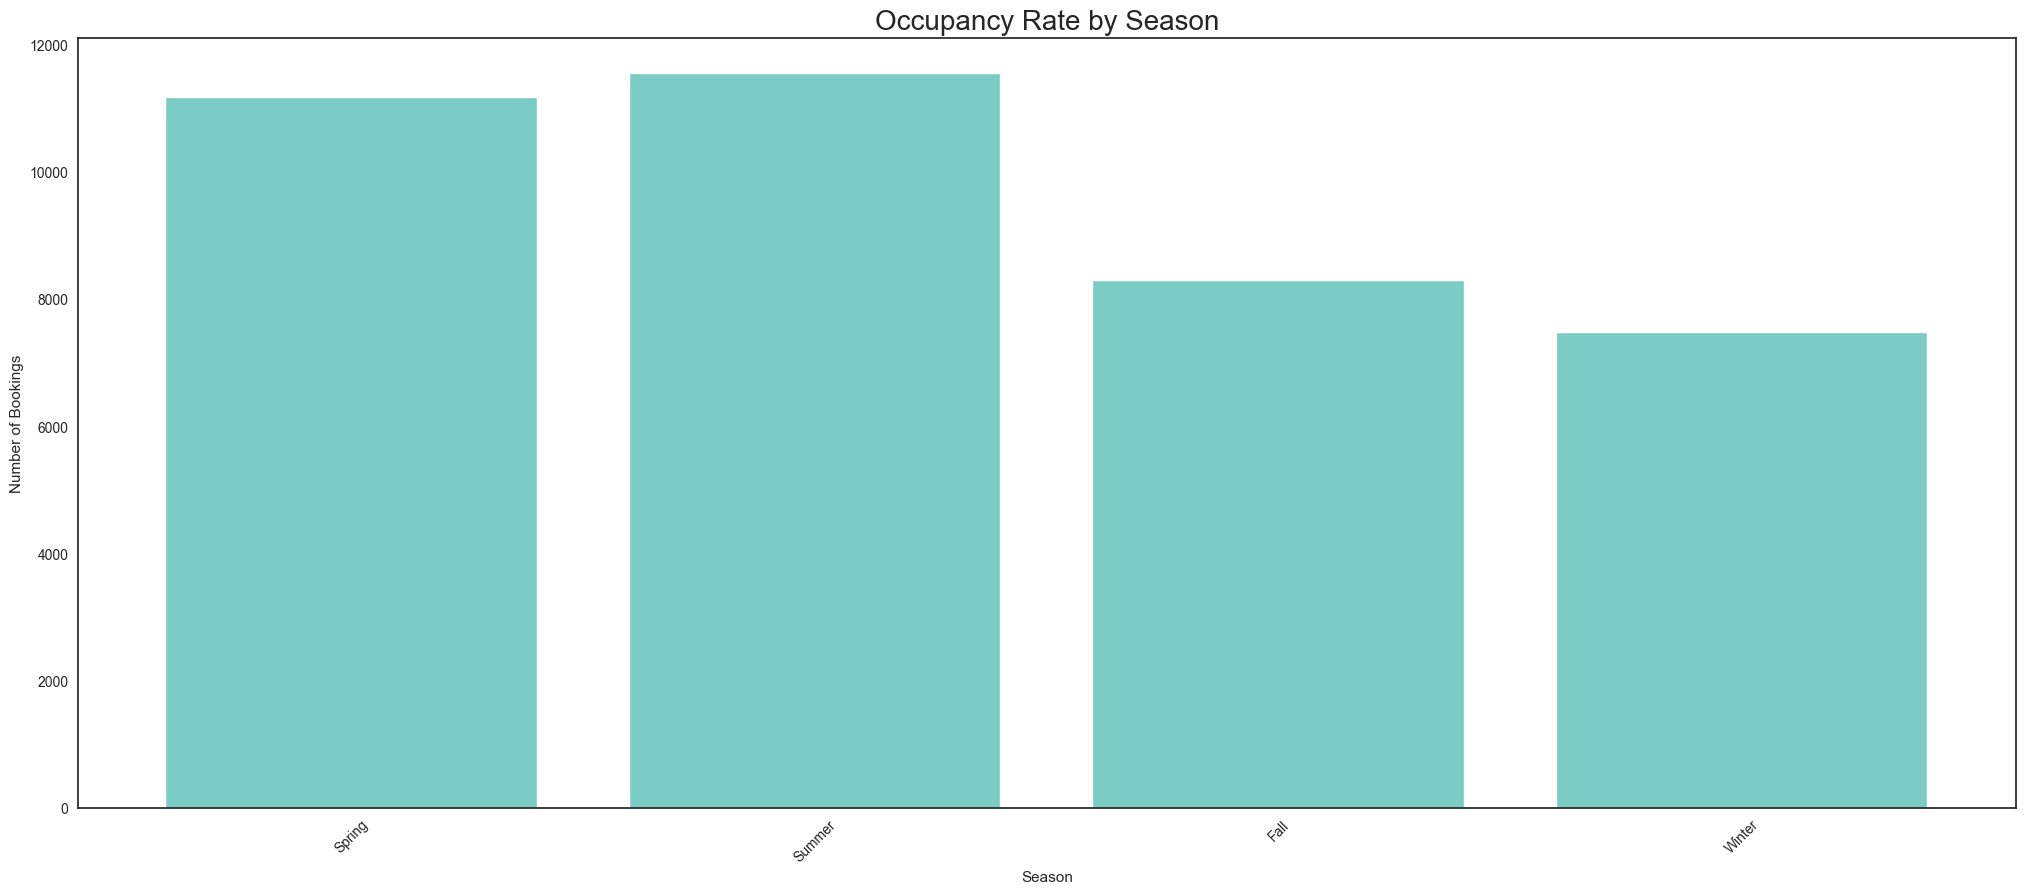

In [205]:
#Group the data by Season and count the number of bookings 
season_occupancy= df_check_out.groupby('ArrivalDate_season')['IsCanceled'].count()

#Plot the data 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(25, 10))
axs.bar(season_occupancy.index, season_occupancy.values,color=color_palette_list[3])
axs.set_title('Occupancy Rate by Season', fontdict={'fontsize': 20})
axs.set_xlabel('Season')
axs.set_ylabel('Number of Bookings')
axs.set_xticks(range(1,len(season_occupancy.index)+1))
axs.set_xticklabels(season_names, rotation=45)
plt.show()

#Spring and Summer are the Seasons with more demand, specially Summer 
#Winter low-demand season

<a class="anchor" id="subtitle6.1.2">
    
### 6.1.2. Hotel KPIs
    
</a>

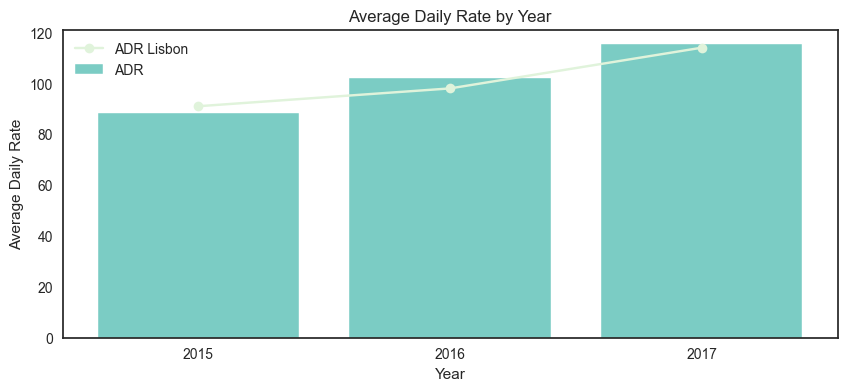

In [206]:
#ADR per Year and Compare with average ADR in Lisbon in the same year 

# group the data by year and compute the mean ADR
avg_adr_by_year = df_bus.groupby('ArrivalDate_year')['ADR'].mean()
#group the data by year and compute the mean ADR in Lisbon 
avg_industry_adr_by_year = df_bus.groupby('ArrivalDate_year')['ADR Lisbon'].mean()

#Plot the data 
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(avg_adr_by_year.index, avg_adr_by_year.values, color=color_palette_list[3], label='ADR')
ax.plot(avg_adr_by_year.index, avg_industry_adr_by_year.values, color=color_palette_list[0], marker='o', label='ADR Lisbon')
ax.set_xlabel('Year')
ax.set_ylabel('Average Daily Rate')
ax.set_title('Average Daily Rate by Year')
ax.legend()

plt.show()

#ADR was lower than the average of Hotels in Lisbon in 2016 and 2017.
#ADR increased in each year.

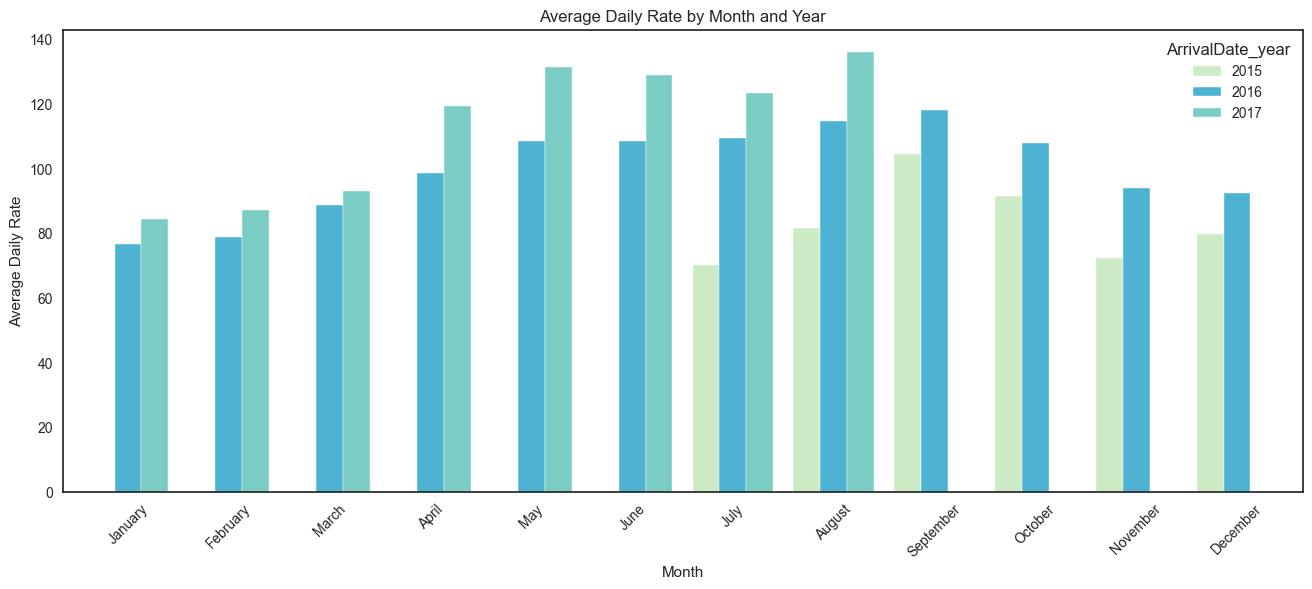

In [207]:
#Check Average Daily Rate by month in each year 

#Group the data by Month and Year, and compute the average ADR
avg_adr_by_month= df_bus.groupby(['ArrivalDate_month','ArrivalDate_year'])['ADR'].mean()
pivoted = avg_adr_by_month.unstack()

#Plot the data 
ax = pivoted.plot(kind='bar', width=0.8, figsize=(16, 6),color=color_dict)
ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Rate')
ax.set_title('Average Daily Rate by Month and Year')
ax.set_xticklabels(month_names, rotation=45)
plt.show()

#2015: September has the highest ADR, which makes sense considering the higher demand in this month. 
#2016: From April to October the ADR remained high, once again in accordance with demand. 
#2017: August the month with the highest ADR, followd by May, June, July, and April. 

In [208]:
#Check ADR per type of Room 
df_bus.groupby(['ReservedRoomType'])['ADR'].mean()

#RoomType G is the most expensive one, while RoomType B is the least expensive

ReservedRoomType
A     97.299760
B     87.526144
C     77.194444
D    130.512927
E    156.374043
F    192.810757
G    189.208356
Name: ADR, dtype: float64

In [209]:
#Average Revenue per Booking 
df_bus['TotalRevenue'].mean()

298.54896304853395

In [210]:
#Average Revenue per Guest 
(df_bus['TotalRevenue']/df_bus['TotalGuests']).mean()

164.56156559860563

In [211]:
#Average Length of Stay (ALOS)
df_bus['TotalNights'].mean()

2.8231771268753136

In [212]:
#Average Lead Time 
round(df_bus['LeadTime'].mean(),2)

98.45

In [213]:
#Average Guests per Booking 
round(df_bus['TotalGuests'].mean(),2)

1.9

In [214]:
#Cancellation Rate 
round((df_bus['IsCanceled'].mean())*100,2)

41.53

<a class="anchor" id="subtitle5.1.3">
    
### 5.1.3.Customer demographics and room preferences
    
</a>

In [215]:
#Understand how the characteristics of the customers (e.g., the number of adults, children, and babies) 
#are related to the type of room they book

In [216]:
total_counts = df_bus.groupby(['Adults', 'ReservedRoomType'])['IsCanceled'].count().unstack()
percentage_values = total_counts.apply(lambda x: x / x.sum() * 100, axis=1)
percentage_values

#In the cases in which number of Adults is 0, the most booked type of room is Room B. This correspond to cases in which 
#a room is reserved for children 
#1 and 2 adults usually choose RoomType A, followed by RoomType D
#3 adults mostly book Room Type D, followrd by RoomType A and B 
#4 adults usually book Room Type G, and never book A, B, or C 

ReservedRoomType          A         B         C          D         E  \
Adults                                                                 
1.0               90.398509  0.201973  0.023305   7.434165  1.569176   
2.0               82.697304  1.178082  0.012083  12.932718  1.272731   
3.0               15.403498  0.030684       NaN  73.427432  8.407487   

ReservedRoomType         F         G  
Adults                                
1.0               0.209741  0.163132  
2.0               1.590914  0.316169  
3.0               1.288739  1.442160

In [217]:
total_counts= df_bus.groupby(['Children','ReservedRoomType'])['IsCanceled'].count().unstack()
percentage_values= total_counts.apply(lambda x: x / x.sum() * 100, axis=1)
percentage_values

#When bookings include no children or only 1, people choose Room A preferably, and then Room D
#Bookings with 2 children choose RoomType F or B in a large number of cases 
#Bookings with 3 children prefer RoomType G, and B 

ReservedRoomType          A         B         C          D         E  \
Children                                                               
0.0               81.874429  0.903681  0.014169  15.046129  1.616865   
1.0               77.640156  0.912647       NaN  13.885267  2.411995   
2.0                1.085482  3.256445       NaN   0.271370  5.970149   

ReservedRoomType          F         G  
Children                               
0.0                0.311723  0.233005  
1.0                4.237288  0.912647  
2.0               80.868385  8.548168

In [218]:
total_counts= df_bus.groupby(['MarketSegment','ReservedRoomType'])['IsCanceled'].count().unstack()
percentage_values= total_counts.apply(lambda x: x / x.sum() * 100, axis=1)
percentage_values

#Corporate, Groups, Offline TA/TO clearly prefer RoomTypeA 
#Aviation Segment prefers A and D
#Complementary Segment: A, D, and G 
#Direct: usually A or D 
#Online TA: usually A or D 

ReservedRoomType          A         B         C          D         E  \
MarketSegment                                                          
Aviation          56.345178       NaN       NaN  42.639594  1.015228   
Complementary     71.153846  3.571429  0.549451  10.164835  4.670330   
Corporate         90.132670       NaN  0.041459   6.301824  3.150912   
Direct            68.677446  2.839967  0.020730  18.304312  6.384743   
Groups            99.072052  0.027293  0.009098   0.836972  0.036390   
Offline TA/TO     93.565865  0.413139  0.027091   5.113444  0.711141   
Online TA         70.240422  1.234683       NaN  24.101132  1.848922   

ReservedRoomType         F         G  
MarketSegment                         
Aviation               NaN       NaN  
Complementary     3.021978  6.868132  
Corporate         0.124378  0.248756  
Direct            2.321725  1.451078  
Groups                 NaN  0.018195  
Offline TA/TO     0.135455  0.033864  
Online TA         2.211881  0.362960

In [219]:
#Understand differences in ADR from different segments
df_bus.groupby(['MarketSegment'])['ADR'].mean()

#Online TA and Direct are the ones that on average pay a higher ADR 
#Groups and Corporate usually pay a lower ADR
#Complentary average really low, probably correspond to hotel offers

MarketSegment
Aviation          99.795330
Complementary      3.327830
Corporate         84.875282
Direct           114.890454
Groups            88.595302
Offline TA/TO     92.906248
Online TA        116.718046
Name: ADR, dtype: float64

<a class="anchor" id="subtitle5.1.4">
    
### 5.1.4.Customers and booking behavior
    
</a>

In [220]:
#Understand how the behavior of different customer types (e.g., transient vs. groups vs. contract) 
#differs in terms of lead time, booking changes, and cancellation rate. 
#This can give insights into the different needs and preferences of these customer segments.

In [221]:
df_bus.groupby('CustomerType')['LeadTime'].mean()

#Group make reservations with less time in advance 

CustomerType
Contract            36.814400
Group               43.917749
Transient           95.154644
Transient-Party    117.373932
Name: LeadTime, dtype: float64

In [222]:
df_bus.groupby('MarketSegment')['LeadTime'].mean()

#Groups and Offline TA/TO segments reserve in more advance 
#Aviation, Complementary, and Corporate make bookings in short notice 

MarketSegment
Aviation           3.817259
Complementary      9.956044
Corporate         26.881426
Direct            43.911277
Groups           171.468614
Offline TA/TO    130.621673
Online TA         73.909539
Name: LeadTime, dtype: float64

In [223]:
df_bus.groupby('CustomerType')['TotalOfSpecialRequests'].agg(['mean', 'min', 'max'])

#Contract Customer on average ask for more requests on average

mean  min  max
CustomerType                       
Contract         1.248000  0.0  3.0
Group            0.567100  0.0  3.0
Transient        0.514487  0.0  3.0
Transient-Party  0.278588  0.0  3.0

In [224]:
df_bus.groupby('MarketSegment')['TotalOfSpecialRequests'].agg(['mean', 'min', 'max'])

#Complementary makes more requests on average

mean  min  max
MarketSegment                    
Aviation       0.096447  0.0  2.0
Complementary  0.629121  0.0  3.0
Corporate      0.160033  0.0  3.0
Direct         0.445274  0.0  3.0
Groups         0.082333  0.0  2.0
Offline TA/TO  0.186387  0.0  3.0
Online TA      0.779774  0.0  3.0

In [225]:
total_customers = df_bus.groupby('CustomerType')['IsCanceled'].count()
canceled_customers = df_bus.groupby('CustomerType')['IsCanceled'].sum()

percentage_canceled = (canceled_customers / total_customers) * 100
percentage_canceled

#48% of Contract clients cancelled 
#46% of Transient clients cancelled 

CustomerType
Contract           17.120000
Group               6.493506
Transient          47.157837
Transient-Party    23.342175
Name: IsCanceled, dtype: float64

In [226]:
total_customers = df_bus.groupby('MarketSegment')['IsCanceled'].count()
canceled_customers = df_bus.groupby('MarketSegment')['IsCanceled'].sum()

percentage_canceled = (canceled_customers / total_customers) * 100
percentage_canceled

#68% of Groups clients cancelled
#43% of Offline TA/TO clients cancelled

MarketSegment
Aviation         22.335025
Complementary    11.538462
Corporate        24.875622
Direct           17.267828
Groups           66.439229
Offline TA/TO    42.946156
Online TA        37.722972
Name: IsCanceled, dtype: float64

In [227]:
df_bus.groupby('CustomerType')['BookingChanges'].agg(['mean', 'min', 'max'])

#No relevant differences between customer types

mean  min  max
CustomerType                       
Contract         0.064000  0.0  2.0
Group            0.155844  0.0  2.0
Transient        0.064096  0.0  2.0
Transient-Party  0.180150  0.0  2.0

In [228]:
df_bus.groupby('MarketSegment')['BookingChanges'].agg(['mean', 'min', 'max'])

#No relevant differences between Market Segments

mean  min  max
MarketSegment                    
Aviation       0.162437  0.0  2.0
Complementary  0.162088  0.0  2.0
Corporate      0.191542  0.0  2.0
Direct         0.199005  0.0  2.0
Groups         0.089247  0.0  2.0
Offline TA/TO  0.083847  0.0  2.0
Online TA      0.064557  0.0  2.0

<hr>
<a class="anchor" id="subtitle6.2">
    
## 6.2. Cancelled vs Not Cancelled Reservations 
    
</a>

<a class="anchor" id="subtitle6.2.1">
    
### 6.2.1.Cancellation and Seasonality 
    
</a>

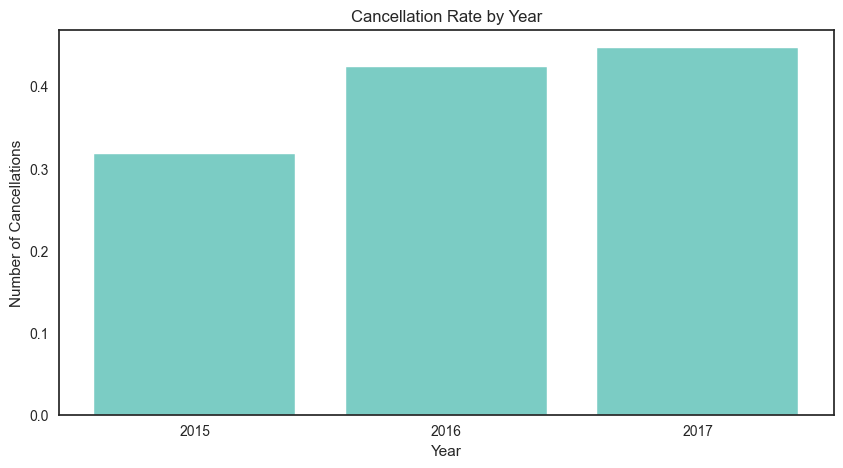

In [229]:
#Check Cancelation Rate in the different years

# Group the datayear and calculate the proportion of cancellations
cancellations_by_year = df_bus.groupby('ArrivalDate_year')['IsCanceled'].mean()

#Plot the data 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(cancellations_by_year.index, cancellations_by_year.values,color=color_palette_list[3])
axs.set_title('Cancellation Rate by Year')
axs.set_xlabel('Year')
axs.set_ylabel('Number of Cancellations')
plt.show()

#Cancellation Rate was similar in the three years in analysis

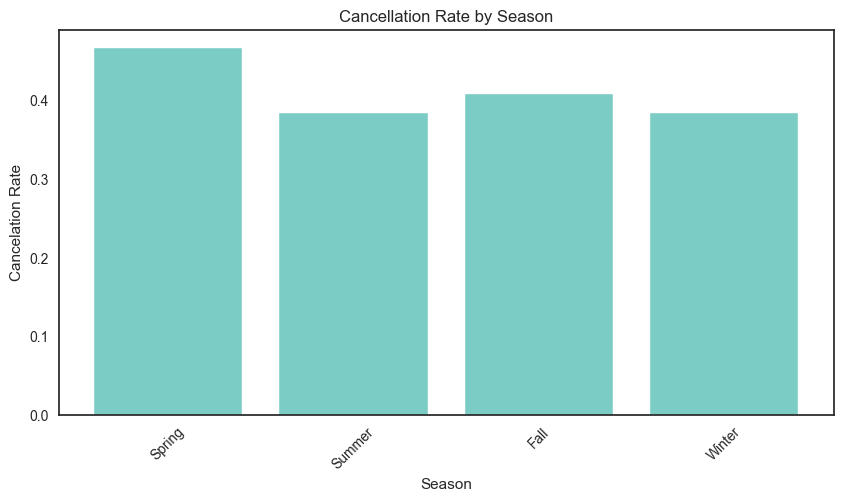

In [230]:
#Check Cancelation Rate in the different seasons

# Group the data by season and calculate the proportion of cancellations
cancellations_by_season = df_bus.groupby('ArrivalDate_season')['IsCanceled'].mean()

#Plot the data 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axs.bar(cancellations_by_season.index, cancellations_by_season.values,color=color_palette_list[3])
axs.set_title('Cancellation Rate by Season')
axs.set_xlabel('Season')
axs.set_ylabel('Cancelation Rate')
axs.set_xticks(range(1,len(season_occupancy.index)+1))
axs.set_xticklabels(season_names, rotation=45)
plt.show()

#Cancellation Rate is similar in the different Seasons 

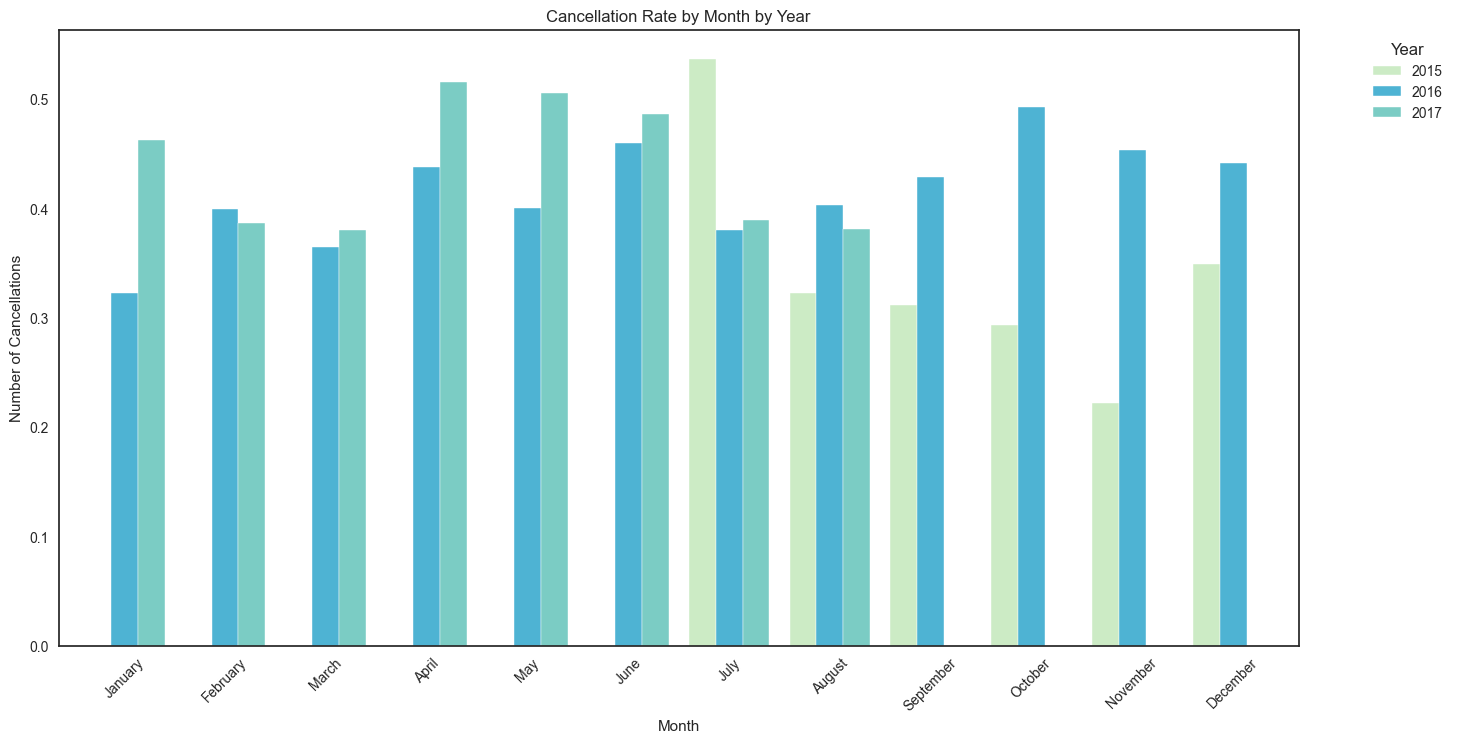

In [231]:
#Check Cancelation Rate in the months in the 3 years 

# Group the data by month and year and calculate the proportion of cancellations
aux= df_bus.groupby(['ArrivalDate_month','ArrivalDate_year',])['IsCanceled'].mean()
pivoted = aux.unstack()

# Plot the data 
ax = pivoted.plot(kind='bar', width=0.8, figsize=(16, 8),color=color_dict)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Cancellations')
ax.set_title('Cancellation Rate by Month by Year')
ax.set_xticklabels(month_names, rotation=45)
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#July 2015 has an unexpected high number of cancellations. November had a lowest number of cancellations 
#Overall there are not large differences in the cancellation rate in different months 

<a class="anchor" id="subtitle6.2.2">
    
### 6.2.2.Cancellation and ADR 
    
</a>

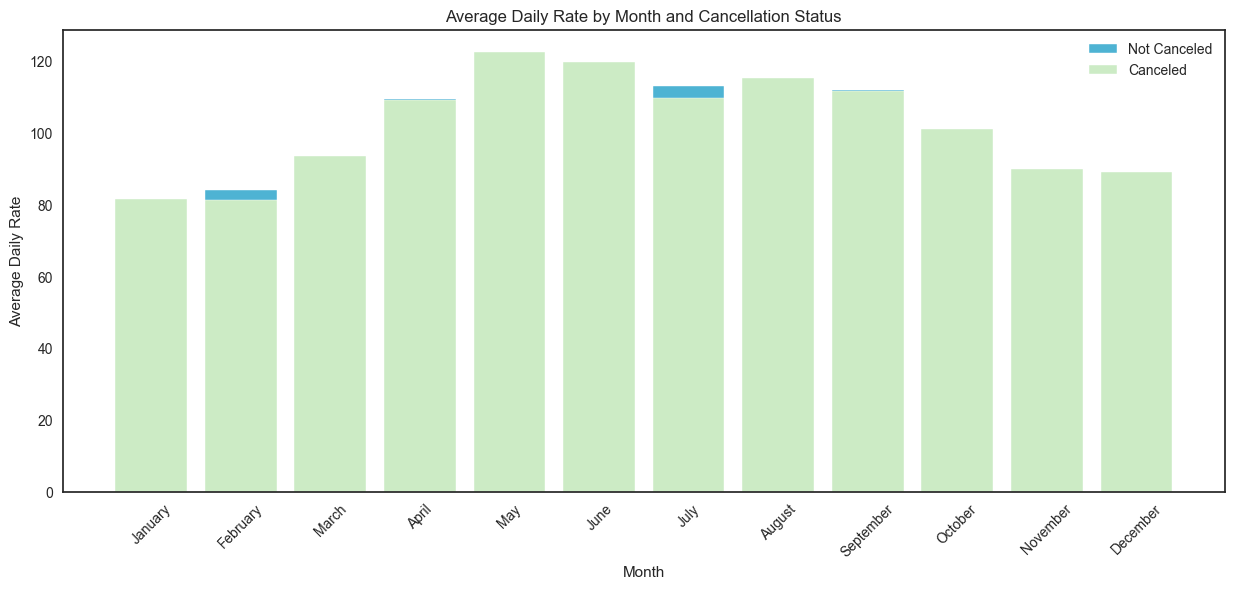

In [232]:
#Group the data by month and cancellation status, and compute the mean ADR
avg_adr_by_month_cancel = df_bus.groupby(['ArrivalDate_month', 'IsCanceled'])['ADR'].mean().reset_index()
avg_adr_by_month_cancel_pivot = pd.pivot_table(avg_adr_by_month_cancel, values='ADR', 
                                                index='ArrivalDate_month', columns='IsCanceled')

#Plot the data 
fig, ax = plt.subplots(figsize=(15, 6)) 

# plot the bars for non-canceled bookings 
ax.bar(avg_adr_by_month_cancel_pivot.index, avg_adr_by_month_cancel_pivot[0], color=not_canceled_color, label='Not Canceled')
# plot the bars for canceled bookings
ax.bar(avg_adr_by_month_cancel_pivot.index, avg_adr_by_month_cancel_pivot[1], color=canceled_color, label='Canceled')

ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Rate')
ax.set_title('Average Daily Rate by Month and Cancellation Status')
ax.set_xticks(avg_adr_by_month_cancel_pivot.index) 
ax.set_xticklabels(month_names, rotation=45)
ax.legend()
plt.show()

#There are not considerable differences on the ADR from cancelled and not cancelled reservations
#Actually, on July and August not cancelled reservations ADR was higher 

<a class="anchor" id="subtitle6.2.3">
    
### 6.2.3.Cancellation and Customer Behavior  
    
</a>

In [233]:
df_bus.groupby('IsCanceled')['CancelLeadTime'].mean()

#Usually customers cancel with 84 days in advance 

IsCanceled
0     0.000000
1    84.788054
Name: CancelLeadTime, dtype: float64

In [234]:
df_bus[df_bus['IsCanceled']==1].groupby('MarketSegment')['CancelLeadTime'].mean()

#Usually Groups cancel with more time in advance, while Aviation and Complementary only 3 days in advance 

MarketSegment
Aviation           2.659091
Complementary      3.166667
Corporate         33.553333
Direct            29.334934
Groups           131.666986
Offline TA/TO     92.123798
Online TA         59.714227
Name: CancelLeadTime, dtype: float64

In [235]:
#History of cancellations or who have not booked before have a higher likelihood of churning??
total_counts= df_bus.groupby(['IsCanceled','PreviousCancellations'])['IsCanceled'].count().unstack()

percentage_values= total_counts.apply(lambda x: x / x.sum() * 100, axis=1)
percentage_values

#92% of customers who cancelled had never cancelled before. And 8% had cancelled one time before.
#99% of customers who did not cancell, they did not make any cancelation before. 

PreviousCancellations        0.0       1.0
IsCanceled                                
0                      99.927208  0.072792
1                      92.983933  7.016067

In [236]:
#Length of stay and churn
total_counts= df_bus.groupby(['IsCanceled','TotalNights'])['IsCanceled'].count().unstack()

percentage_values= total_counts.apply(lambda x: x / x.sum() * 100, axis=1)
percentage_values.T

#People who cancelled, usually book between 1 or 4 nights 
#People who did not cancel have the same behaviour 

IsCanceled           0          1
TotalNights                      
0.0           0.626527   0.043919
1.0          20.984766  13.259891
2.0          24.036812  30.487135
3.0          10.999324  13.614903
3.0          15.247231  17.714014
4.0           5.937711   5.047030
4.0          10.827744   9.614610
5.0           6.535642   5.251986
6.0           2.025165   2.320389
7.0           2.438517   2.225231
8.0           0.249571   0.289134
9.0           0.075391   0.098818
10.0          0.015598   0.032939

In [237]:
#Length of stay during week and churn

df_bus.groupby(['IsCanceled'])['StaysInWeekNights'].mean()

#No differences 

IsCanceled
0    2.041647
1    2.146250
Name: StaysInWeekNights, dtype: float64

In [238]:
#Length of stay during weekends and churn

df_bus.groupby(['IsCanceled'])['StaysInWeekendNights'].mean()

#No differences 

IsCanceled
0    0.754251
1    0.715331
Name: StaysInWeekendNights, dtype: float64

In [239]:
#RoomType Discrepancy and Churn

df_bus.groupby(['IsCanceled'])['RoomTypeDiscrepancy'].mean()

#No evidence of discrepancy being an important factor 

IsCanceled
0    0.141060
1    0.011126
Name: RoomTypeDiscrepancy, dtype: float64

In [240]:
#Events and Churn 

df_bus.groupby('IsEvent')['IsCanceled'].mean()

#No differences 

IsEvent
0.0    0.413228
1.0    0.432186
Name: IsCanceled, dtype: float64

<a class="anchor" id="subtitle6.2.4">
    
### 6.2.4.Cancellation and Categorical Features
    
</a>

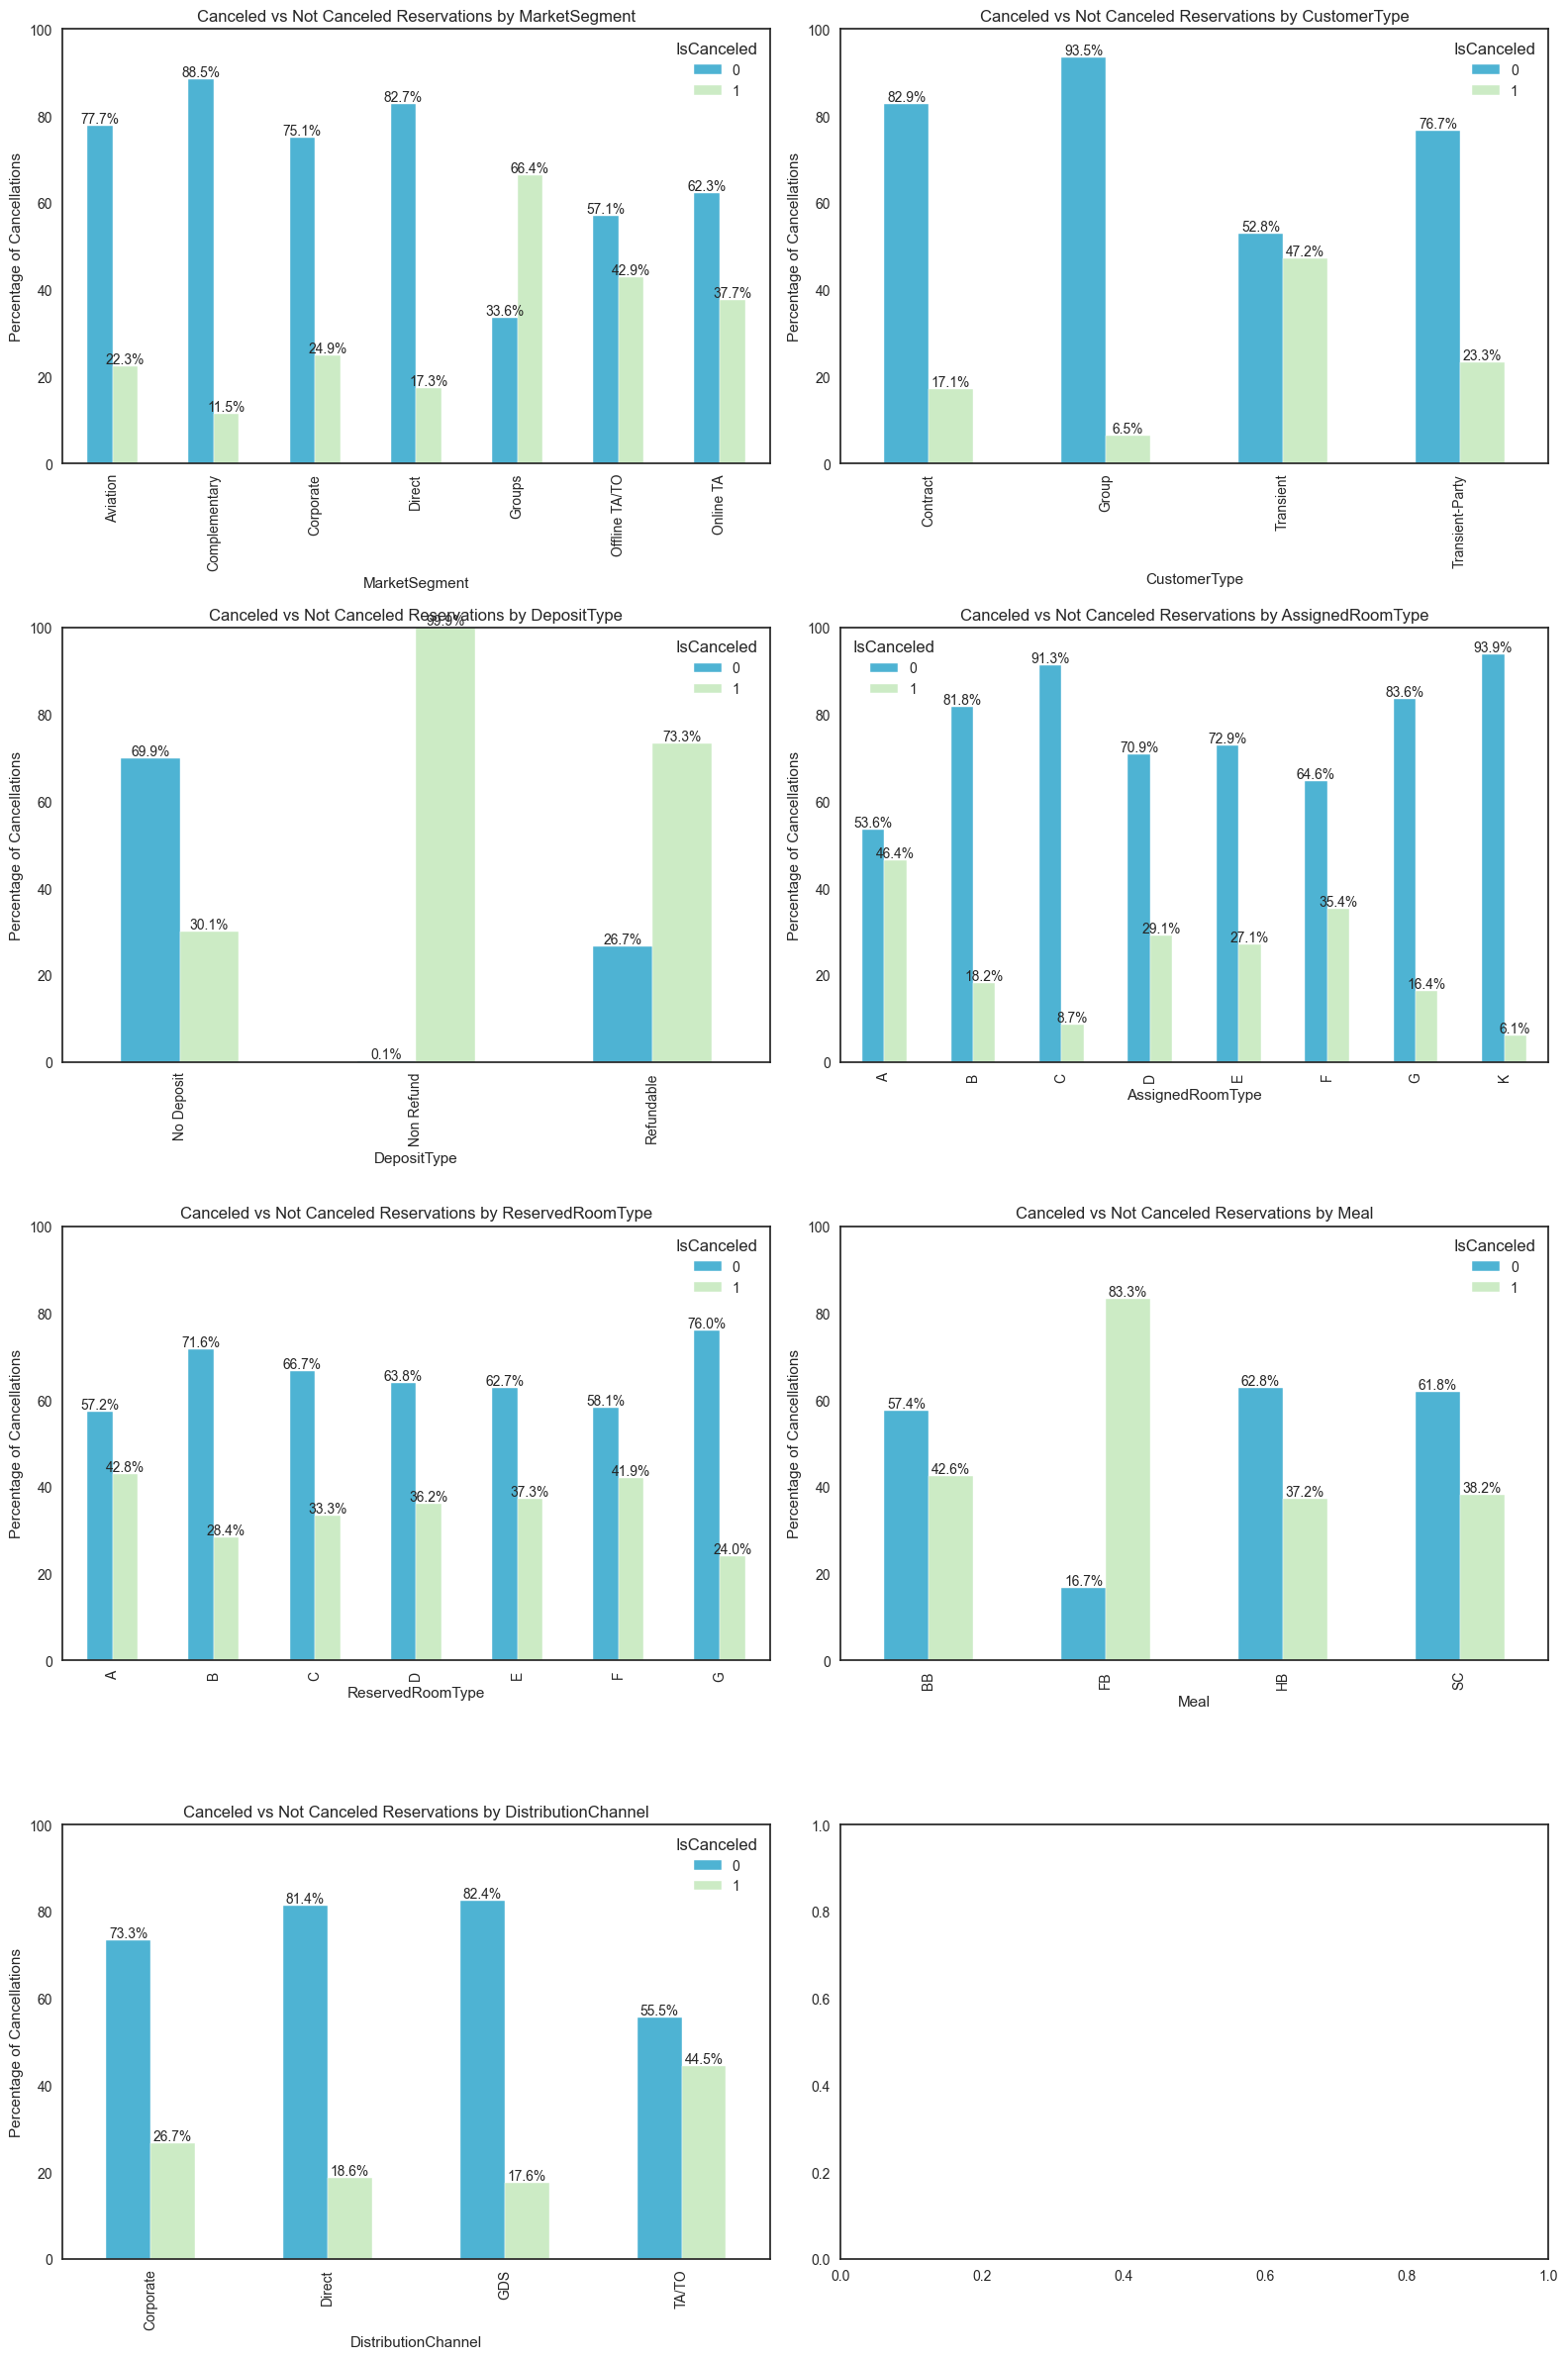

In [241]:
#Understand relationship between cancelled and not cancelled bookings and the Categorical Features
features = ['MarketSegment', 'CustomerType', 'DepositType', 'AssignedRoomType', 'ReservedRoomType', 'Meal', 'DistributionChannel']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))

# Plot each feature in a subplot
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    
    # Group the data by the feature and IsCanceled, and calculate cancellation  rate
    grouped = df_bus.groupby([feature, 'IsCanceled']).size().unstack()
    cancellation_perc = grouped.apply(lambda x: x / x.sum() * 100, axis=1)
    
    # Plot the data
    ax = cancellation_perc.plot(kind='bar', stacked=False, color={0: not_canceled_color, 1: canceled_color}, ax=axes[row, col])
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage of Cancellations')
    ax.set_title('Canceled vs Not Canceled Reservations by {}'.format(feature))
    ax.set_ylim([0, 100])  
    
    # Display percentage values on top of each bar
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize='small')
        
fig.tight_layout()
plt.show()

#Groups have more cancellations than no cancellations 
#Offline TA/TO percentage of cancelations similar to percentage of no cancellations 
#Transient and Contract have similar number of cancelations and no cancelations
#Almost all cases of Non Refund were canceled 
#70% of Refundable were canceled
#Assigned Room Type A has a similar percentage of both cases 
#Meal FB more cancelations than no cancelations 
#TA/TO distribution channel similar percentage 

<a class="anchor" id="subtitle6.2.5">
    
### 6.2.5.Cancellation and Metric Features
    
</a>

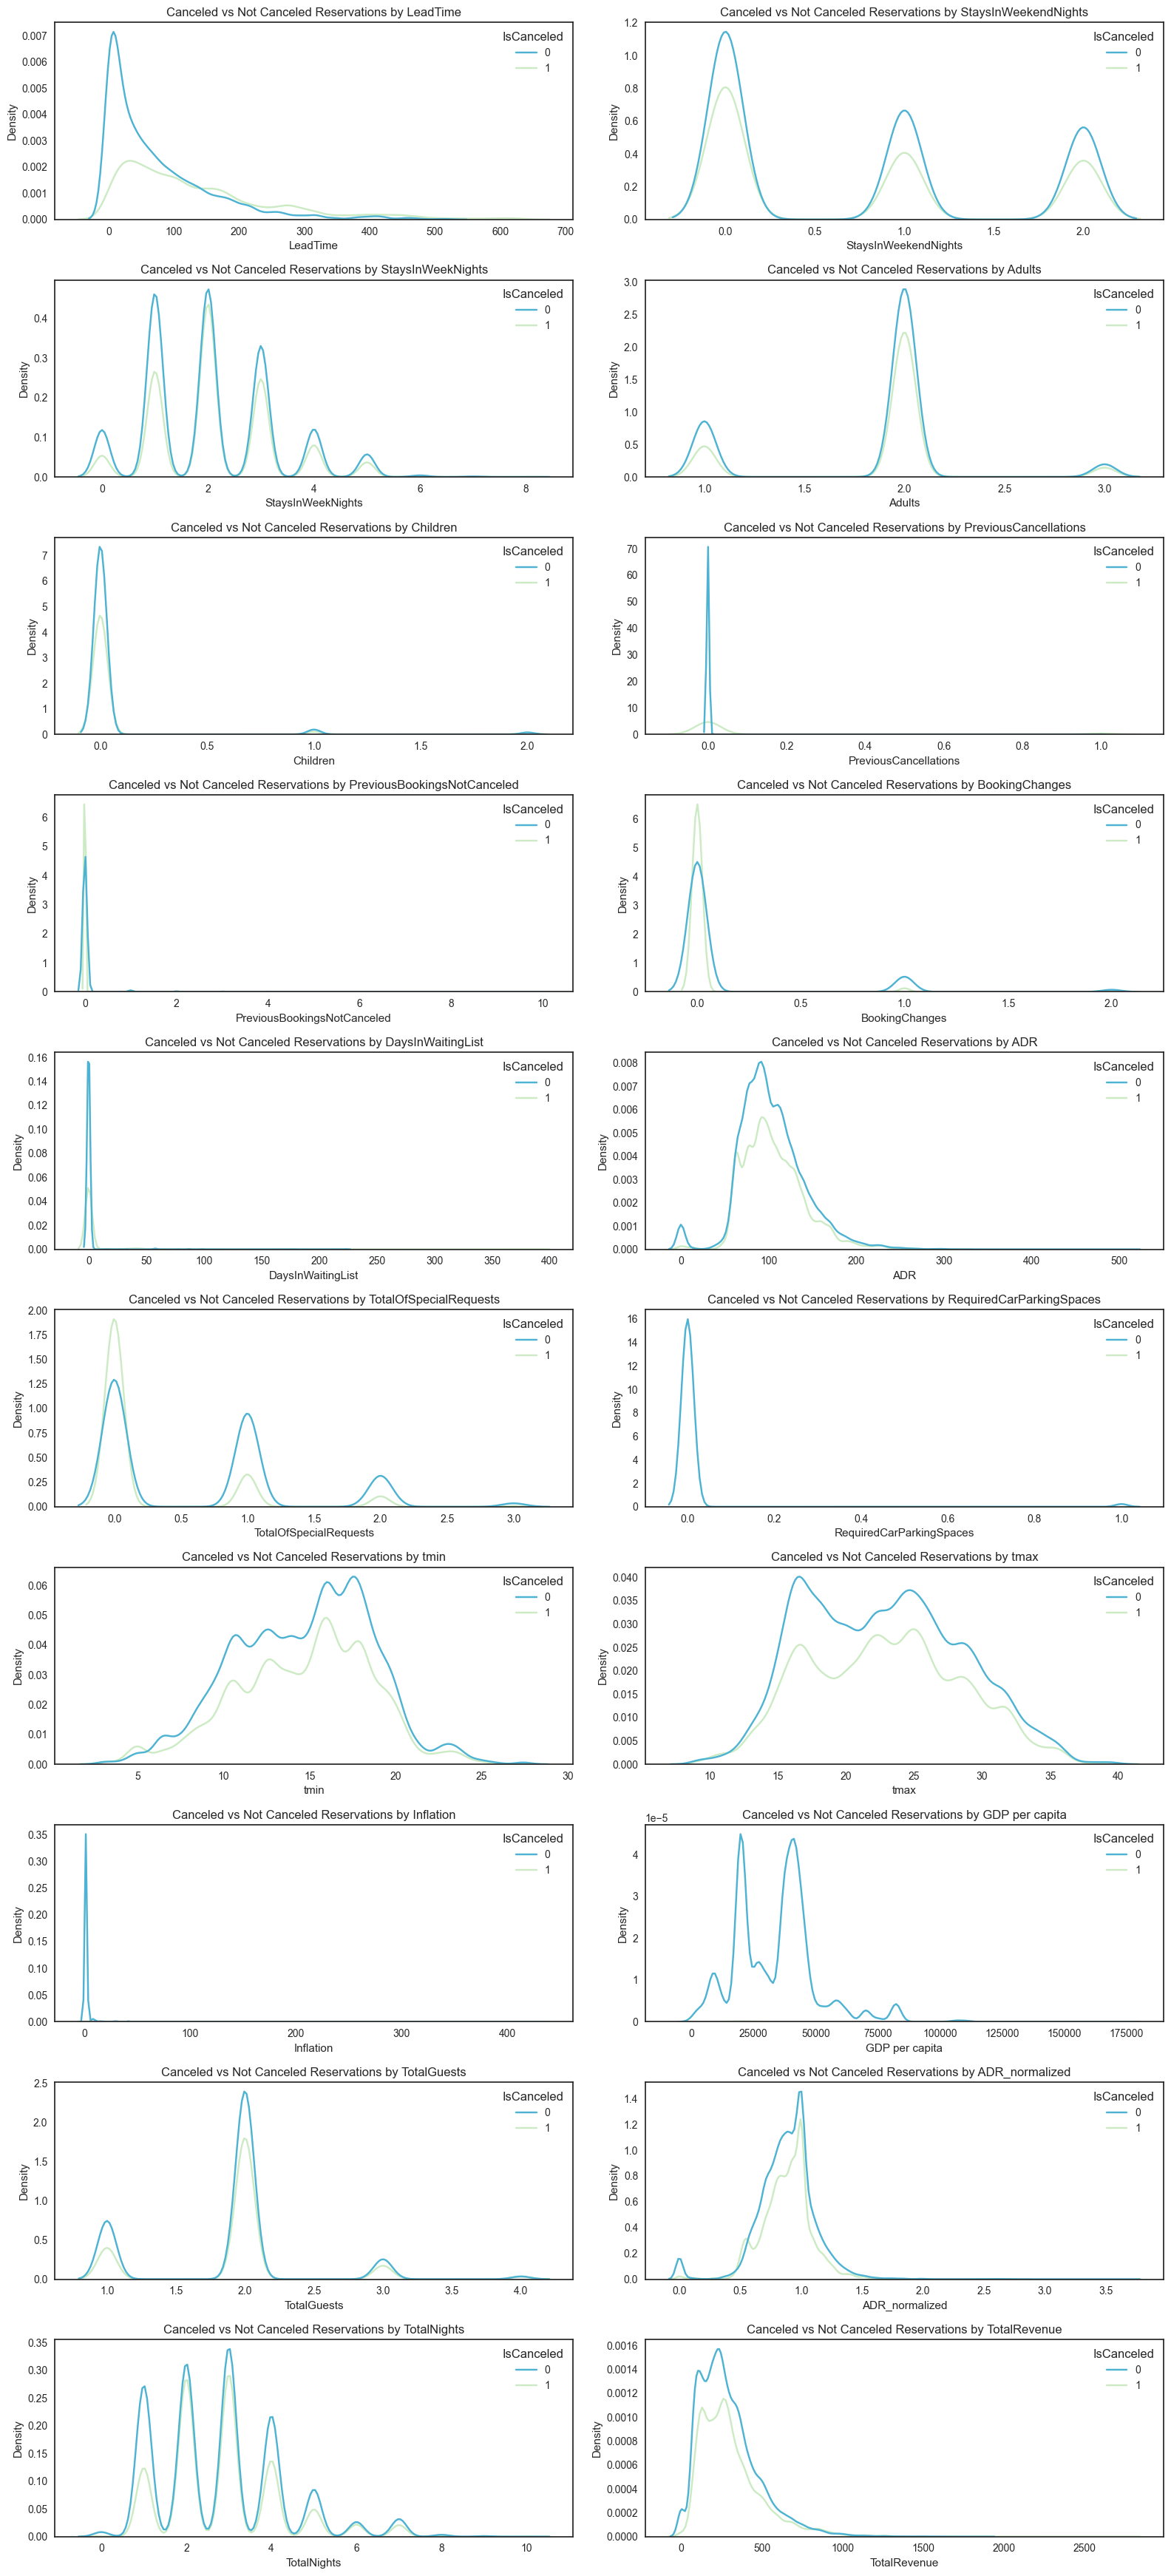

In [242]:
#Understand relationship between cancelled and not cancelled bookings and the Metric Features

#Plot density plots for both categories 
palette = {0: not_canceled_color, 1: canceled_color}
fig, axes = plt.subplots(10, 2, figsize=(16, 35))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.kdeplot (data=df_bus,x=feat, hue='IsCanceled',
                 ax=ax,
                 palette=palette)
    ax.set_title('Canceled vs Not Canceled Reservations by {}'.format(feat))
fig.tight_layout()

#LeadTime: for no cancelations, most bookings are done with less than 100 day in advance, while for 
#canceled reservations the distribution is more spread 
#Total of Special Requests: cancelations have less special requests overall
#Remaining variables: similar distribution

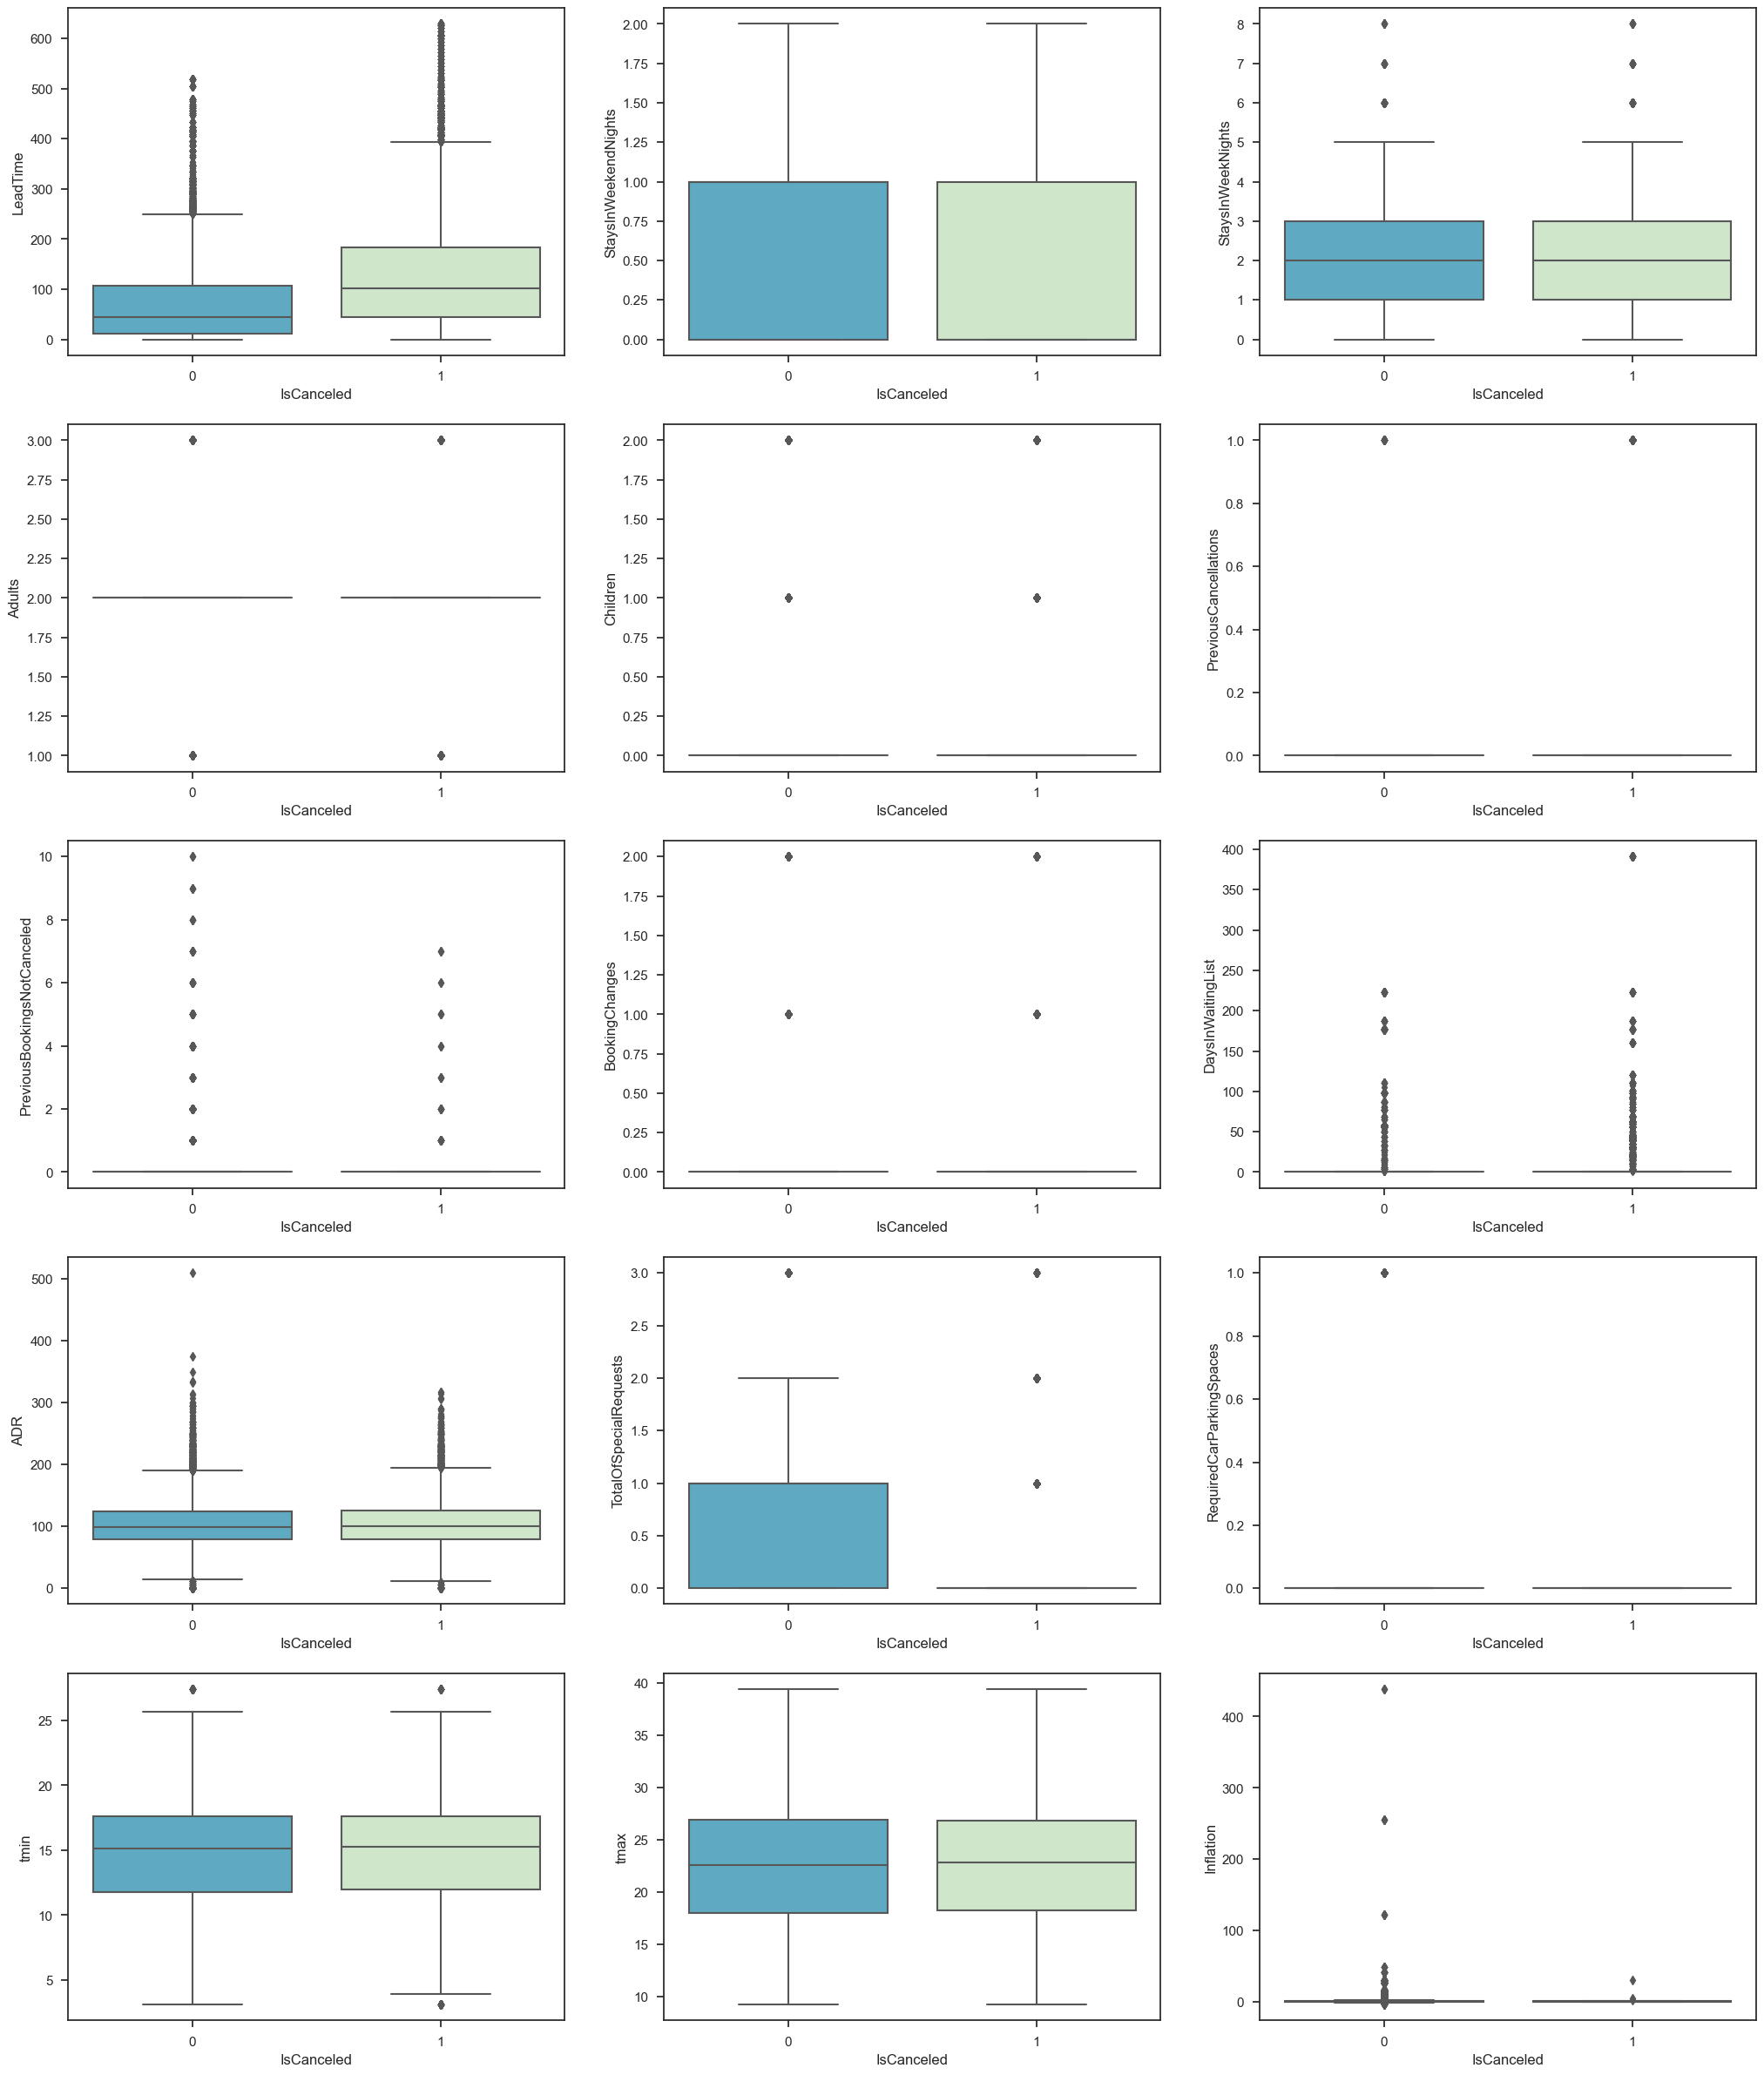

In [243]:
#Understand relationship between cancelled and not cancelled bookings and the Metric Features

#Plot box plots 
palette = {0: not_canceled_color, 1: canceled_color}

sns.set(style = "ticks")

fig, axes = plt.subplots(5, 3, figsize=(25, 30))

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x = df_bus["IsCanceled"], y = df[feat], ax = ax, palette=palette)


plt.show()
#Canceled usually have higher lead times 
#Not significant differences in the remaining variables 

<hr>
<a class="anchor" id="subtitle7">
    
# 7. Feature Selection
    
</a>

In [244]:
# Create a copy of df
df_fs = df.copy()
metric_features_fs = metric_features.copy()
non_metric_features_fs = non_metric_features.copy()

In [245]:
# Dropping Features that are not suitable for modelling. 
# Regarding date features, only the sine and cosine will be tested.

# ReservationStatus/ReservationStatusDate/CancelLeadTime are not accountable since can not be used as Independent variables.

features_to_drop=['Event Name', 
                  # Removing ADR and Total Revenue to only keep the normalized variables.
                  'ADR','TotalRevenue',
                  #'Country Name','Country',
                  #these have grouped features
                  'MarketSegment','DistributionChannel','Agent','CustomerType','CustomerSegment',
                  'ReservedRoomType','DepositType',
                  # these are maybe? 'Inflation','GDP per capita',
                  'ArrivalDate','ArrivalDate_year',
                  'BookingDate',
                  # these are removed because are not known before cancellation/arrival
                  'Inflation','Country','Country Name','GDP per capita',
                  'ReservationStatus', 'ReservationStatusDate','CancelLeadTime','RoomTypeDiscrepancy','AssignedRoomType']

#cyclic_features= [column for column in non_metric_features_fs if 'sin' in column or 'cos' in column]
#features_to_drop.extend(cyclic_features)
df_fs.drop(features_to_drop,axis=1,inplace=True)
non_metric_features_fs = [column for column in non_metric_features_fs if column not in features_to_drop]
metric_features_fs = [column for column in metric_features_fs if column not in features_to_drop]

In [246]:
# The Feature Selection is divided in Filter Methods, Wrapper Methods and Embedded Methods.

# For the filter methods, kendall correlation and Mutual Information are used
# For the wrapper methods, RFE with decision tree is used

<hr>
<a class="anchor" id="subtitle7.1">
    
## 7.1. Filter Methods
    
</a>

### Metric features

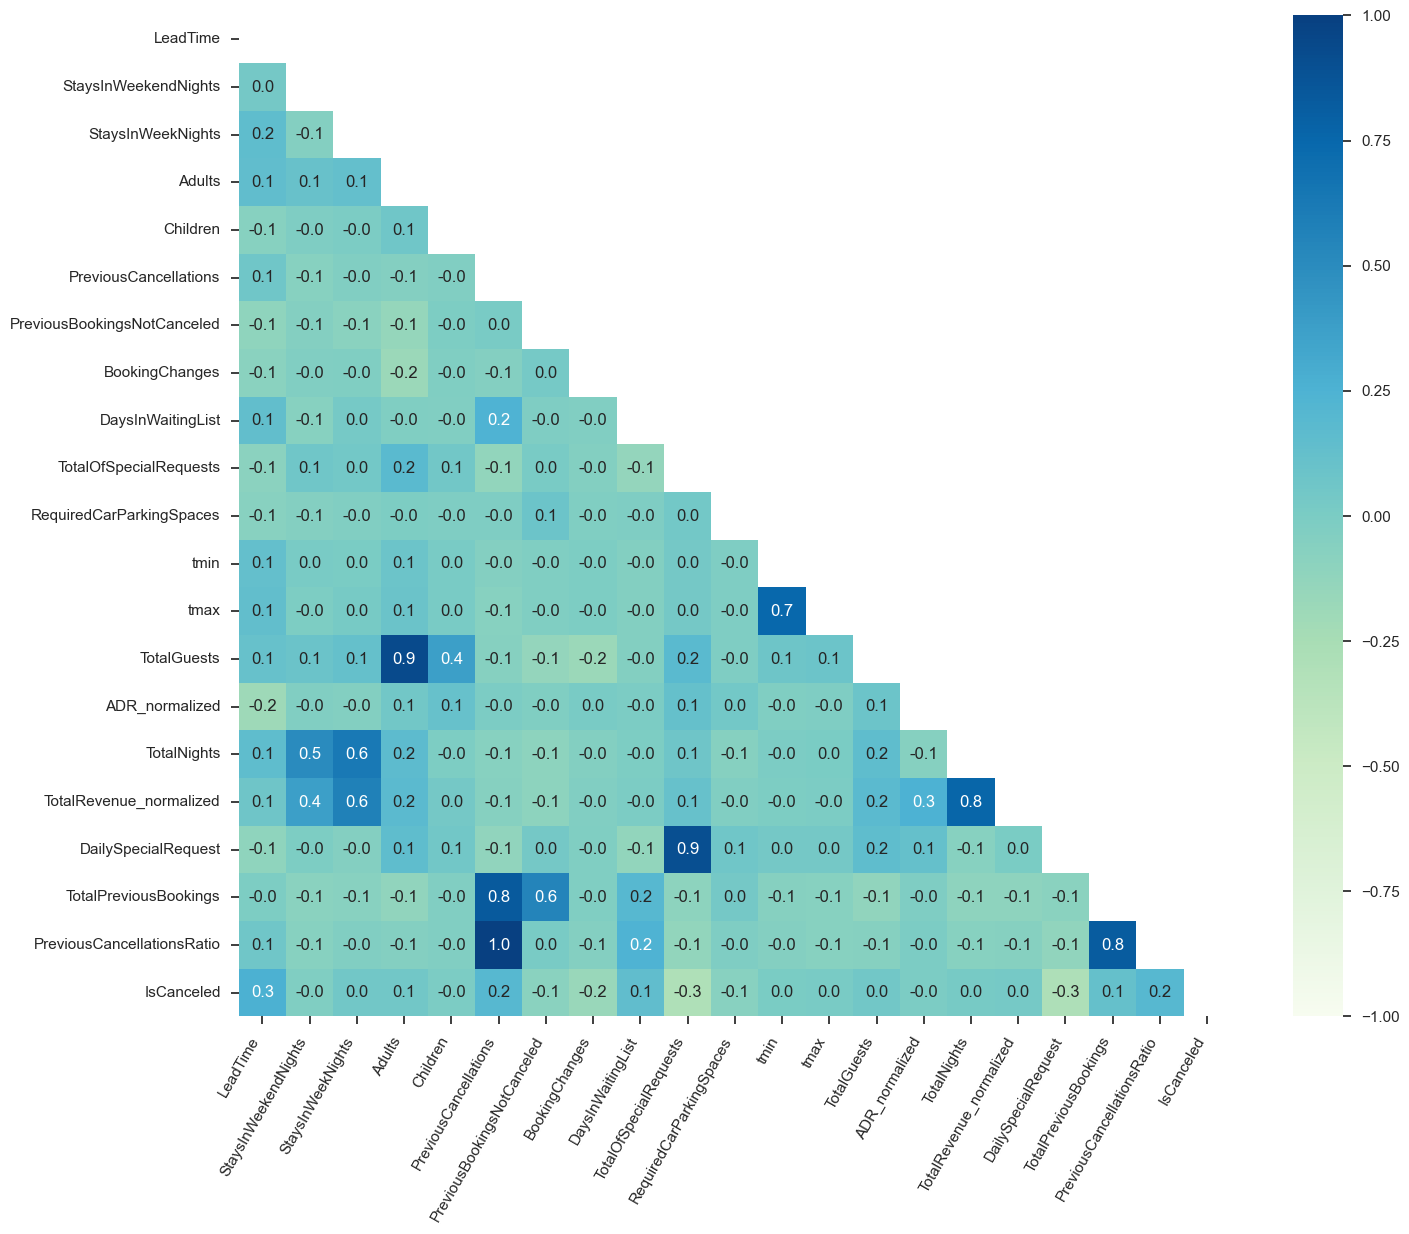

In [247]:
# Create a copy of metric_features list
featuresToCorrelate = metric_features_fs.copy()
# Append 'IsCanceled' to the featuresToCorrelate list
featuresToCorrelate.append('IsCanceled')
# Generate a correlation heatmap using the 'kendall' method
cor_heatmap(df_fs[featuresToCorrelate].corr(method='kendall'))

# Features well correlated to IsCancelled:
# LeadTime, DailySpecialRequests, TotalOfSpecialRequests, PreviousCancellations, TotalPreviousBookings,  
# PreviousCancellationsRatio and GDP per Capita

# TotalSpecialRequests and DailySpecialRequests have the same correlation with IsCanceled, but only the DailySpecialRequests is 
# kept since is a compound variable with the nights spent.

# Since, PreviousCancellationsRatio has 1 correlation with PreviousCancellations and 0.9 with TotalPreviousBookings,
# and it is a compound, PreviousCancellationsRatio will be the only kept from the three.

# So, LeadTime, DailySpecialRequests, PreviousCancellationsRatio  are the metric features 
# chosen by Correlation Analysis.

### Non-metric features Filtering

**Mutual Information** 

In [248]:
non_metric_features_fs_mi= non_metric_features_fs.copy()
non_metric_features_fs_mi.remove('IsCanceled')


# Using LabelEncoder to transform non-numerical labels to numerical labels
df_fs_mi = df_fs[non_metric_features_fs_mi].copy()
le = LabelEncoder()
for col in df_fs_mi.select_dtypes("object"):
    df_fs_mi[col] = le.fit_transform(df_fs_mi[col])

In [249]:
#Calculating mutual information
X = df_fs_mi[non_metric_features_fs_mi]
y = df_fs['IsCanceled'] 
mi_scores = mutual_info_classif(X, y, random_state=42)

mi_scores_df = pd.DataFrame({
    "Feature": non_metric_features_fs_mi,
    "Mutual Information": mi_scores
})

mi_scores = mi_scores_df.sort_values(by="Mutual Information", ascending=False)

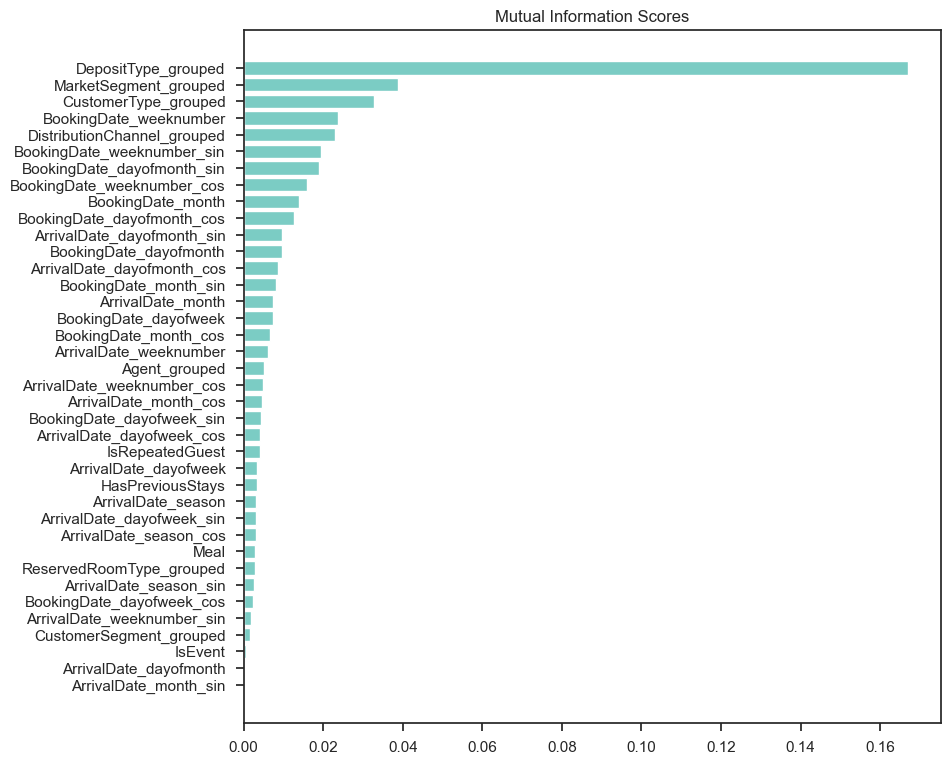

In [250]:
plot_mi_scores(mi_scores)

<hr>
<a class="anchor" id="subtitle7.2">
    
## 7.2. Wrapper Methods
    
</a>

**RFE**

In [251]:
df_Mutual_Wrapper = df_fs.copy()
# Label encoding for categoricals
for colname in df_Mutual_Wrapper.select_dtypes("object"):
    df_Mutual_Wrapper[colname], _ = df_Mutual_Wrapper[colname].factorize()
    
X = df_Mutual_Wrapper.drop(columns=['IsCanceled'])
y = df_Mutual_Wrapper['IsCanceled']

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify= y, random_state=42)

In [253]:
model = LogisticRegression(random_state = 3)
rfe = RFE(estimator = model, n_features_to_select = 10)
X_rfe = rfe.fit_transform(X_train, y_train)
selected_features = pd.DataFrame({'Relevant?': rfe.support_, 'Ranking': rfe.ranking_}, index = X_train.columns).sort_values(by='Ranking',ascending=True)

In [254]:
selected_features.head(10)

Relevant?  Ranking
RequiredCarParkingSpaces          True        1
PreviousCancellationsRatio        True        1
HasPreviousStays                  True        1
CustomerType_grouped              True        1
Agent_grouped                     True        1
DepositType_grouped               True        1
TotalOfSpecialRequests            True        1
BookingChanges                    True        1
PreviousCancellations             True        1
DistributionChannel_grouped       True        1

In [255]:
features_selected=selected_features[selected_features['Relevant?']==True].index.tolist()

In [256]:
features_selected=['LeadTime',
                   'PreviousCancellationsRatio',
                   'TotalOfSpecialRequests',
                   'BookingDate_weeknumber_cos',
                   'BookingDate_weeknumber_sin',
                   'BookingDate_dayofmonth_cos',
                   'BookingDate_dayofmonth_sin',
                   'RequiredCarParkingSpaces',
                   'CustomerType_grouped',
                   'DepositType_grouped',
                   'MarketSegment_grouped',
                   'DistributionChannel_grouped',
                   'Agent_grouped',
                   'BookingChanges'
                  ]

In [257]:
features_selected.append('IsCanceled')

<a class="anchor" id="title8">


# 8. Modelling

In [258]:
df_modelling_tree=df_fs.copy()

**Creating Stratified K-Fold instance with 10 splits**

In [259]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=15)

<a class="anchor" id="subtitle8.1">


## 8.1. Tree-based models
    
</a>

For these type of models, the feature selection, encoding and scaling does not make any difference. So the data is applied raw-style.

<a class="anchor" id="title8.1.1">


### 8.1.1 Encoding Categorical Variables
    
</a>

Since models do not accept nominal variables, categorical variables are encoded by **OneHotEncoder**

In [260]:
oneHotEncoder = OneHotEncoder(sparse=False, drop="first")

# OneHot encoding for categoricals
for colname in df_modelling_tree.select_dtypes("object"):
    oh_feat = oneHotEncoder.fit_transform(df[[colname]])
    oh_feat_names = oneHotEncoder.get_feature_names_out()
    oh_df = pd.DataFrame(oh_feat, index=df_modelling_tree.index, columns=oh_feat_names)

    df_modelling_tree = pd.concat([df_modelling_tree.drop(columns=[colname]), oh_df], axis=1)

<a class="anchor" id="subtitle8.1.2">


### 8.1.2. Default-parameterized models
    
</a>

Applying the models with the default parameters in order to choose the models to hypertune

In [261]:
# X and y are separated from the dataset
X_tree = df_modelling_tree.drop(columns=['IsCanceled'])
y_tree = df_modelling_tree['IsCanceled']

In [262]:
default_Models={
    'dt': DecisionTreeClassifier(random_state =41),
    'xgb': xgb.XGBClassifier(random_state =41),
    'catb': CatBoostClassifier(random_state=41, silent=True),
    'rf' : RandomForestClassifier(random_state=41),
    'gb' : GradientBoostingClassifier(random_state=41),
    'etc' : ExtraTreesClassifier(random_state=41),
    'lgbm' : LGBMClassifier(random_state=41)
}
training_scores=[];
validation_scores=[];
for each,model in default_Models.items():
    train_score, validation_score = avg_score(kf, X_tree, y_tree, model)
    training_scores.append(train_score)
    validation_scores.append(validation_score)

In [263]:
validation_scores

[0.7815, 0.8043, 0.8044, 0.8266, 0.7519, 0.827, 0.7948]

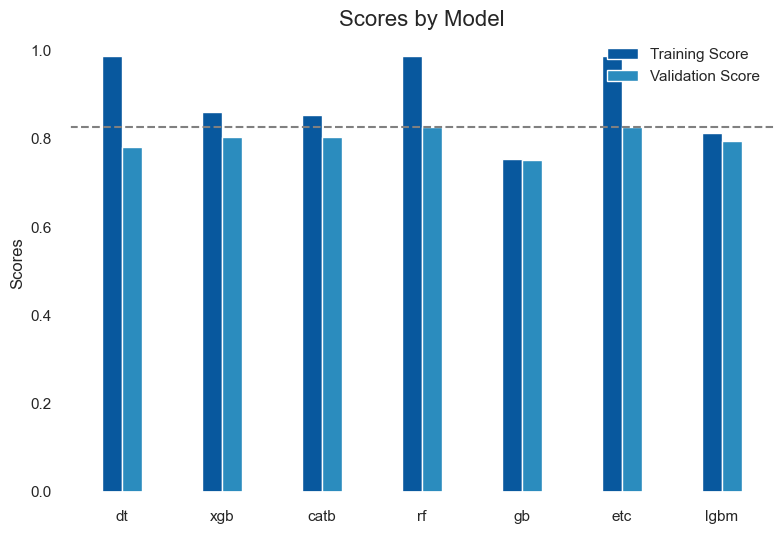

In [264]:
plot_scores(default_Models.keys(),training_scores,validation_scores)

<a class="anchor" id="subtitle8.2">


## 8.2. Other Models
    
</a>

For these type of models, the feature selection, encoding and scaling is importance, so they will be applied.

In [265]:
df_modelling_other= df_fs[features_selected].copy()

<a class="anchor" id="title8.2.1">


### 8.2.1 Encoding & Scaling
    
</a>

Since models do not accept nominal variables, categorical variables are encoded by **OneHotEncoder**

In [266]:
oneHotEncoder = OneHotEncoder(sparse=False, drop="first")

# OneHot encoding for categoricals
for colname in df_modelling_other.select_dtypes("object"):
    oh_feat = oneHotEncoder.fit_transform(df_modelling_other[[colname]])
    oh_feat_names = oneHotEncoder.get_feature_names_out()
    oh_df = pd.DataFrame(oh_feat, index=df_modelling_other.index, columns=oh_feat_names)

    df_modelling_other = pd.concat([df_modelling_other.drop(columns=[colname]), oh_df], axis=1)

To scale the data for the models, the **MinMaxScaler** is used, being that the outlier have been already removed and the data is not distributed normally.

In [267]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_modelling_other)
df_modelling_other[df_modelling_other.columns] = df_scaled

df_modelling_other.head(3)

LeadTime  PreviousCancellationsRatio  TotalOfSpecialRequests  \
0  0.009539                         0.0                0.000000   
1  0.139905                         0.0                0.333333   
2  0.103339                         0.0                0.333333   

   BookingDate_weeknumber_cos  BookingDate_weeknumber_sin  \
0                    0.000000                    0.500000   
1                    0.439732                    0.996354   
2                    0.215968                    0.911492   

   BookingDate_dayofmonth_cos  BookingDate_dayofmonth_sin  \
0                    0.750000                    0.066987   
1                    0.834565                    0.871572   
2                    0.904508                    0.206107   

   RequiredCarParkingSpaces  BookingChanges  IsCanceled  \
0                       0.0             0.0         0.0   
1                       0.0             0.0         1.0   
2                       0.0             0.0         1.0   

   CustomerType_grouped_Transient  DepositType_grouped_Non Refund  \
0                             1.0                             0.0   
1                             1.0                             0.0   
2                             1.0                             0.0   

   MarketSegment_grouped_Offline TA/TO  MarketSegment_grouped_Online TA  \
0                                  1.0                              0.0   
1                                  0.0                              1.0   
2                                  0.0                              1.0   

   MarketSegment_grouped_Others  DistributionChannel_grouped_TA/TO  \
0                           0.0                                1.0   
1                           0.0                                1.0   
2                           0.0                                1.0   

   Agent_grouped_Not Applicable  Agent_grouped_Others  
0                           0.0                   1.0  
1                           0.0                   0.0  
2                           0.0                   0.0

<a class="anchor" id="subtitle8.2.2">


### 8.2.2. Default-parameterized models
    
</a>

Applying the models with the default parameters in order to choose the models to hypertune

In [268]:
# X and y are separated from the dataset
X_other = df_modelling_other.drop(columns=['IsCanceled'])
y_other = df_modelling_other['IsCanceled']

In [269]:
default_Models={
    'lr' : LogisticRegression(random_state=41),
    'knn': KNeighborsClassifier(n_neighbors=10),
    'mlp': MLPClassifier(random_state=41,hidden_layer_sizes=(2,1)),
    'svc': SVC(random_state=41),
}
training_scores=[];
validation_scores=[];
for each,model in default_Models.items():
    train_score, validation_score = avg_score(kf, X_other, y_other, model)
    training_scores.append(train_score)
    validation_scores.append(validation_score)

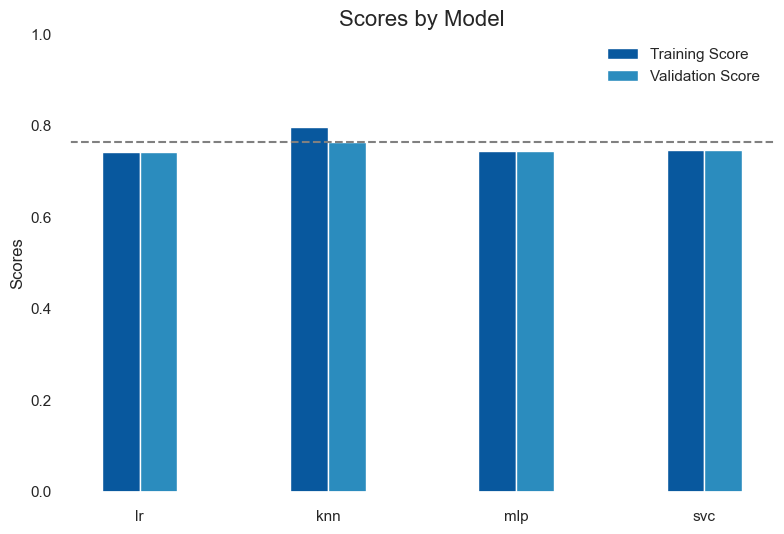

In [276]:
plot_scores(default_Models.keys(),training_scores,validation_scores)

<a class="anchor" id="subtitle8.3">


## 8.3. Optimizing Best Models
    
</a>

The top two performing models on default parameterized conditions are **XGBoost** and **CatBoost**.<br>
A deep analysis on multiple factors is made to detect the best parameters that give the less overfitting while performing with the highest f1-score.

**XGBoost**

. . . . . . . . 

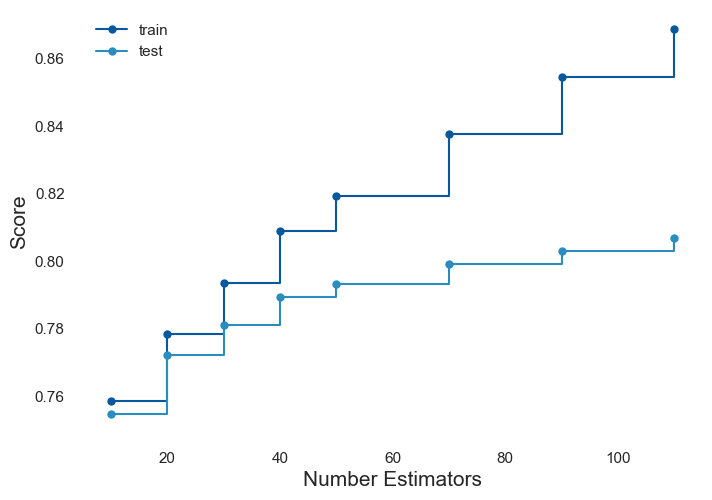

In [271]:
#Number Estimators
train_scores = []
test_scores =[]
values=[10,20,30,40,50,70,90,110]
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,xgb.XGBClassifier(random_state=41,
                                                                           n_estimators =value
                                                                      ))
    train_scores.append(train_score)
    test_scores.append(test_score)

ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("Number Estimators", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

. . . . . . . . 

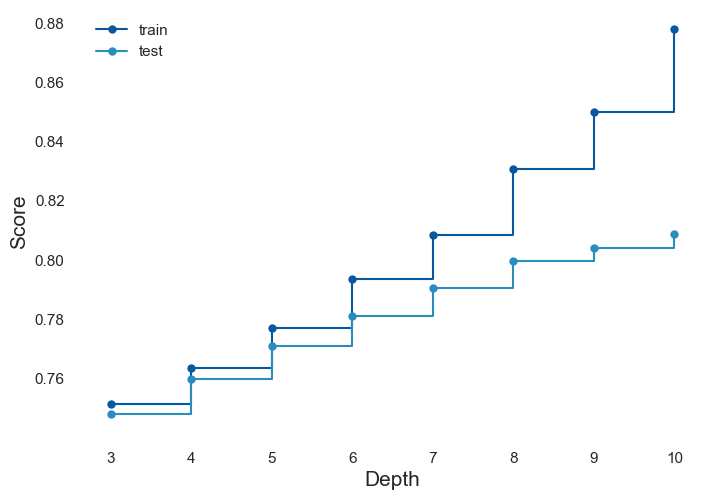

In [277]:
#MAX DEPTH
train_scores = []
test_scores =[]
values=range(3,11)
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,xgb.XGBClassifier(random_state=41,
                                                                           n_estimators = 30,
                                                                           max_depth=value))
    train_scores.append(train_score)
    test_scores.append(test_score)

#plt.facecolor("white")
ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("Depth", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

. . . . . . . . . 

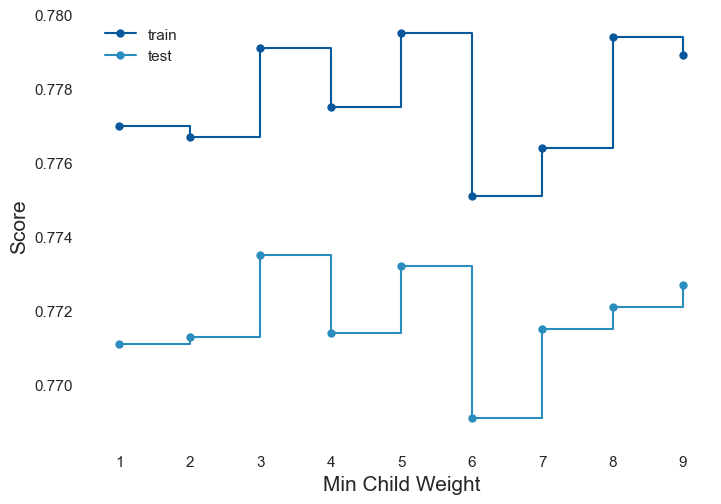

In [278]:
#Min Child Weight
train_scores = []
test_scores =[]
values=np.arange (1,10,1)
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,xgb.XGBClassifier(random_state=41,
                                                                           n_estimators = 30,
                                                                           max_depth= 5,
                                                                           min_child_weight = value))
    train_scores.append(train_score)
    test_scores.append(test_score)

#plt.facecolor("white")
ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("Min Child Weight", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

. . . . . . . . . . 

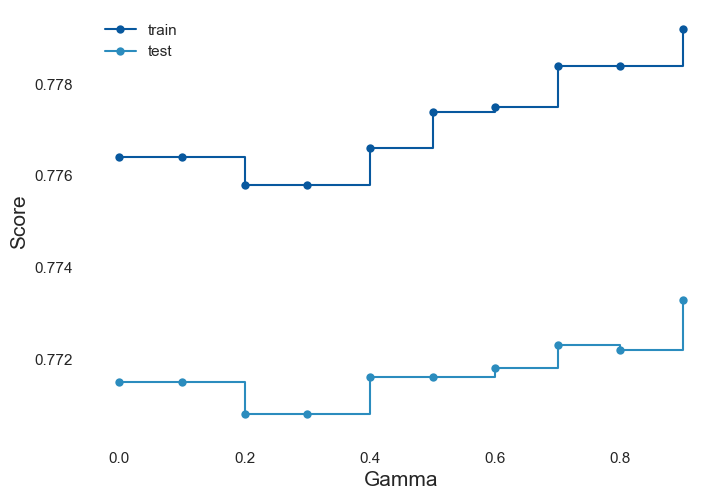

In [279]:
#Gamma
train_scores = []
test_scores =[]
values=np.arange (0,1,0.1)
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,xgb.XGBClassifier(random_state=41,
                                                                           n_estimators = 30,
                                                                           max_depth= 5,
                                                                           min_child_weight=7,
                                                                           gamma = value))
    train_scores.append(train_score)
    test_scores.append(test_score)

#plt.facecolor("white")
ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("Gamma", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

. . . . . . . . 

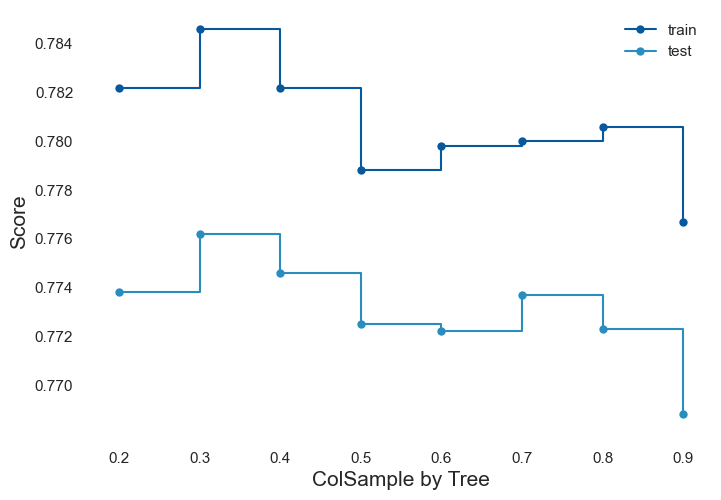

In [280]:
#ColSample by Tree
train_scores = []
test_scores =[]
values=np.arange (0.2,1,0.1)
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,xgb.XGBClassifier(random_state=41,
                                                                           n_estimators = 30,
                                                                           max_depth= 5,
                                                                           min_child_weight=7,
                                                                           gamma = 0,
                                                                           colsample_bytree = value))
    train_scores.append(train_score)
    test_scores.append(test_score)

#plt.facecolor("white")
ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("ColSample by Tree", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

. . . . . 

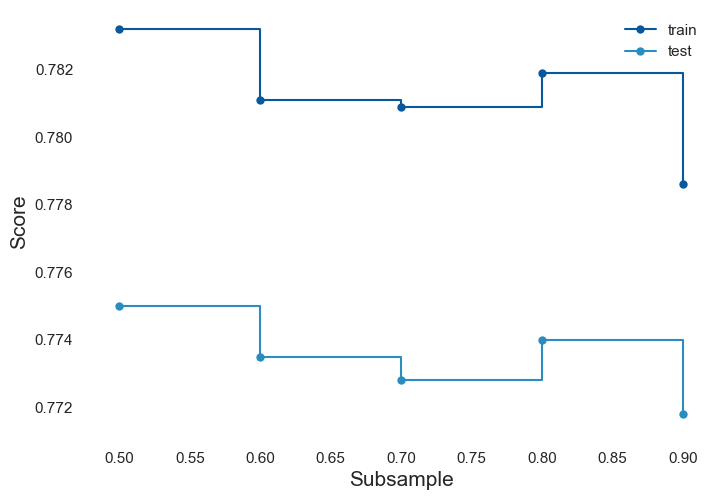

In [281]:
#Subsample
train_scores = []
test_scores =[]
values=np.arange (0.5,1,0.1)
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,xgb.XGBClassifier(random_state=41,
                                                                           n_estimators = 30,
                                                                           max_depth= 5,
                                                                           min_child_weight=7,
                                                                           gamma = 0,
                                                                           colsample_bytree = 0.7,
                                                                           subsample=value))
    train_scores.append(train_score)
    test_scores.append(test_score)

#plt.facecolor("white")
ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("Subsample", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

In [282]:
optimized_Models={}
training_scores=[];
validation_scores=[];

optimized_Models['xgboost']= xgb.XGBClassifier(random_state=41,
                                               n_estimators = 30,
                                               max_depth= 5,
                                               min_child_weight=7,
                                               gamma = 0,
                                               colsample_bytree = 0.7,
                                               subsample=0.5)

**CatBoost**

. . . . . . . . 

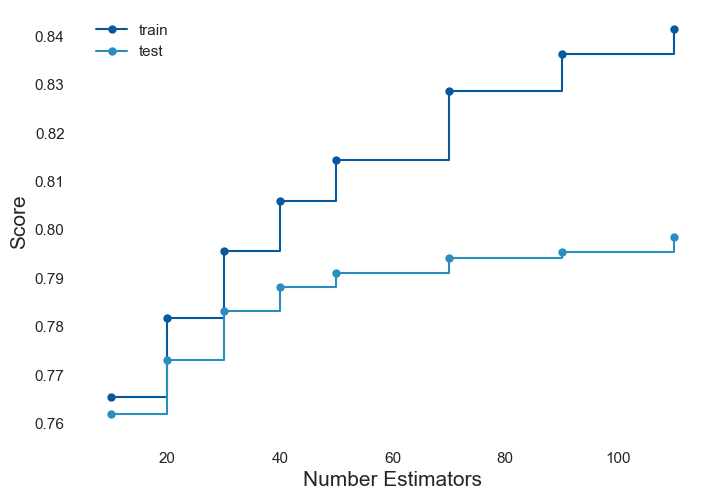

In [283]:
#Number Estimators
train_scores = []
test_scores =[]
values=[10,20,30,40,50,70,90,110]
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,CatBoostClassifier(random_state=41,silent=True,
                                                                            iterations =value
                                                                      ))
    train_scores.append(train_score)
    test_scores.append(test_score)

ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("Number Estimators", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

. . . . . . . . 

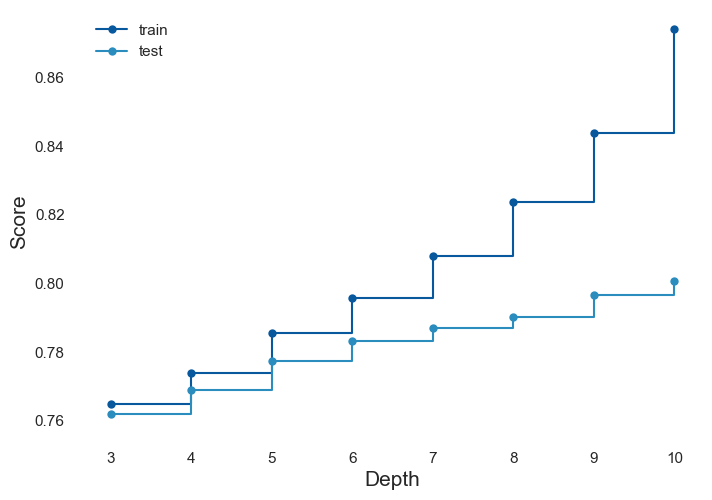

In [284]:
#MAX DEPTH
train_scores = []
test_scores =[]
values=range(3,11)
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,CatBoostClassifier(random_state=41,silent=True,
                                                                            n_estimators = 30,
                                                                            max_depth=value))
    train_scores.append(train_score)
    test_scores.append(test_score)

#plt.facecolor("white")
ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("Depth", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

. . . . . . . . . . . . . . . . 

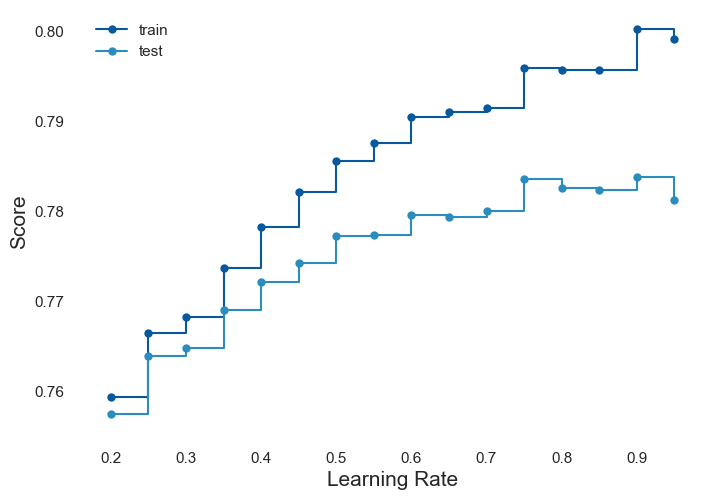

In [285]:
#learning_rate
train_scores = []
test_scores =[]
values=np.arange (0.2,1,0.05)
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,CatBoostClassifier(random_state=41,silent=True,
                                                                            n_estimators = 30,
                                                                            max_depth= 5,
                                                                            learning_rate = value))
    train_scores.append(train_score)
    test_scores.append(test_score)

#plt.facecolor("white")
ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("Learning Rate", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

. . . . . . . . . . . . . . . . . . . . . . . . . . . . 

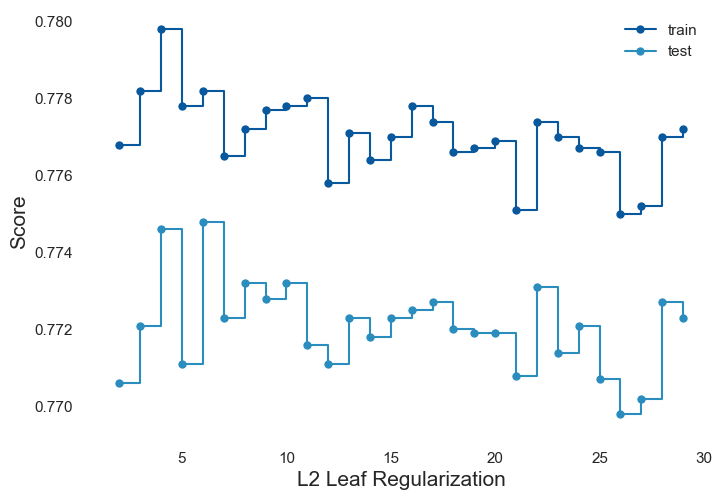

In [286]:
#L2 Leaf Regularization
train_scores = []
test_scores =[]
values=np.arange (2,30,1)
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,CatBoostClassifier(random_state=41,silent=True,
                                                                            n_estimators = 30,
                                                                            max_depth= 5,
                                                                            learning_rate =  0.4,
                                                                            l2_leaf_reg = value))
    train_scores.append(train_score)
    test_scores.append(test_score)

#plt.facecolor("white")
ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("L2 Leaf Regularization", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

. . . . . . . . . . 

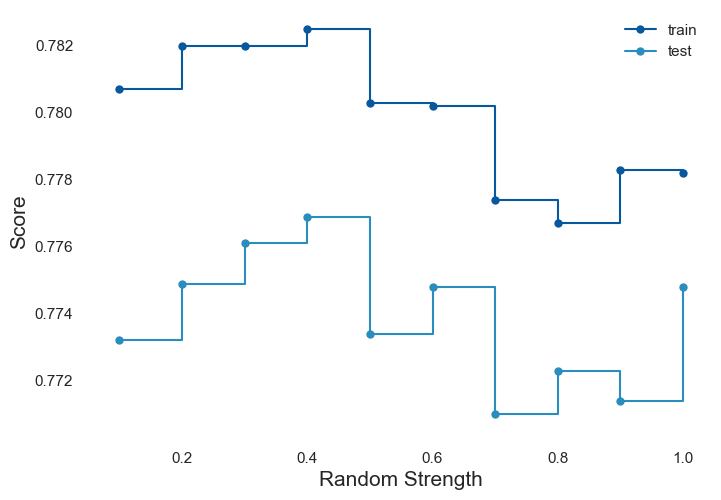

In [287]:
#Random Strength
train_scores = []
test_scores =[]
values=np.arange (0.1,1.1,0.1)
for value in values:
    print('.', end=' ')
    train_score,test_score= avg_score(kf, X_tree, y_tree,CatBoostClassifier(random_state=41,silent=True,
                                                                            n_estimators = 30,
                                                                            max_depth= 5,
                                                                            learning_rate =  0.4,
                                                                            l2_leaf_reg =  6,
                                                                            random_strength = value))
    train_scores.append(train_score)
    test_scores.append(test_score)

#plt.facecolor("white")
ax = plt.axes()
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("white")
plt.xlabel("Random Strength", fontsize=15)
plt.ylabel("Score", fontsize=15)
plt.plot(values, train_scores, marker='o', label="train", drawstyle="steps-post",color="#08589E")
plt.plot(values, test_scores, marker='o', label="test", drawstyle="steps-post",color="#2B8CBE")
plt.grid(visible=False)
plt.legend()

plt.show()

In [288]:
optimized_Models['catboost']= CatBoostClassifier(random_state=41,silent=True,
                                                 n_estimators = 30,
                                                 max_depth= 5,
                                                 learning_rate =  0.4,
                                                 l2_leaf_reg =  6,
                                                 random_strength =1)

**Choosing Best Model**

In [289]:
for each,model in optimized_Models.items():
    train_score, validation_score = avg_score(kf, X_tree, y_tree, model)
    print(each,train_score, validation_score)
    training_scores.append(train_score)
    validation_scores.append(validation_score)

xgboost 0.7832 0.775
catboost 0.7782 0.7748


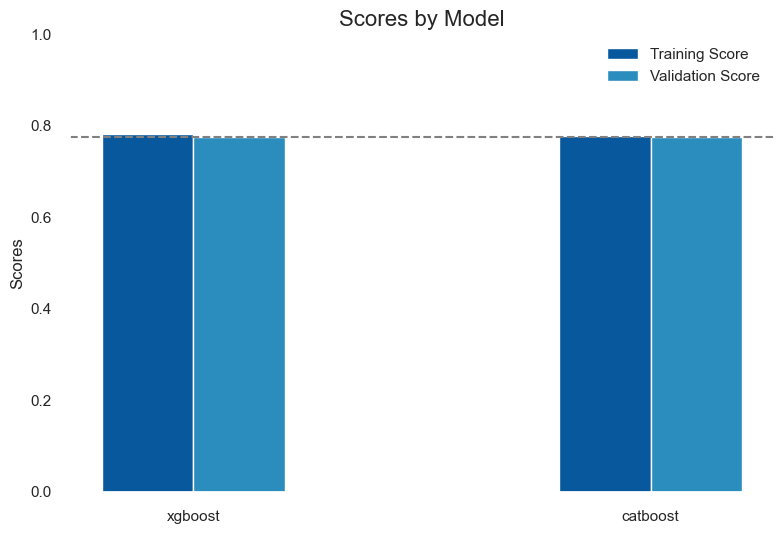

In [315]:
plot_scores(optimized_Models.keys(),training_scores,validation_scores)

In [291]:
# The model that performs better with less overfitting is Catboost.

<a class="anchor" id="subtitle8.4">


## 8.4. Final Model Evaluation
    
</a>

In [292]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.25, stratify=y,random_state=41)

In [293]:
# Fitting Catboost with the defined parameters to X_train and y_train
final_model = optimized_Models['catboost']
final_model.fit(X_train, y_train)

In [294]:
# predict y for X_train and X_test
y_pred_train = final_model.predict(X_train) 
y_pred_test = final_model.predict(X_test) 
y_pred_test_proba = final_model.predict_proba(X_test)

<a class="anchor" id="subtitle8.4.1">


### Confusion Matrix
    
</a>

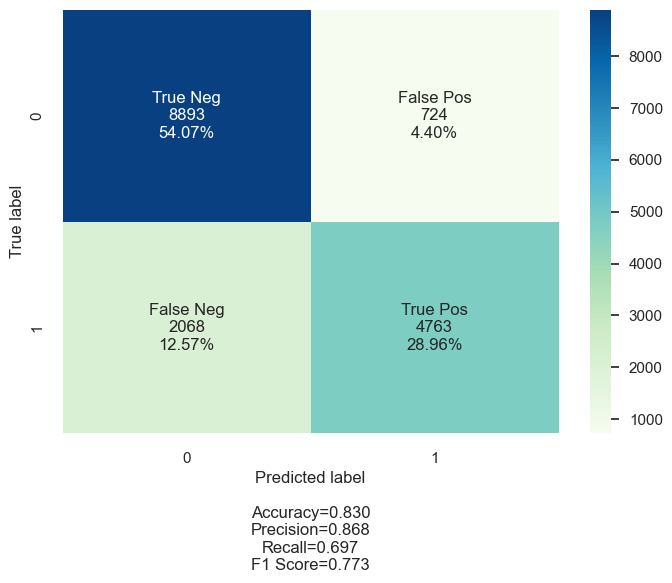

In [295]:
# Confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [296]:
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

Measure     Train      Test
0   ACCURACY  0.834174  0.830253
1  PRECISION  0.872579  0.868052
2     RECALL  0.703445  0.697262
3   F1 SCORE  0.778937  0.773340
4        AUC  0.815240  0.810990

<a class="anchor" id="subtitle8.4.2">


### ROC Curve
    
</a>

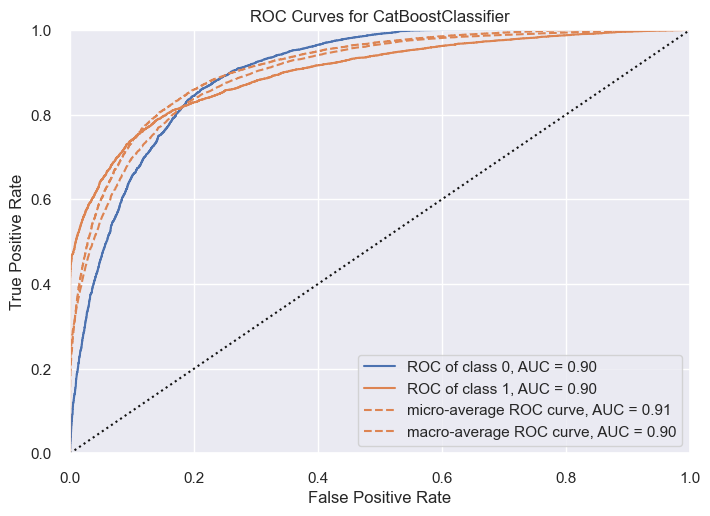

<AxesSubplot:title={'center':'ROC Curves for CatBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [297]:
# ROC curve
wrap_model= wrap(final_model)
visualizer = ROCAUC(wrap_model, classes=['0','1'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
# Having an AUC of 0.9 for both categories of "isCanceled" suggests that the model is highly accurate 
# and capable of distinguishing between the two classes. 
# An AUC of 0.9 indicates that the model has a high probability of ranking a 
# randomly chosen positive instance higher than a randomly chosen negative instance. 

<a class="anchor" id="subtitle8.4.3">


### Precision Recall Curve
    
</a>

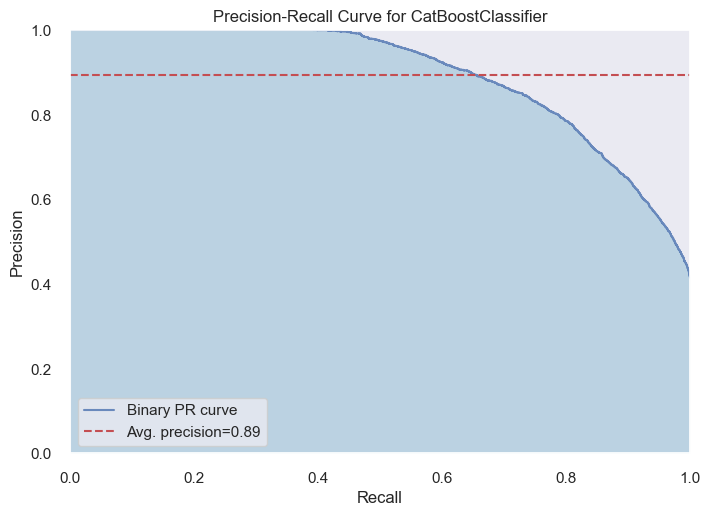

<AxesSubplot:title={'center':'Precision-Recall Curve for CatBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [298]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(wrap_model, classes=['0','1'])
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
# Precision-Recall curve with an AUC of 0.89 demonstrates a good balance between 
# precision and recall for the model's predictions, indicating a reliable and effective performance 
# in identifying canceled hotel reservations.

<a class="anchor" id="subtitle8.4.5">


### Model Explanation using SHAP
    
</a>

In [299]:
# Creating Shap
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_train, y=y_train)

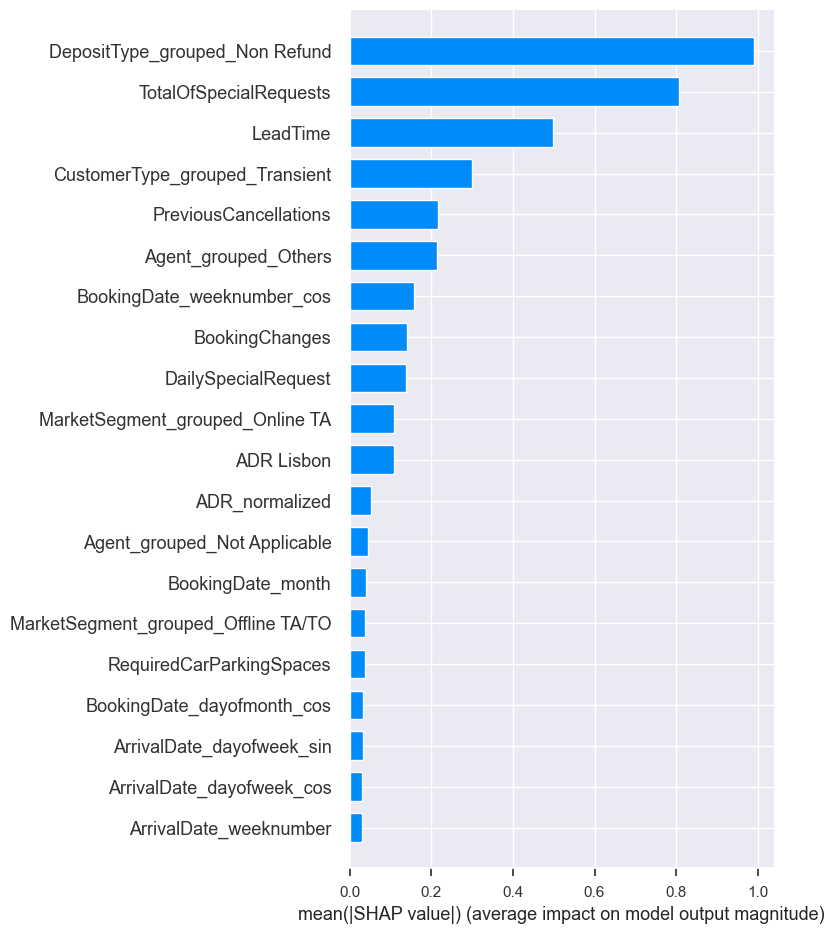

In [300]:
# Mean importance
shap.summary_plot(shap_values, X_train, plot_type="bar")
# The top 5 important features are DepositType, TotalOfSpecialRequests, Lead Time, Customer Type and the number of Previous cancellations.

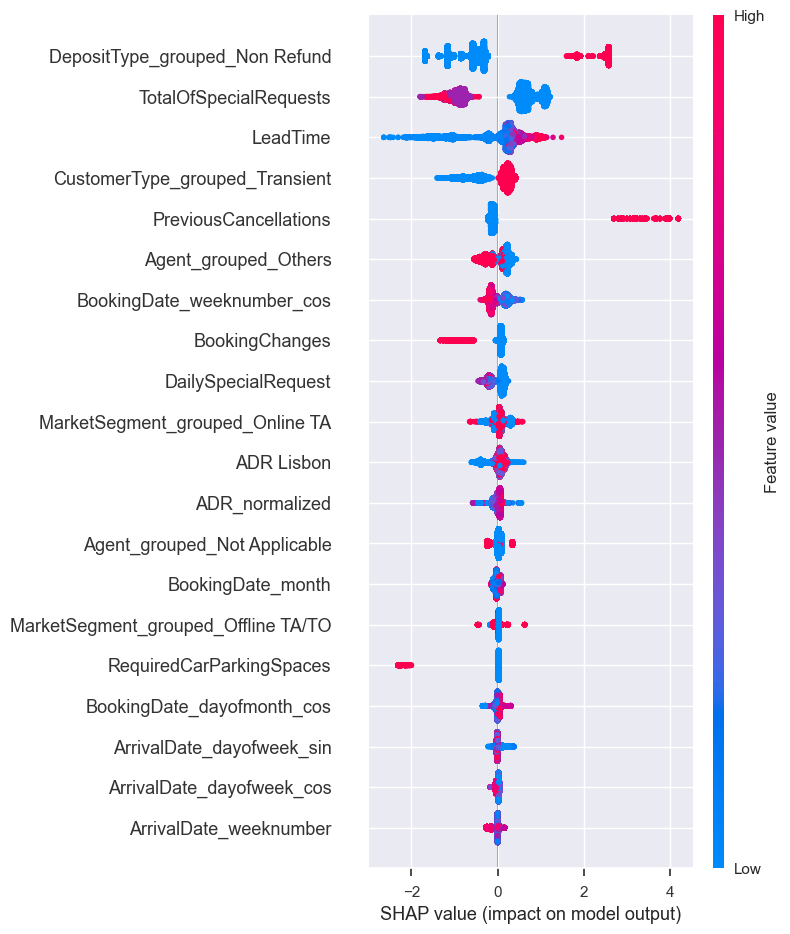

In [301]:
# Shap summary
shap.summary_plot(shap_values, X_train)
# If the DepositType is NonRefund, the probability of cancellation is much higher.
# The lower the number of TotalOFSpecialRequests, the higher the probability of cancellation.
# Those who book in advance (higher LeadTime) are also more likely to cancel.
# Transient Customer Type cancels more often.
# Those who have previous cancellations are highly likely to cancel again.
# Agents 9, 1, and without an agent have more cancellations.
# There tends to be fewer cancellations related to bookings in the first and last weeks of the year.
# People who request a parking space cancel very rarely.

In [302]:
# Visualizing some of instances - let's see the first 500
# Interact with menu to explore the results
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:500,:], X_train.iloc[:500,:])

In [303]:
# Visualizing one instance only (first customer - index 0)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [304]:
# Get the names of the best features
top_feature_names = X_train.columns[np.argsort(np.abs(shap_values).mean(0))[::-1][:10]]

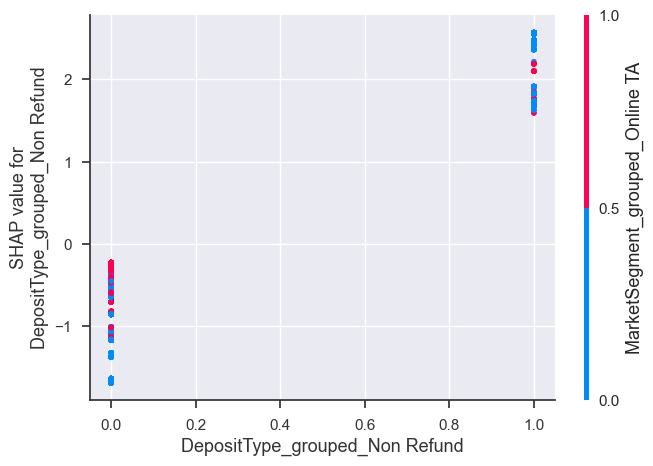

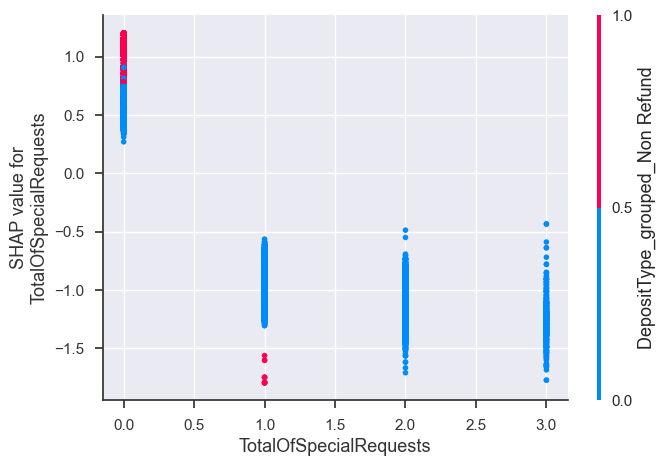

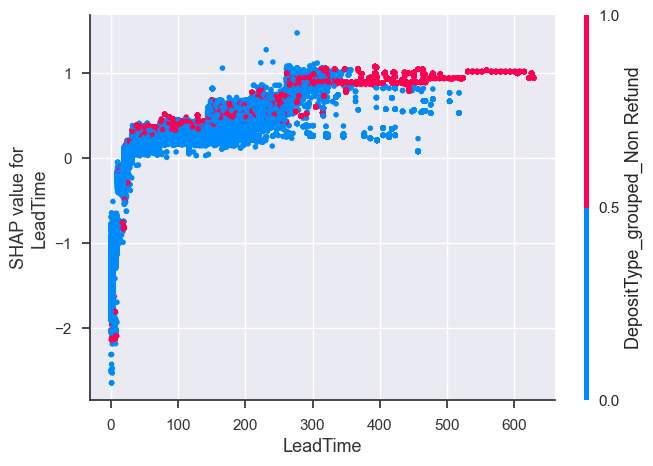

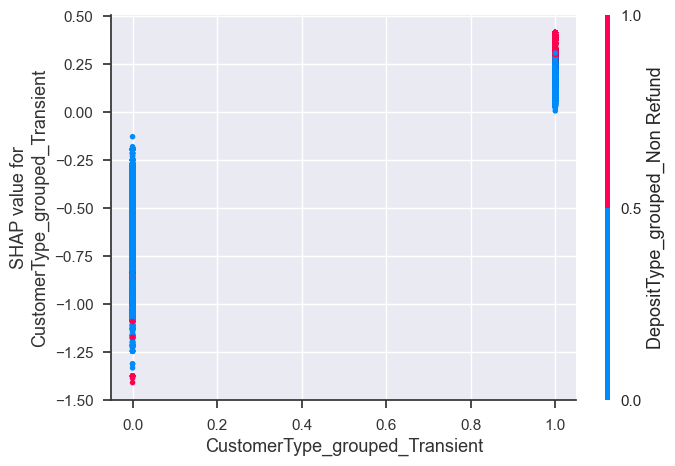

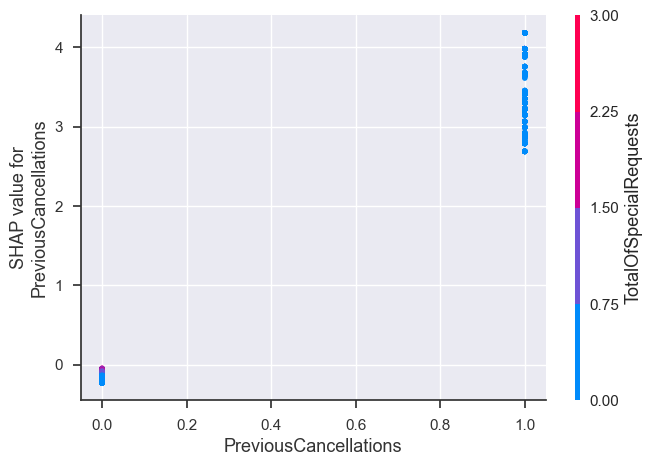

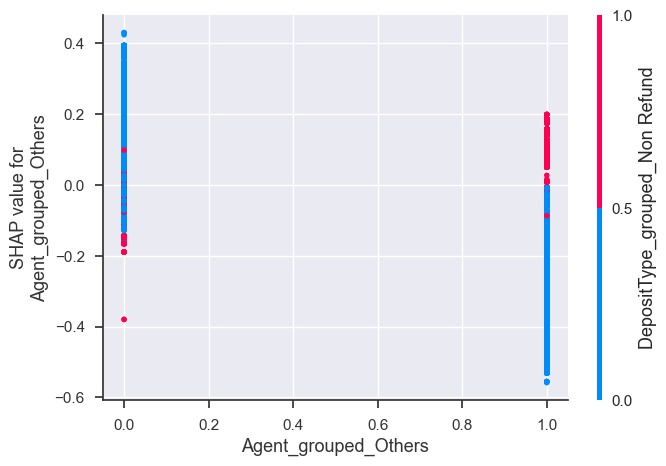

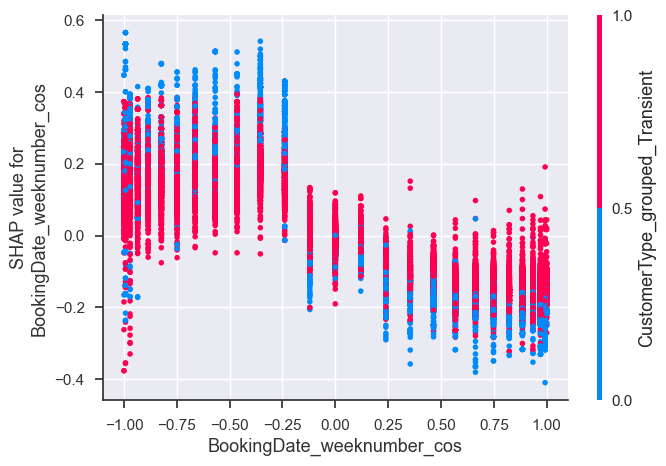

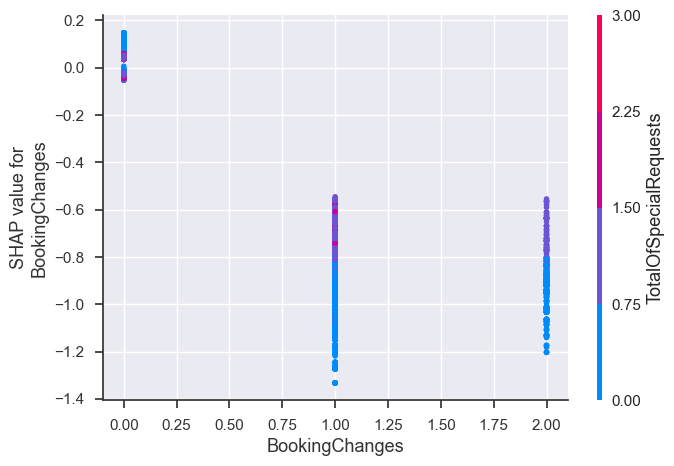

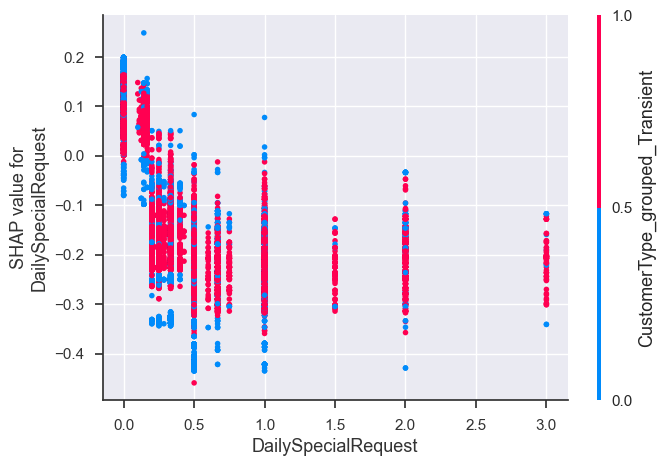

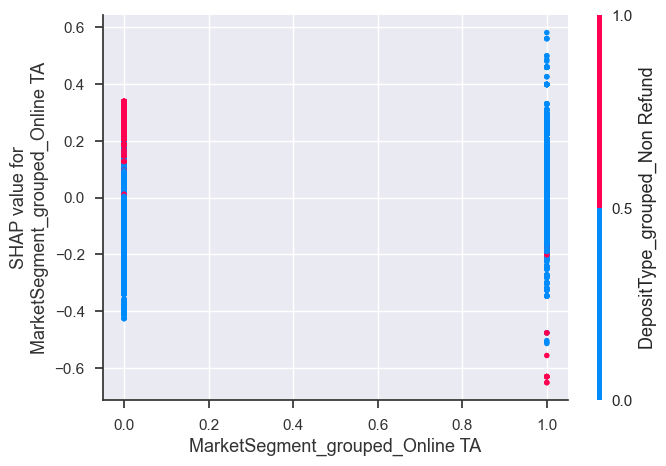

In [305]:
# Check the dependence between the different top 10 features
for name in top_feature_names:
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train)

Computing partial dependence plots...


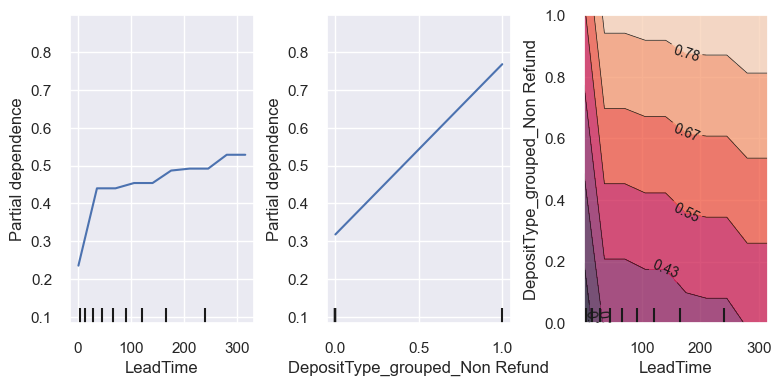

In [306]:
features = ["LeadTime", 'DepositType_grouped_Non Refund', ("LeadTime", 'DepositType_grouped_Non Refund')]
print("Computing partial dependence plots...")
fig, ax = plt.subplots(ncols=3, figsize=(9, 4))
display = PartialDependenceDisplay.from_estimator(
    final_model,
    X_train,
    features,
    kind="average",
    n_jobs=2,
    grid_resolution=10,
    ax=ax,
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

# Partial Dependence between LeadTime and DepositType Non refund.
# These plots shows the greater the leadtime, the greater the chance of cancellation. Moreover, if DepositType is Non Refund, 
# the dependence sith isCancelled is almost 1.

### Individual conditional expectation

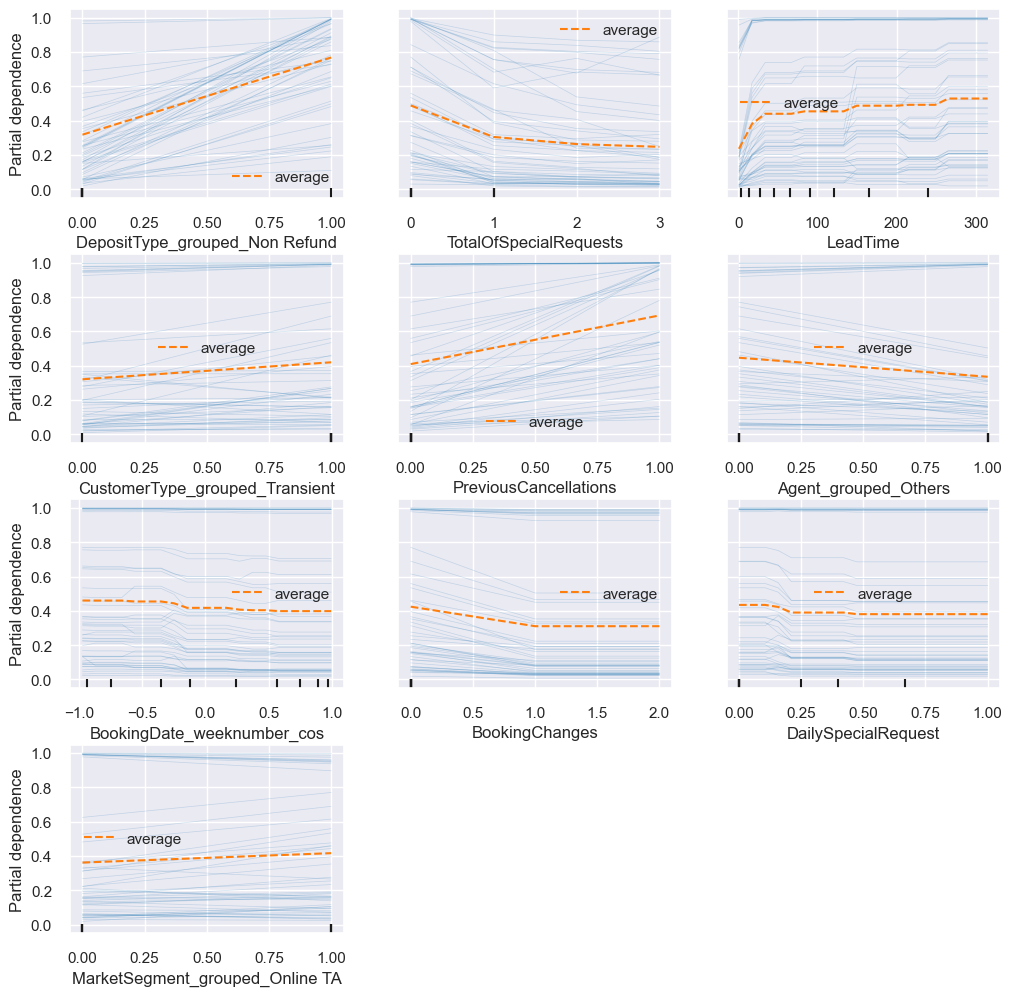

In [318]:
features = top_feature_names
fig, ax = plt.subplots(figsize=(12, 12))
display = PartialDependenceDisplay.from_estimator(
    final_model,
    X_train,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax=ax
)
display.figure_.subplots_adjust(hspace=0.3)